**Подход к решению представлен в виде блок-схемы.**

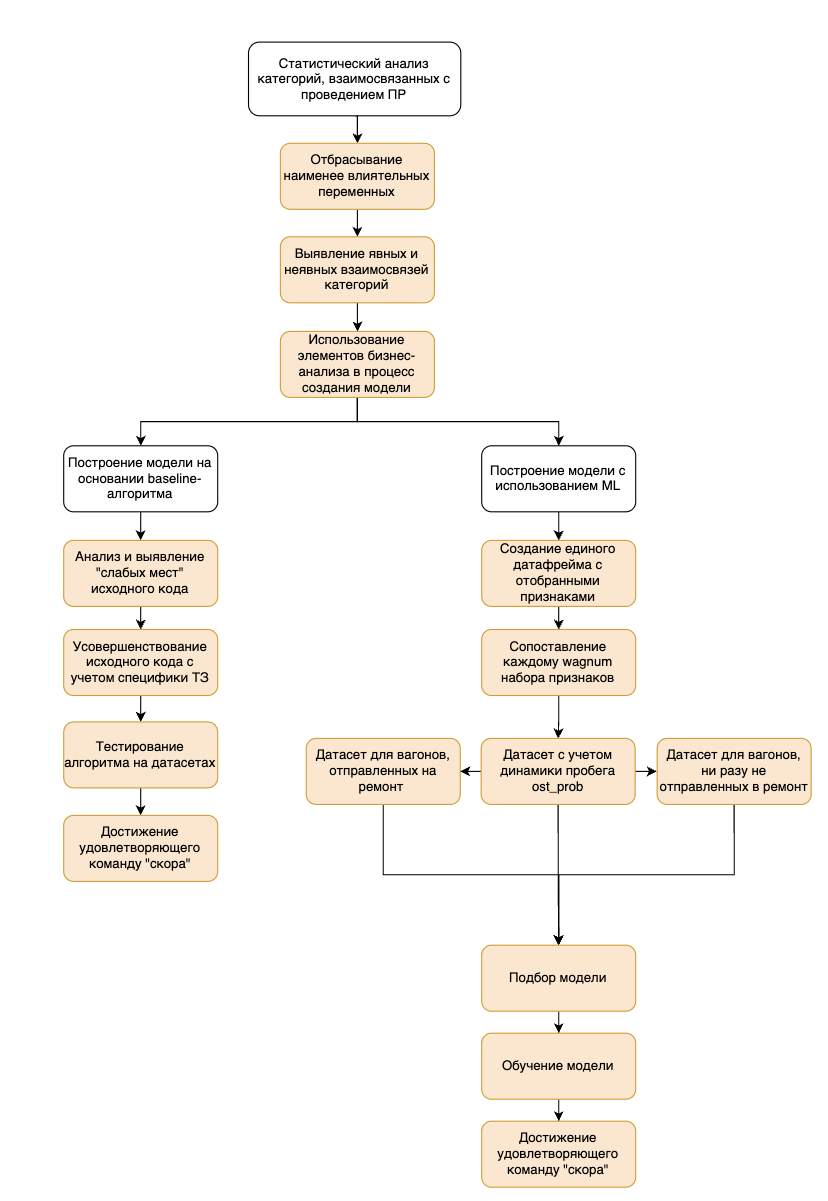



---


**Общий вывод:**

Бизнес-ценность представлена в виде выводов на основании статистического анализа корреляционных матриц и гистограмм.

Бизнес-ценность решения также стоит рассматривать с точки зрения возможности внедрения продукта в существующие цифровые решения компании. Модель будет способствовать увеличению точности прогнозирования времени отправки подвижного состава в ремонт, повлияет на процесс логистики для вагонов, требующих замены, также поможет более точно расчитать время погрузки, увеличить точность планирования и отслеживания вагонов под погрузку и выгрузку, повысит точность расчета времени получения заказа на перевозку от клиентов ПГК ж/д операторам.
Цифровая трансформация процесса перевозки грузов положительно воздействует не только на компанию и величину прибыли, но и на клиентов,  пользователей сервисов и потребителей услуг, что способствует формированию позитивного имиджа компании, а также повышению ее конкурентноспособности.


---


**Статистическая сводка:**
1. Чем интенсивнее расходуется ресурс вагона лизингополучателем, тем ближе срок ПР. Чем больше принятых в аренду и привлеченных в парк вагонов у компании ПГК, тем выше количество неисправностей вагонов, увеличение загруженности ВРП и простой.
2. Чем больше недвижимости и оборудования в отрасли, тем больше риск экономических потерь от опасных или стихийных гидрометеорологических явлений, которым железнодорожная отрасль подвергается постоянно.
3. Тип груза влияет не только на износ вагона, но и на маршрут, сроки транспортировки. Снижение скорости передвижения подвижного состава может препятствовать своевременному прибытию вагона на станцию ВПР и искажать данные об остаточном пробеге. Отклонение остаточного пробега от нормативных значений или его отрицательное значение может свидетельствовать нарушениях с точки зрения логистики, а не с точки зрения неисправности вагона. В данном случае стоит учесть КТИ и влияние других показателей в совокупности, чтобы избежать дополнительных издержек.
4. В связи со спадом спроса на ремонт вагонов в 2020 г, вызванным падением погрузки в связи с пандемией, ВРП потребовалось снизить объемы закупок ремонтных комплектующих. Снижение качества ремонтных работ было также обсуловлено повышением уровня конкуренции и демпингом.
5. Существуют дорожные пути, которые наиболее явно влияют на износостойкость вагонов. Стоит предположить, что влияние обусловленно протяженностью путей, погодными условиями в регионе передвижения, а также дефицитом транспортной инфраструктуры.

#Статистический анализ

##1. Загрузка библиотек, данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
y_train = pd.read_csv('y_train.csv')

In [ ]:
path_train = r"./"
 # параметры вагона
wag_param = pd.read_parquet(path_train + '/wag_params.parquet').convert_dtypes()

In [ ]:
y_train.head()

wagnum       month  target_month  target_day
0   33361  2023-01-01             0           0
1   33364  2023-01-01             0           0
2   33366  2023-01-01             0           0
3   33358  2023-01-01             0           0
4   33349  2023-01-01             0           0

In [ ]:
y_train.shape

(203853, 4)

In [ ]:
y_train_sorted = y_train.sort_values(by='wagnum')

# Вывод отсортированного DataFrame
print(y_train_sorted)

        wagnum       month  target_month  target_day
200200       0  2022-12-01             0           0
132248       0  2022-10-01             0           0
98272        0  2022-09-01             0           0
30321        0  2023-01-01             0           0
166224       0  2022-11-01             0           0
...        ...         ...           ...         ...
161264   33976  2022-11-01             0           0
59337    33976  2022-08-01             0           0
195240   33976  2022-12-01             0           0
25361    33976  2023-01-01             0           0
93312    33976  2022-09-01             0           0

[203853 rows x 4 columns]


In [ ]:
# Подсчет количества уникальных значений в столбце 'wagnum'
unique_wagnum_count = y_train_sorted['wagnum'].nunique()

# Вывод количества уникальных значений
print("Количество уникальных вагонов, 'wagnum':", unique_wagnum_count)

Количество уникальных вагонов, 'wagnum': 33977


In [ ]:
# Создание y_train_remont с wagnum, у которых хотя бы один раз target_month == 1
y_train_remont = y_train[y_train['target_month'] == 1]
y_train_remont = y_train_remont.drop_duplicates(subset='wagnum')
# Создание y_train_ne_remont с уникальными wagnum, у которых ни разу target_month == 1
y_train_ne_remont = y_train[~y_train['wagnum'].isin(y_train_remont['wagnum'])].drop_duplicates(subset='wagnum')

# Вывод обоих датасетов
print("y_train_remont:")
print(y_train_remont)

print("\ny_train_ne_remont:")
print(y_train_ne_remont)

y_train_remont:
        wagnum       month  target_month  target_day
12       29890  2023-01-01             1           0
22       29923  2023-01-01             1           0
24       29930  2023-01-01             1           0
28       29942  2023-01-01             1           1
33       29822  2023-01-01             1           0
...        ...         ...           ...         ...
203778   33468  2022-12-01             1           0
203781   21621  2022-12-01             1           1
203785   20228  2022-12-01             1           0
203805   13802  2022-12-01             1           1
203852   33350  2022-12-01             1           0

[10393 rows x 4 columns]

y_train_ne_remont:
       wagnum       month  target_month  target_day
3       33358  2023-01-01             0           0
5       33354  2023-01-01             0           0
6       33355  2023-01-01             0           0
11      29889  2023-01-01             0           0
13      29894  2023-01-01             0   

In [ ]:
print(f'Дубликаты в y_train_remont: {y_train_remont["wagnum"].duplicated().any()}')
print(f'Дубликаты в y_train_ne_remont: {y_train_ne_remont["wagnum"].duplicated().any()}')

Дубликаты в y_train_remont: False
Дубликаты в y_train_ne_remont: False


In [ ]:
wag_param

wagnum       model  rod_id  gruz  cnsi_gruz_capacity  cnsi_volumek  \
3218    26318   12-600-04       1   682                 682          85.0   
19128   28344      12-132       1   700                 700          88.0   
21526    8099      11-286       0   670                 670         138.0   
32353   33350  12-9850-02       1   750                 750          90.0   
81       5308      11-276       0   680                 680         122.0   
...       ...         ...     ...   ...                 ...           ...   
33703   18766      11-280       0   680                 680         138.0   
33704   18769      11-280       0   680                 680         138.0   
33705   18899      11-280       0   680                 680         138.0   
33706   18912      11-280       0   680                 680         138.0   
33707   18914      11-280       0   680                 680         138.0   

       tara date_build    srok_sl  zavod_build  date_iskl  cnsi_probeg_dr  \
3218    240 1992-12-25 2022-04-27            5 2023-02-16             160   
19128   240 2003-08-12 2024-12-24            0 2022-12-14             110   
21526   270 1995-08-31 2027-10-01            1        NaT             110   
32353   248 2014-10-27 2047-02-05           19        NaT             250   
81      260 1995-09-17 2027-09-28            1        NaT             110   
...     ...        ...        ...          ...        ...             ...   
33703   259 2013-01-07 2046-03-20            1        NaT             110   
33704   259 2013-01-18 2046-02-14            1        NaT             110   
33705   260 2013-07-24 2044-03-03            1        NaT             110   
33706   259 2015-02-28 2044-08-04            1        NaT             110   
33707   259 2013-06-16 2046-07-02            1        NaT             110   

       cnsi_probeg_kr  kuzov  telega  tormoz tipvozd  tippogl  norma_km  \
3218              160      2       9       3       6       11    110000   
19128             160      2       9       2       1       12         0   
21526             160      2       9       2       1        1    160000   
32353             500      2      11       2       7       12    250000   
81                160      2       9       2       1       11    160000   
...               ...    ...     ...     ...     ...      ...       ...   
33703             160      2       9       2       7       12    160000   
33704             160      2       9       2       7       12    160000   
33705             160      2       9       2       7       11    160000   
33706             160      2       9       2       7       11    160000   
33707             160      2       9       2       7       11    160000   

       ownertype  
3218           0  
19128          0  
21526          1  
32353          1  
81             1  
...          ...  
33703          0  
33704          0  
33705          0  
33706          0  
33707          0  

[33977 rows x 20 columns]

In [ ]:
# Подсчет количества уникальных значений в столбце 'wagnum'
unique_wagnum_count = y_train_ne_remont['wagnum'].nunique()

# Вывод количества уникальных значений
print("Количество уникальных вагонов, ни разу не ломавшихся 'wagnum':", unique_wagnum_count)

Количество уникальных вагонов, ни разу не ломавшихся 'wagnum': 23584


In [ ]:
# Подсчет количества уникальных значений в столбце 'wagnum'
unique_wagnum_count = y_train_remont['wagnum'].nunique()

# Вывод количества уникальных значений
print("Количество уникальных вагонов, ломавшихся хотя бы раз 'wagnum':", unique_wagnum_count)

Количество уникальных вагонов, ломавшихся хотя бы раз 'wagnum': 10393


##2. Статистический анализ

###2.1. Параметры вагона

In [ ]:
df_remont = pd.merge(y_train_remont, wag_param, on='wagnum')
df_ne_remont = pd.merge(y_train_ne_remont, wag_param, on='wagnum')
print(df_ne_remont)

       wagnum       month  target_month  target_day       model  rod_id  gruz  \
0       33358  2023-01-01             0           0  12-1303-01       1   690   
1       33354  2023-01-01             0           0  12-1303-01       1   690   
2       33355  2023-01-01             0           0  12-1303-01       1   690   
3       29889  2023-01-01             0           0      12-132       1   695   
4       29894  2023-01-01             0           0      12-132       1   695   
...       ...         ...           ...         ...         ...     ...   ...   
23579    5996  2023-01-01             0           0      11-276       0   680   
23580   31340  2023-01-01             0           0      12-132       1   695   
23581    2706  2023-01-01             0           0     11-2163       0   680   
23582    6055  2023-01-01             0           0      11-276       0   680   
23583   17621  2023-01-01             0           0      12-132       1   695   

       cnsi_gruz_capacity  

Для корректного отображения распределений по времени представим date_build и srok_sl в виде разностей с текущим моментом времени.
Поскольку srok_sl - дата относительная к текущему моменту, присвоим ей значение как разность между бесконечно большой датой и действительной.

In [ ]:
print(df_ne_remont.columns)

Index(['wagnum', 'month', 'target_month', 'target_day', 'model', 'rod_id',
       'gruz', 'cnsi_gruz_capacity', 'cnsi_volumek', 'tara', 'date_build',
       'srok_sl', 'zavod_build', 'date_iskl', 'cnsi_probeg_dr',
       'cnsi_probeg_kr', 'kuzov', 'telega', 'tormoz', 'tipvozd', 'tippogl',
       'norma_km', 'ownertype'],
      dtype='object')


In [ ]:
print(df_ne_remont['date_build'])

0       2012-09-27
1       2010-11-18
2       2011-03-02
3       2014-07-06
4       2012-07-23
           ...    
23579   1994-10-08
23580   2012-12-16
23581   2022-11-11
23582   1994-01-10
23583   2010-10-12
Name: date_build, Length: 23584, dtype: datetime64[ns]


In [ ]:
# Преобразуем столбец 'date_build' в формат datetime
df_ne_remont['date_build'] = pd.to_datetime(df_ne_remont['date_build'])
df_remont['date_build'] = pd.to_datetime(df_remont['date_build'])
# Задаем дату 2023-11-11
reference_date = datetime(2023, 11, 11)

# Рассчитываем разность в днях и заменяем столбец
df_ne_remont['days_since_build'] = (reference_date - df_ne_remont['date_build']).dt.days
df_remont['days_since_build'] = (reference_date - df_remont['date_build']).dt.days
# Удаляем исходный столбец 'date_build', если нужно
# df_ne_remont.drop('date_build', axis=1, inplace=True)

# Преобразуем столбец 'srok_sl' в формат datetime
df_ne_remont['srok_sl'] = pd.to_datetime(df_ne_remont['srok_sl'])
df_remont['srok_sl'] = pd.to_datetime(df_remont['srok_sl'])
# Задаем дату 2056-11-11
reference_date = datetime(2056, 11, 11)

# Рассчитываем разность в днях и заменяем столбец
df_ne_remont['relative_srok_sl'] = (reference_date - df_ne_remont['srok_sl']).dt.days
df_remont['relative_srok_sl'] = (reference_date - df_remont['srok_sl']).dt.days
# Удаляем исходный столбец 'srok_sl', если нужно
# df_ne_remont.drop('srok_sl', axis=1, inplace=True)

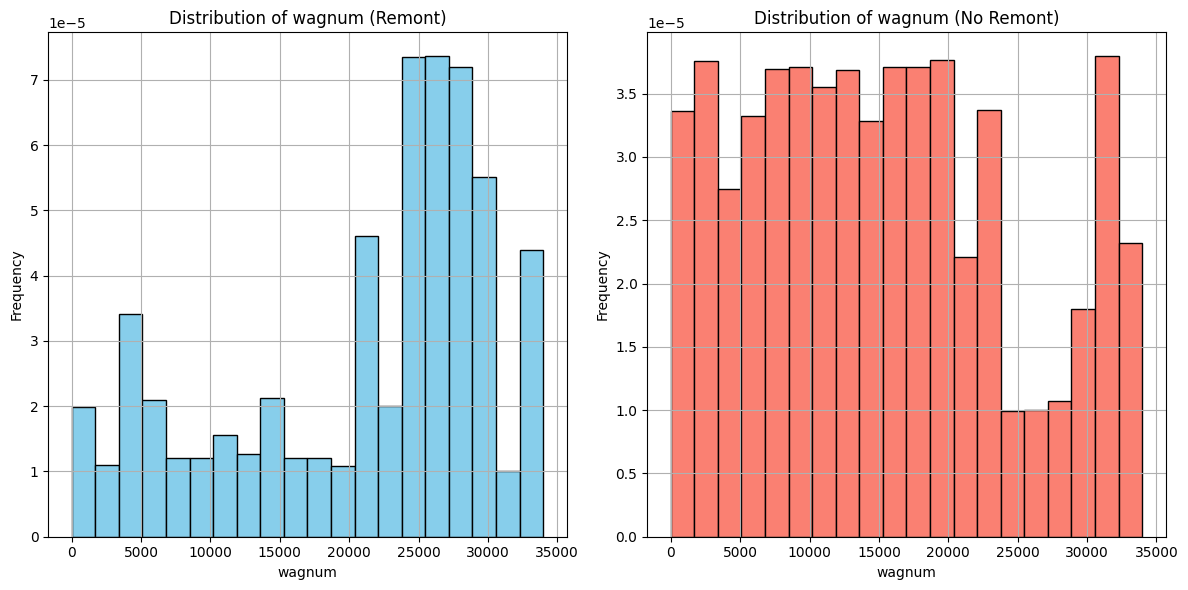

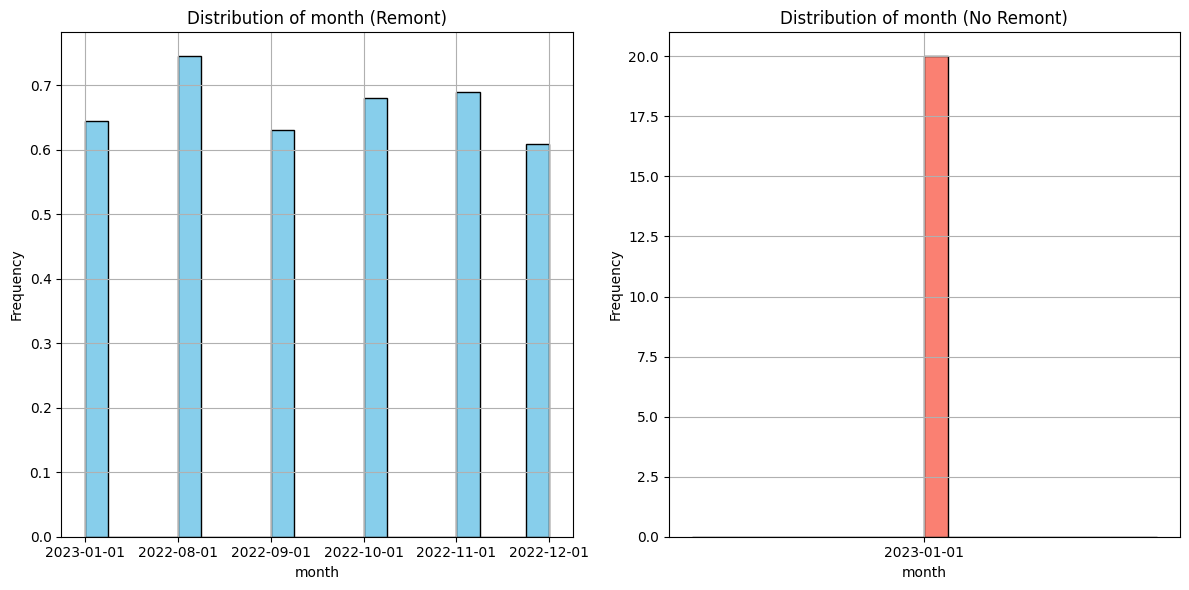

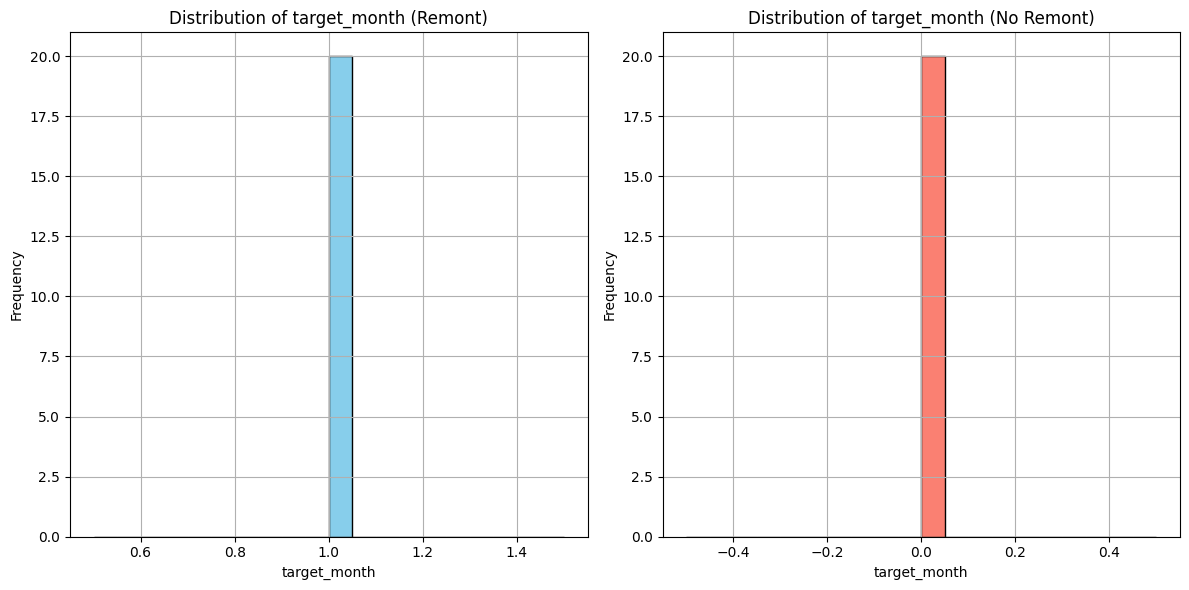

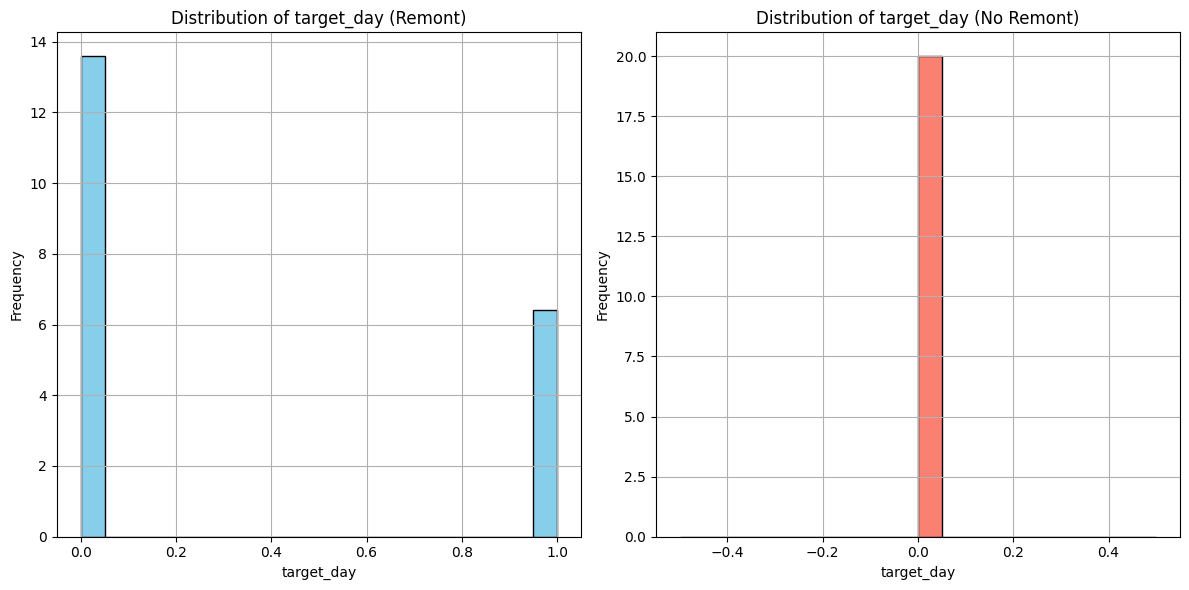

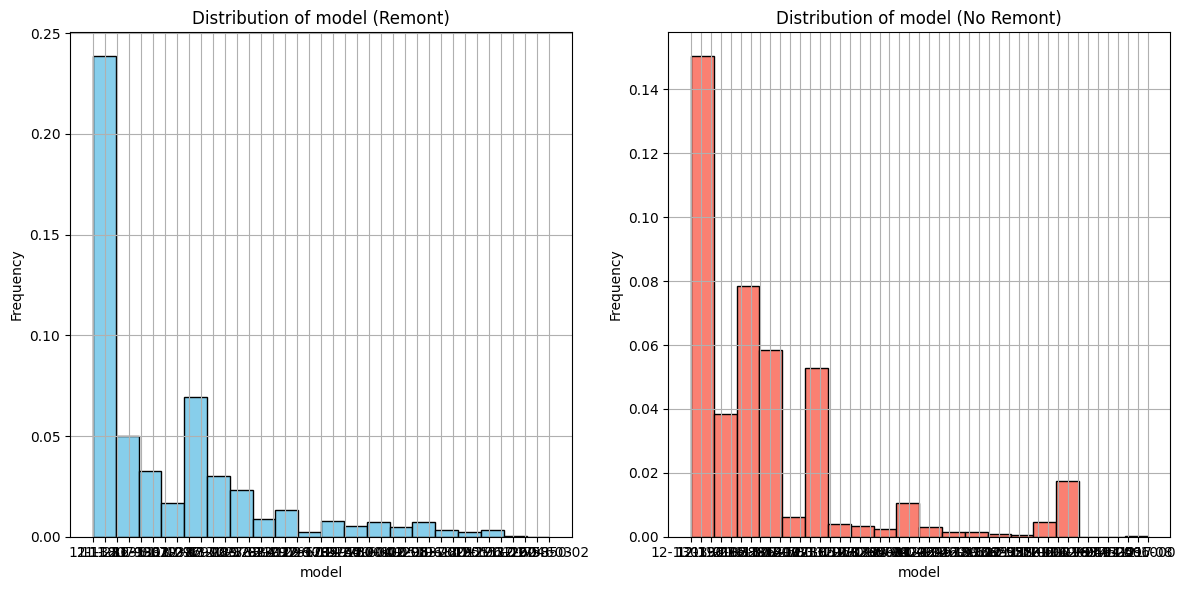

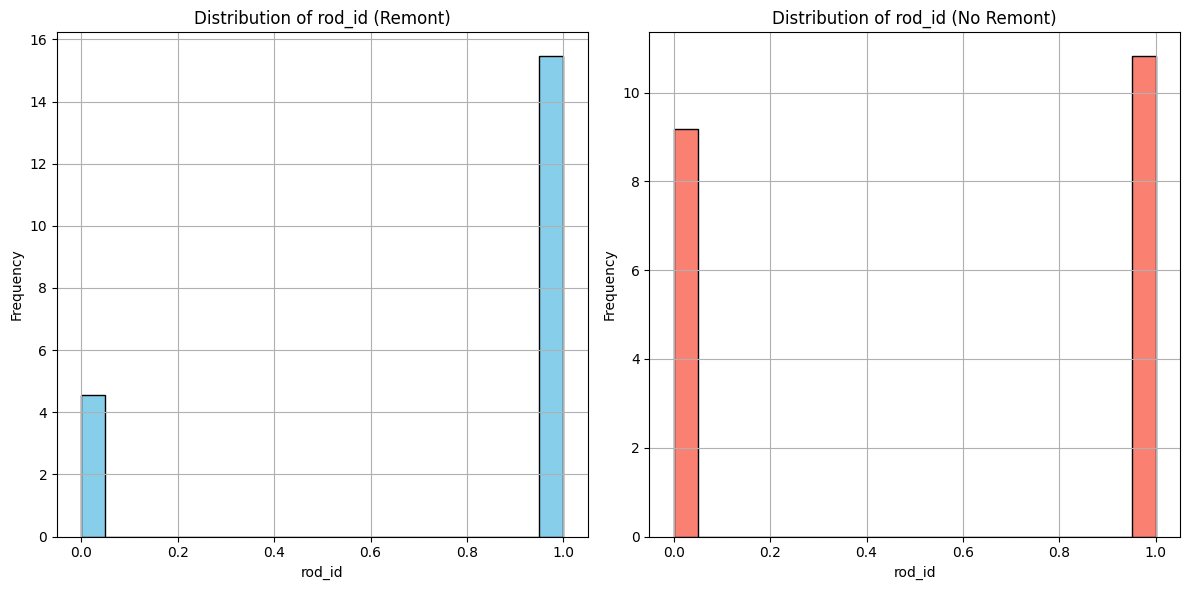

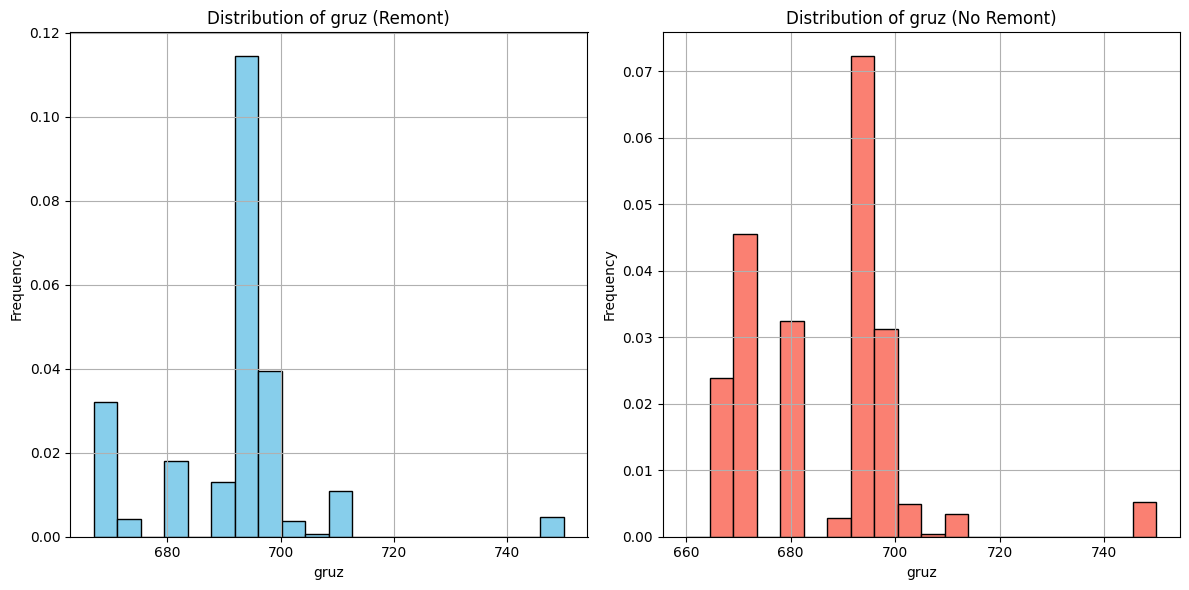

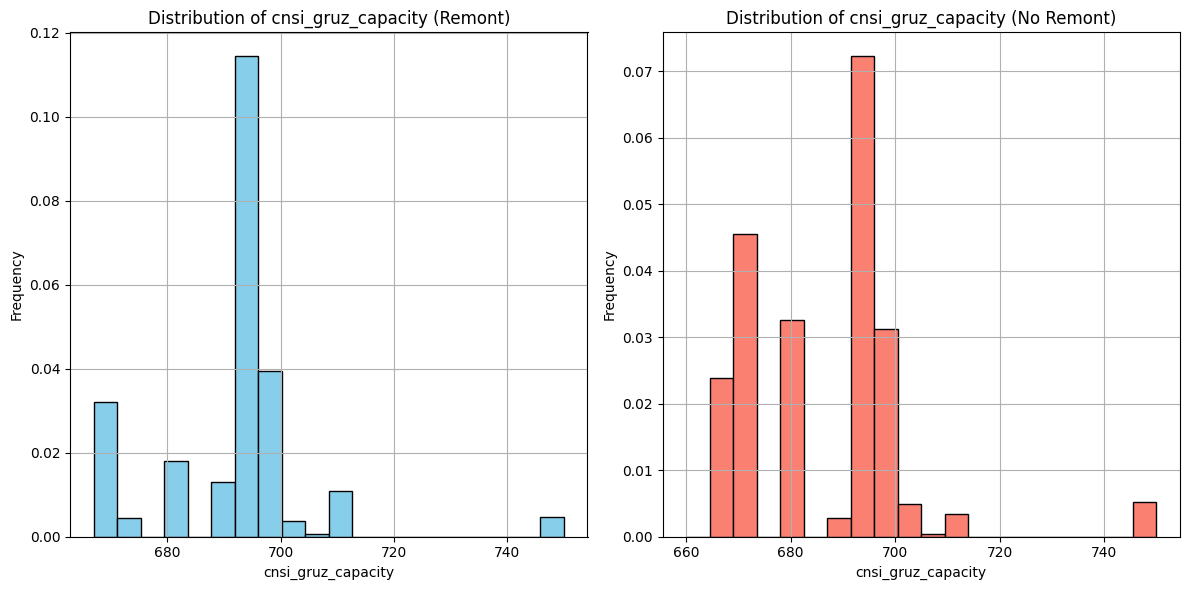

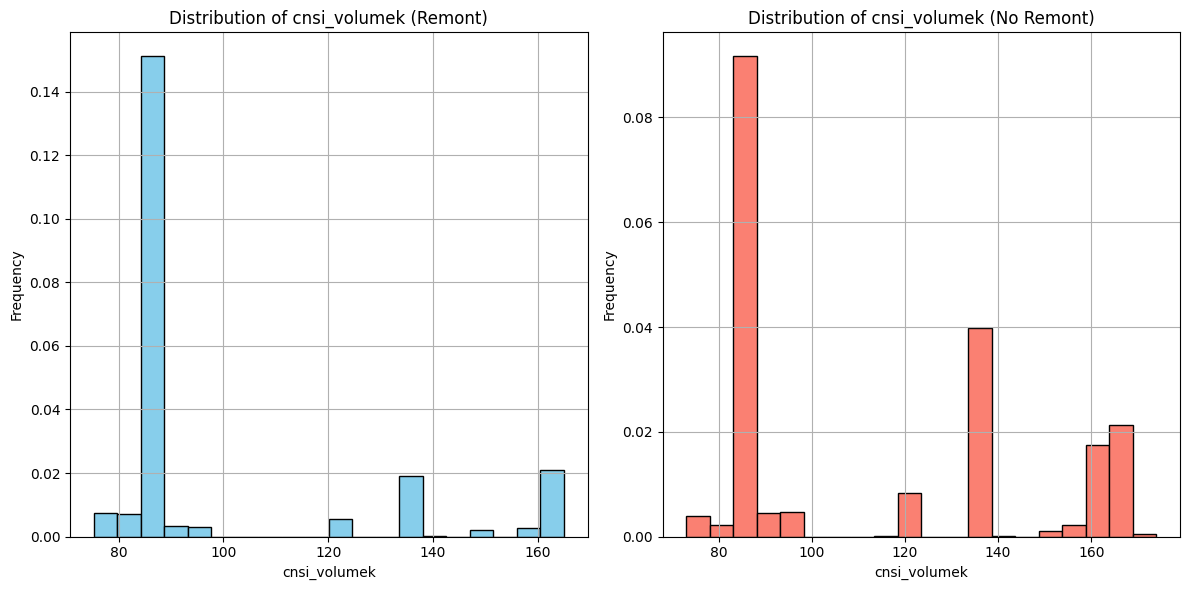

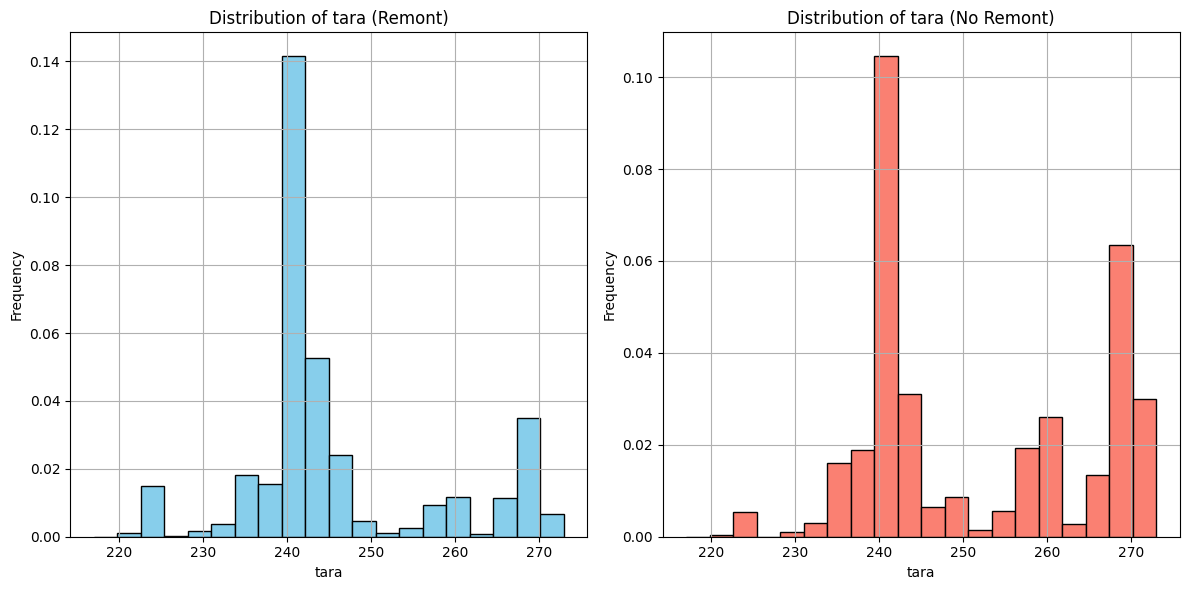

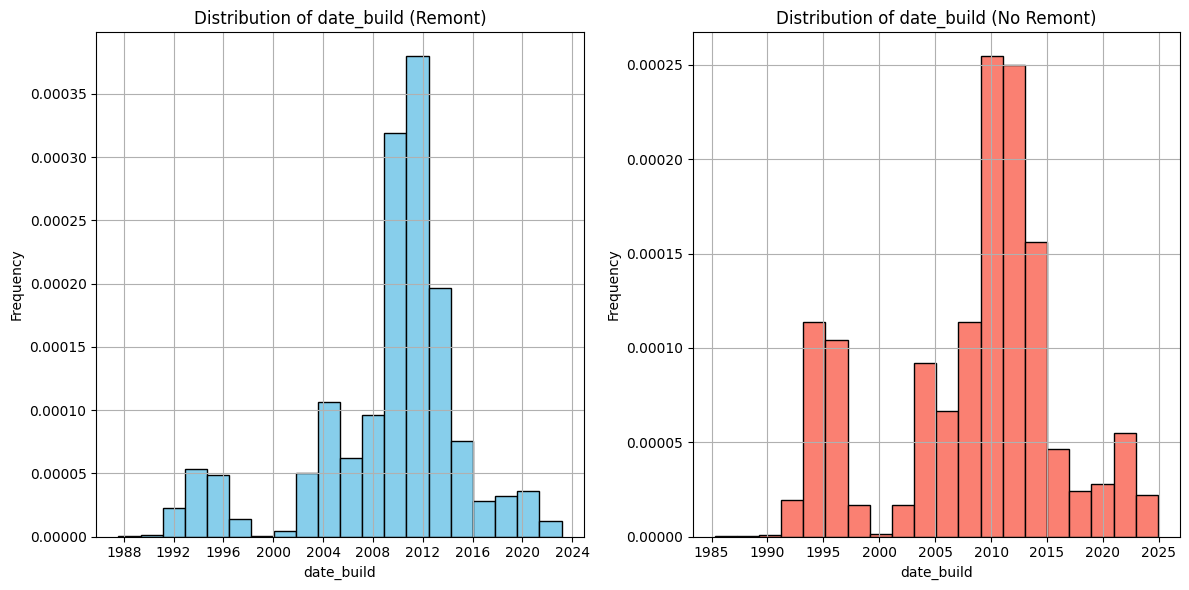

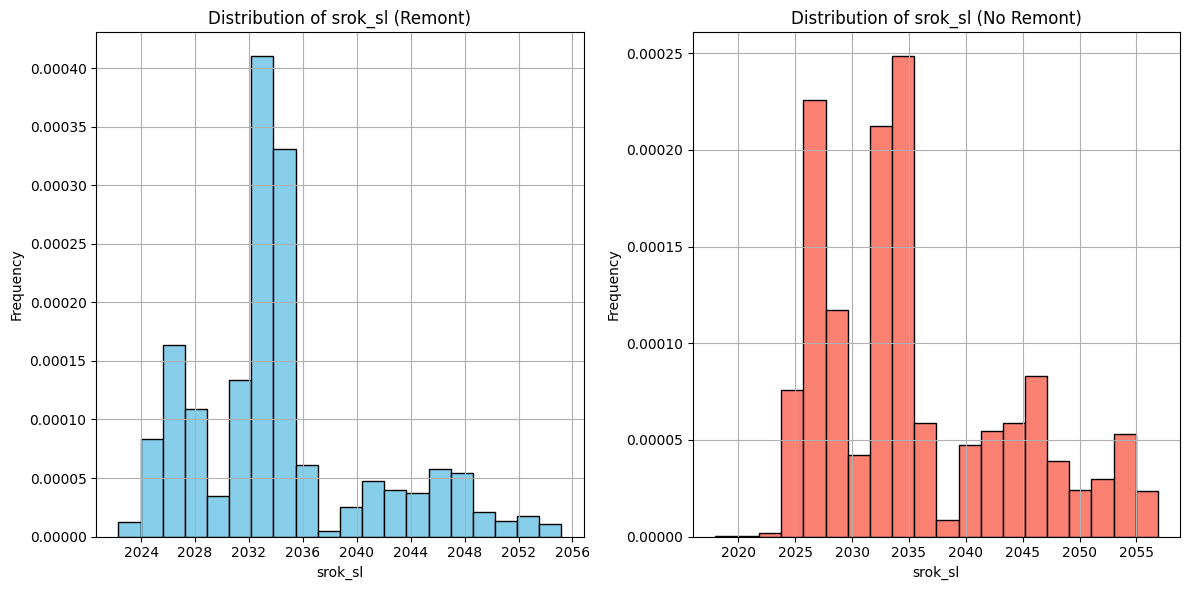

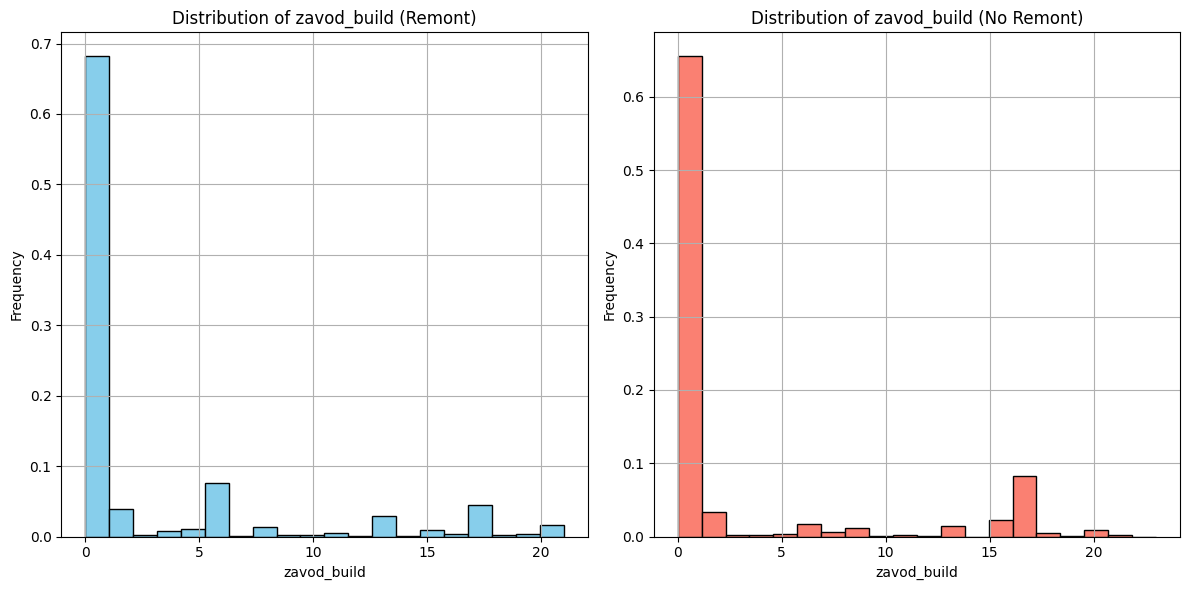

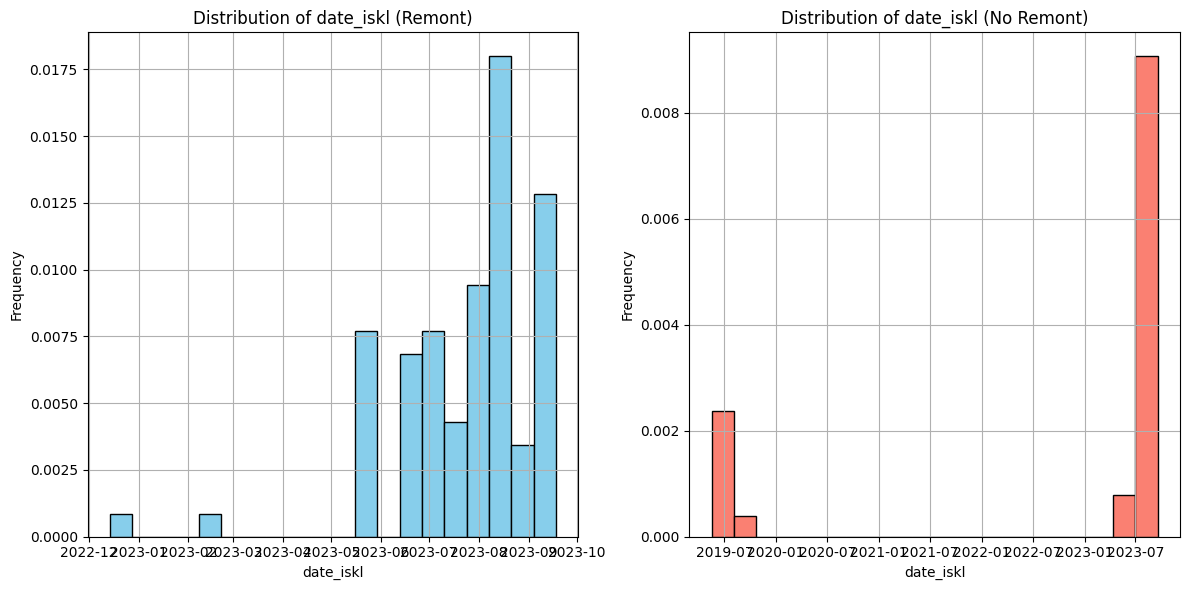

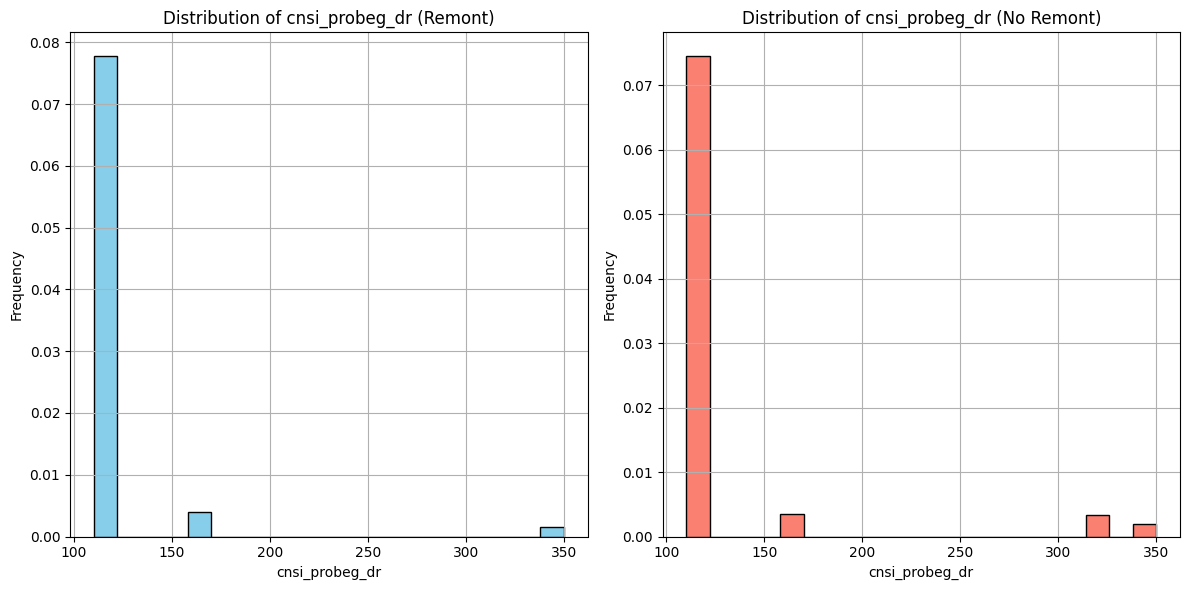

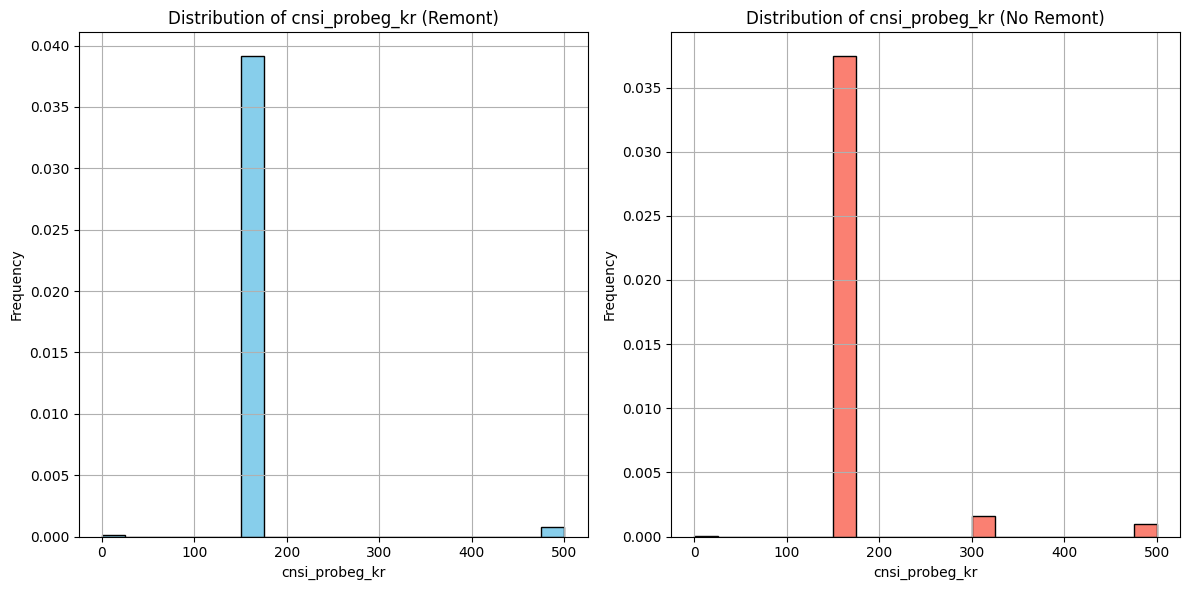

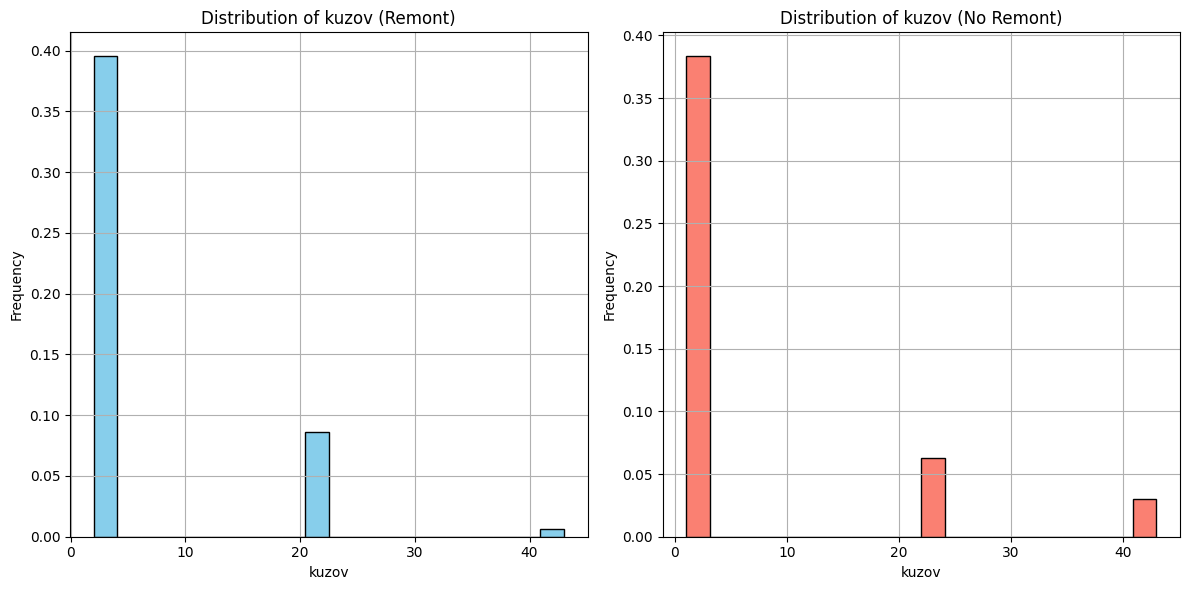

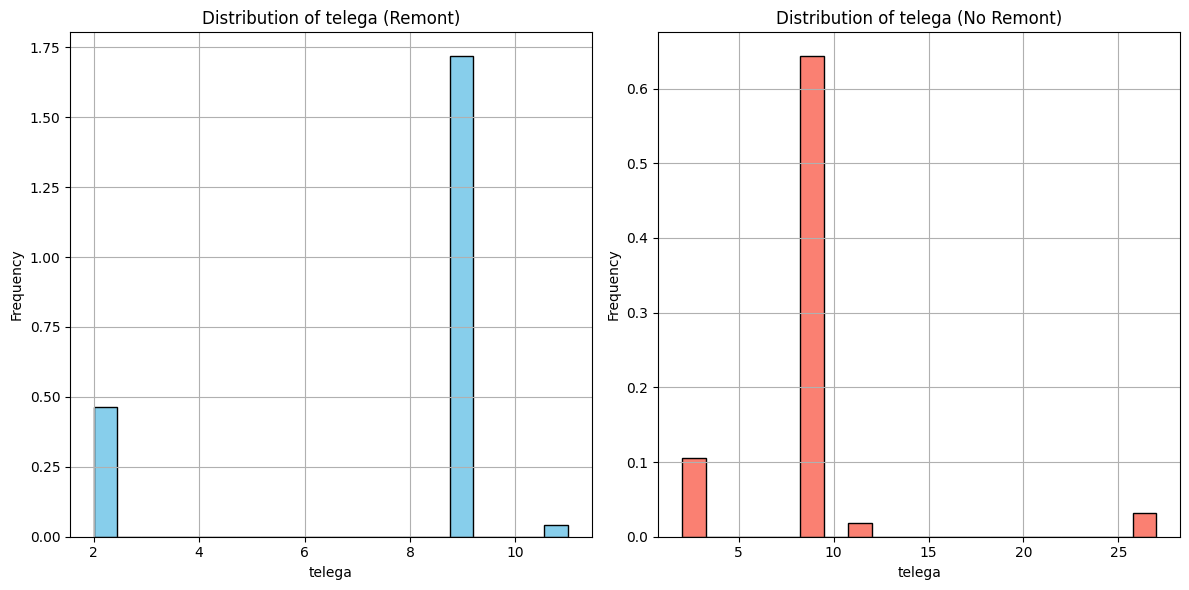

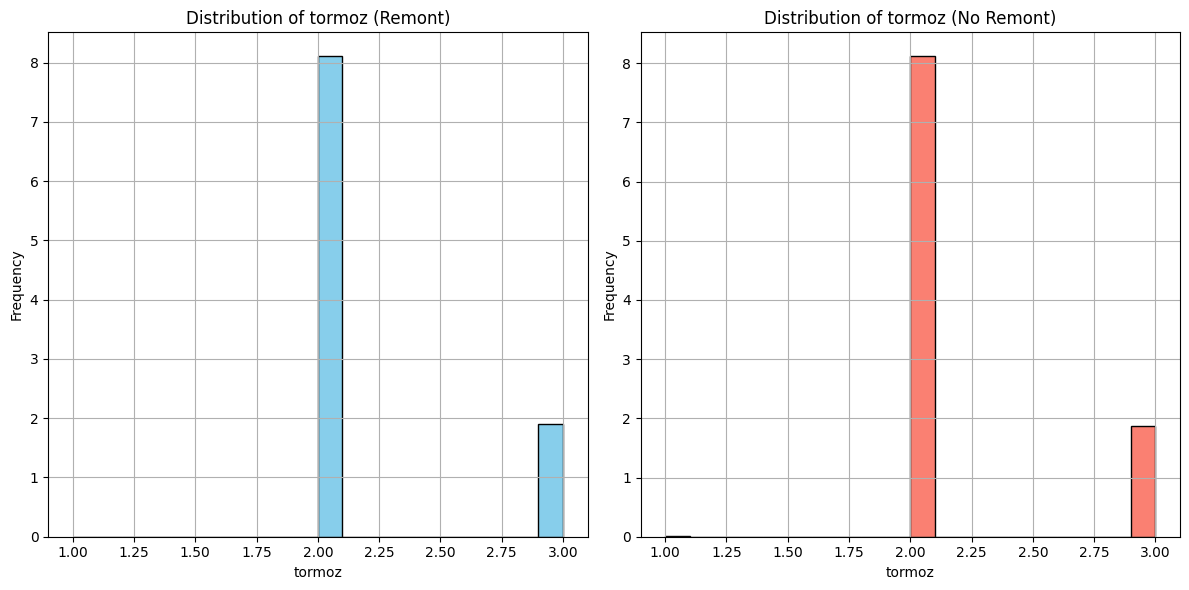

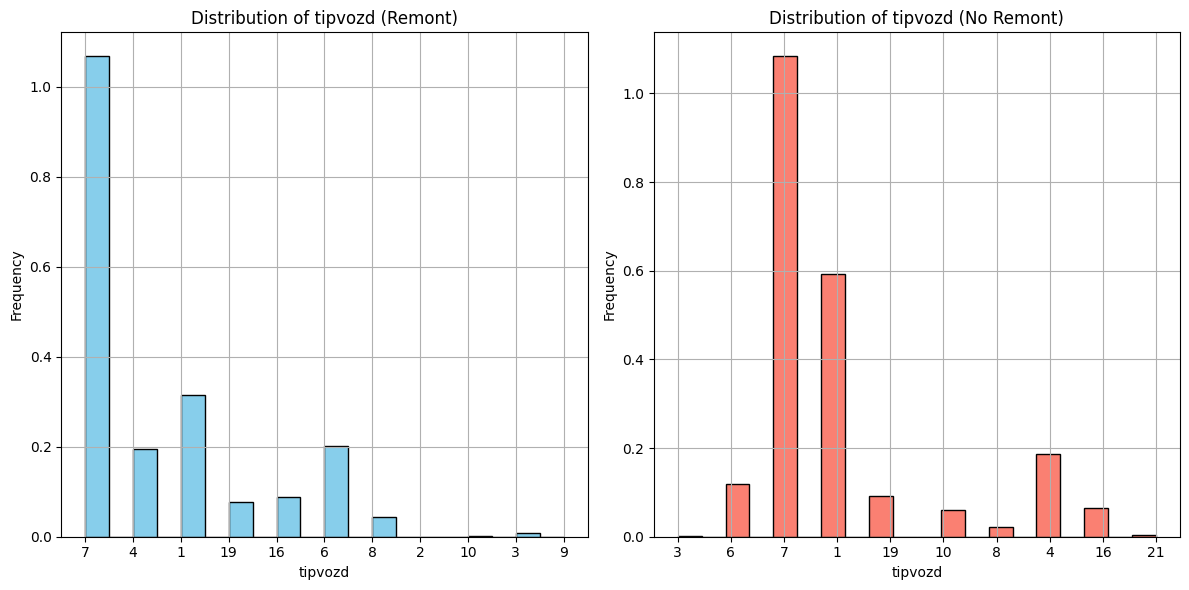

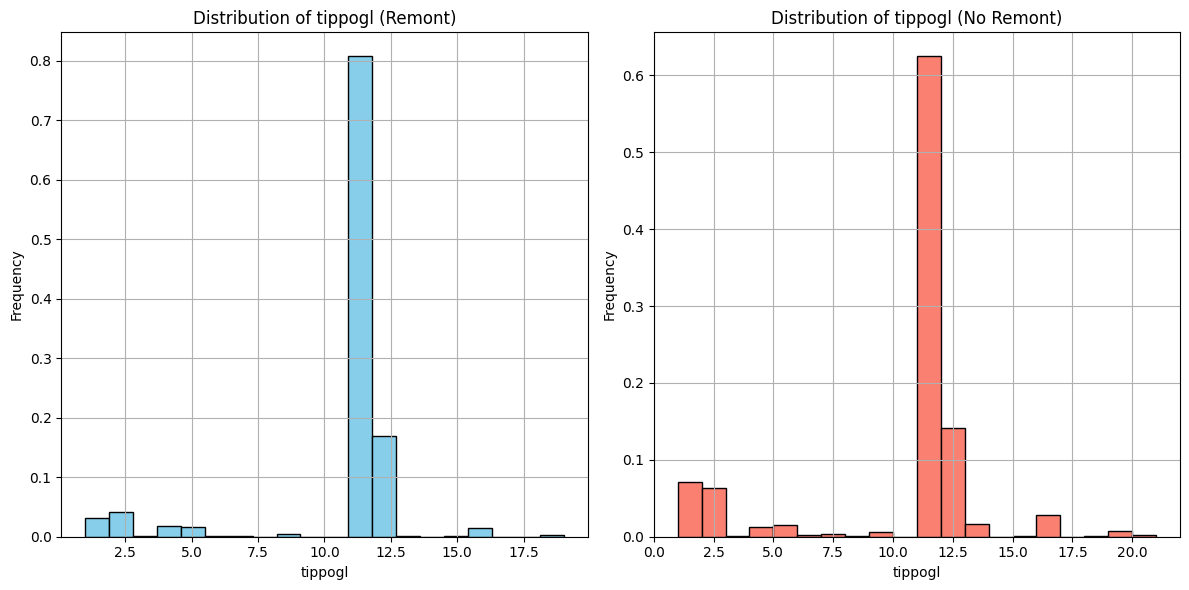

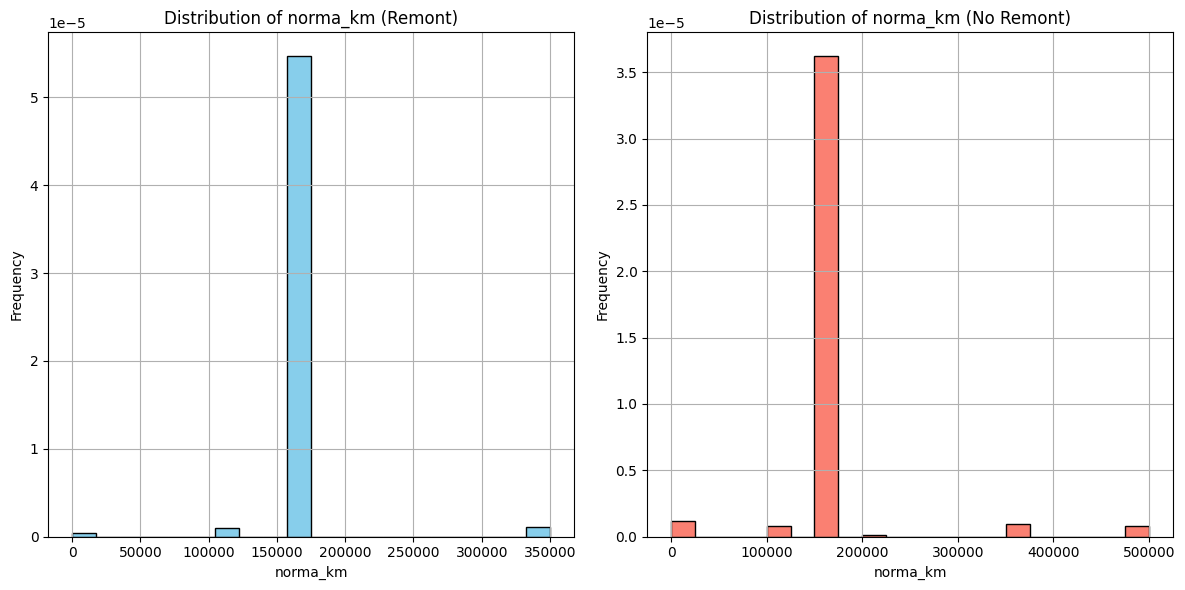

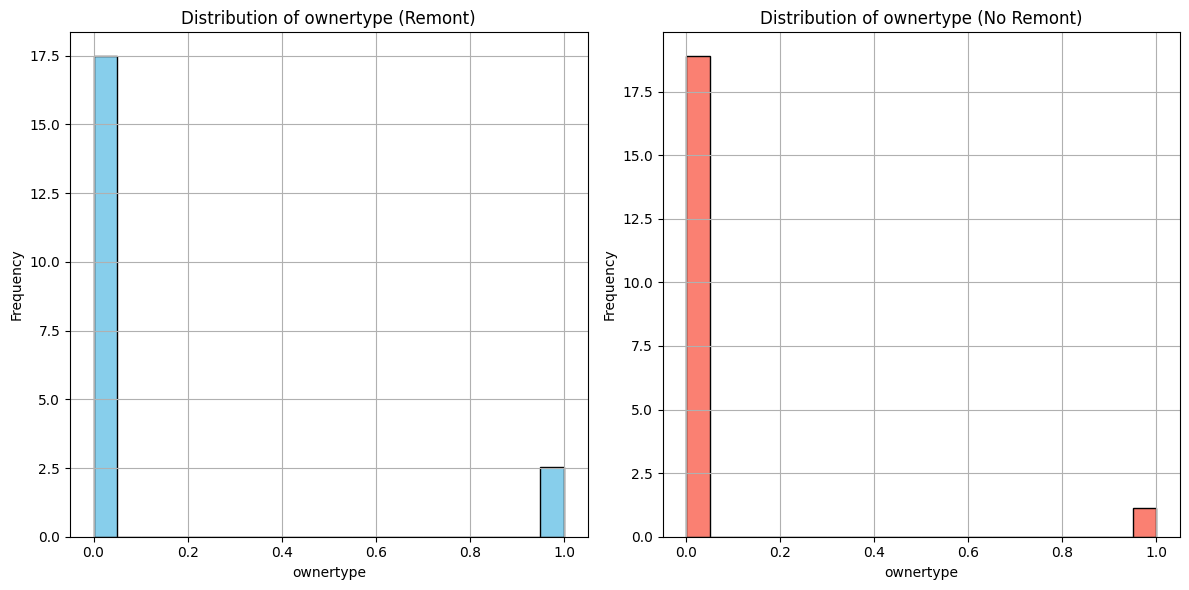

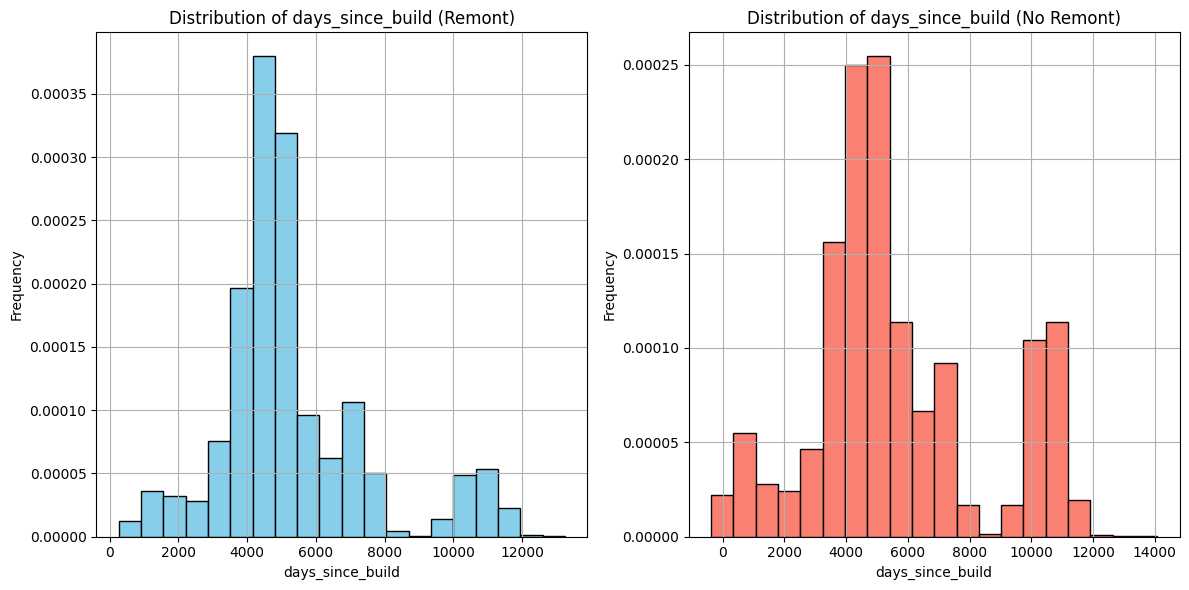

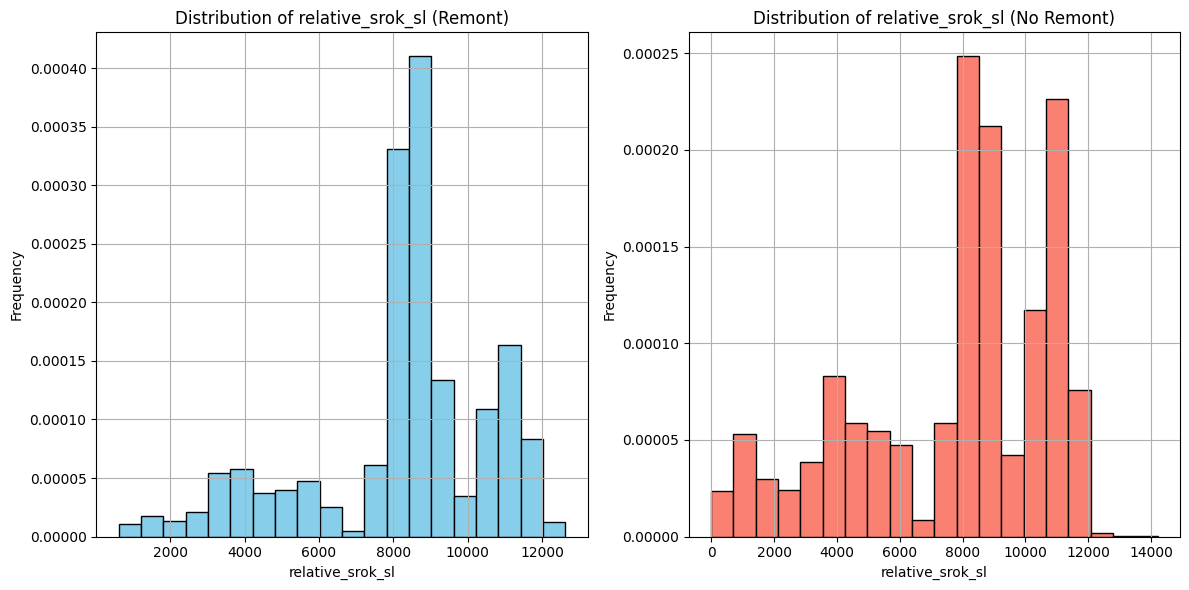

In [ ]:
# Построение распределений для каждого столбца в df_remont и df_ne_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Распределение для df_ne_remont
    plt.subplot(1, 2, 2)
    plt.hist(df_ne_remont[column].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (No Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Корреляционная матрица

<ipython-input-184-8a24ece00a42>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


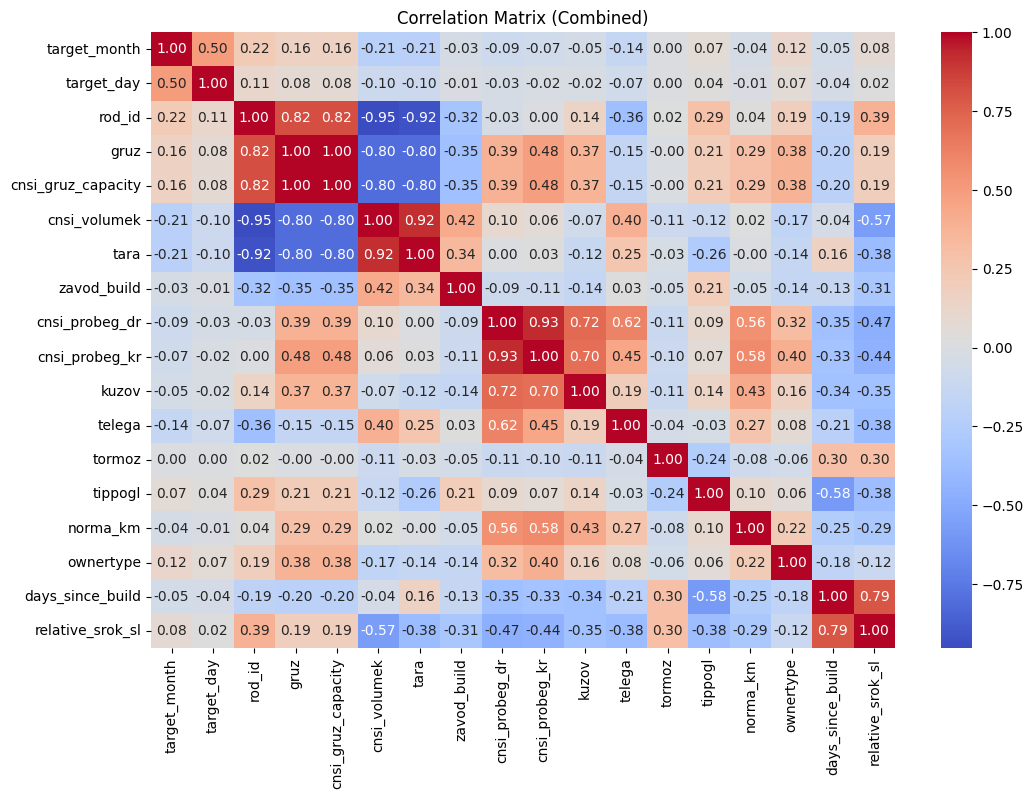

In [ ]:
# Объединение данных в один DataFrame
merged_df = pd.concat([df_remont, df_ne_remont])
merged_df = merged_df.drop(['wagnum'], axis = 1)
# Построение корреляционной матрицы
correlation_matrix = merged_df.corr()

# Построение тепловой карты для корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Combined)')
plt.show()

###**Вывод по корреляционной матрице.**
Учитываем все, кроме tormoz.


---
***Выявление взаимосвязей данных:***
При использовании крытых грузовых вагонов (rod_id = 1) время отправки в ПР сокращается. При использовании полувагонов, путевых машин (rod_id = 0) время отправки в ПР увеличивается.


---
Грузоподъемность. На основании анализа матрицы корреляций можно сделать следующий вывод: чем показатели ниже, тем выше срок эксплуатации, но стоит обратить внимание на следующие зависимости: грузоподъемность зависит от рода вагона - крытые грузовые вагоны обладают большей грузоподъемностью, чем полувагоны. Также чем больше тара, тем меньшее влияние на нее оказывает вес груза. Грузоподъемность и масса груза может влиять не только на износ вагонов, но и на износ железнодорожных путей, а также на скорость передвижения подвижного состава в целом, следовательно, чем выше грузоподъемность и заполненность вагонов в составе, тем больше вероятность раннего выхода вагона в ПР из-за сокращения показателя времени в межремонтном ресурсе.

---

Неочевидна зависимость между типом собственности и датой ПР. Не все вагоны оперируются и закупаются ПГК, следовательно, они могут как предоставляться клиентам на лизинговой основе, так и находится в парке ПГК по договору аренды. Лизингополучатель может экспуатировать вагоны с разной интенсивностью, отличной от принципов эксплуатации ПГК. Предоставленные по договору аренды вагоны могут иметь дефекты и повреждения, требующие ремонта. Данные факторы влияют на прогнозирование даты отправления вагона в ПР: чем интенсивнее расходуется ресурс вагона лизингополучателем, тем ближе срок ПР и чем больше принятых в аренду и привлеченных в парк вагонов у компании ПГК, тем выше возможное количество неисправностей вагонов, увеличение загруженности ВРП и простоя.


###2.2. Остаточный пробег

In [ ]:
# список вагонов с остаточным пробегом на момент прогноза
wag_prob = pd.read_parquet(path_train + '/wagons_probeg_ownersip.parquet').convert_dtypes()
wag_prob

repdate  wagnum  ost_prob  manage_type  rod_id  reestr_state  \
0       2022-08-01   33361      7541            0       1             1   
1       2022-08-02   33361      7243            0       1             1   
2       2022-08-03   33361      6990            0       1             1   
3       2022-08-04   33361      6347            0       1             1   
4       2022-08-05   33361      6027            0       1             1   
...            ...     ...       ...          ...     ...           ...   
9249584 2022-12-20   33350     35062            0       1             0   
9249585 2022-12-21   33350     35062            0       1             0   
9249586 2022-12-22   33350     35062            0       1             0   
9249587 2022-12-23   33350     35062            0       1             0   
9249588 2022-12-24   33350     35062            0       1             0   

         ownership_type  month  
0                     0      8  
1                     0      8  
2                     0      8  
3                     0      8  
4                     0      8  
...                 ...    ...  
9249584               0     12  
9249585               0     12  
9249586               0     12  
9249587               0     12  
9249588               0     12  

[6249857 rows x 8 columns]

In [ ]:
wag_prob['manage_type'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [ ]:

# Проверка наличия пропущенных значений в столбце 'ost_prob' для каждого 'wagnum'
missing_values = wag_prob.groupby('wagnum')['ost_prob'].apply(lambda x: x.isnull().all())

# Исключаем 'wagnum' с пропущенными значениями
wagnum_without_missing_values = missing_values[~missing_values].index

# Выбираем только те строки, у которых 'wagnum' не имеет пропущенных значений
wag_prob_min_ost = wag_prob[wag_prob['wagnum'].isin(wagnum_without_missing_values)]

# Находим индексы минимальных значений в столбце 'ost_prob' для каждого 'wagnum'
idx_min_ost = wag_prob_min_ost.groupby('wagnum')['ost_prob'].idxmin()

# Получаем соответствующие строки в исходном датафрейме
wag_prob_min_ost = wag_prob_min_ost.loc[idx_min_ost]

# Вывод результата
print(wag_prob_min_ost)

           repdate  wagnum  ost_prob  manage_type  rod_id  reestr_state  \
8254795 2023-01-16       0     52852            0       0             1   
8338518 2023-01-23       1     93045            0       0             1   
7635468 2023-01-31       2     53122            0       0             1   
7115926 2023-01-31       3     55940            0       0             1   
8520097 2023-01-30       4     90612            0       0             1   
...            ...     ...       ...          ...     ...           ...   
2162301 2022-11-30   33972       356            0       1             1   
2162512 2022-09-29   33973       123            0       1             1   
2162841 2022-11-24   33974     24520            0       1             1   
6122472 2022-10-10   33975      1358            0       1             1   
6902440 2022-10-28   33976       774            0       1             1   

         ownership_type  month  
8254795               0      1  
8338518               0      1  


In [ ]:
df_remont = pd.merge(y_train_remont, wag_prob_min_ost, on='wagnum')
df_ne_remont = pd.merge(y_train_ne_remont, wag_prob_min_ost, on='wagnum')
print(f'Размерность в ремонте: {df_remont.shape}')
print(f'Размерность не в ремонте: {df_ne_remont.shape}')

Размерность в ремонте: (10370, 11)
Размерность не в ремонте: (22444, 11)


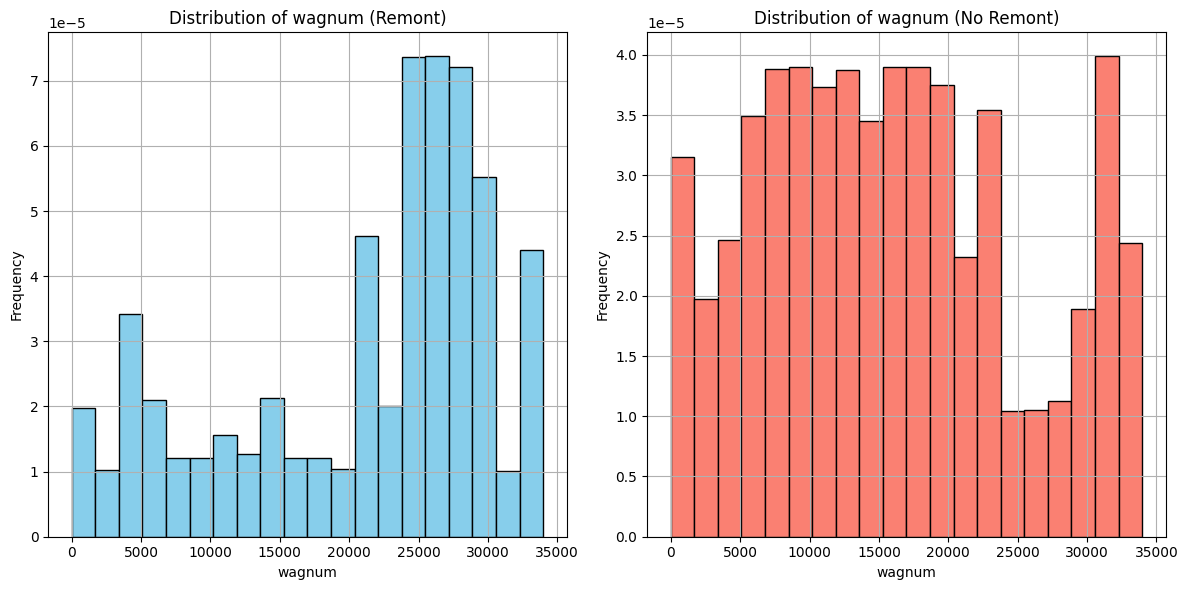

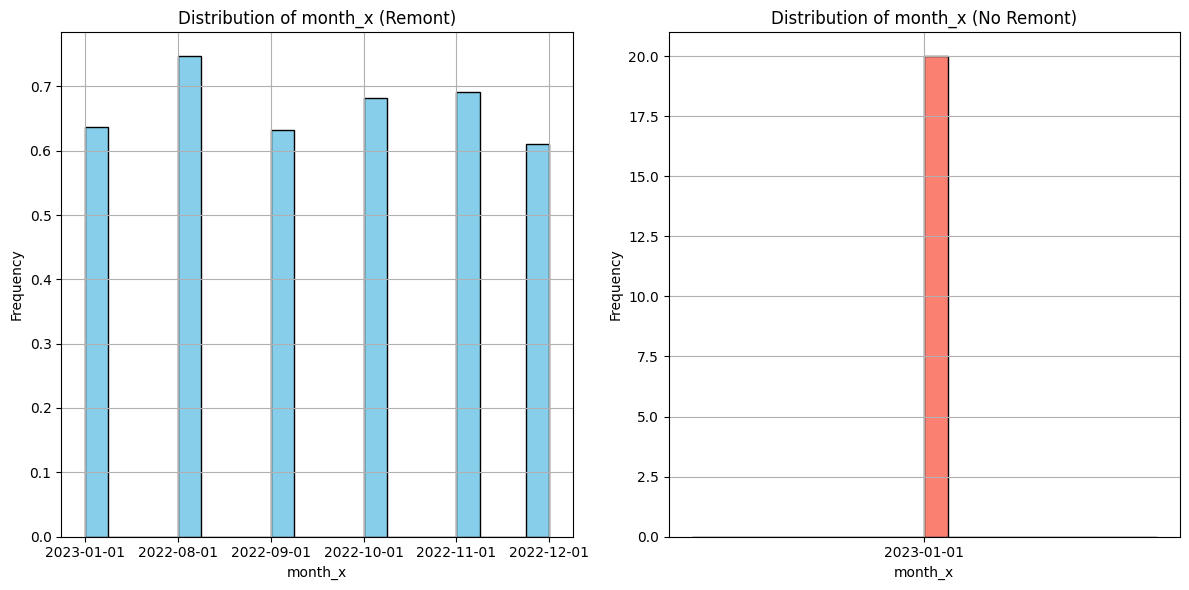

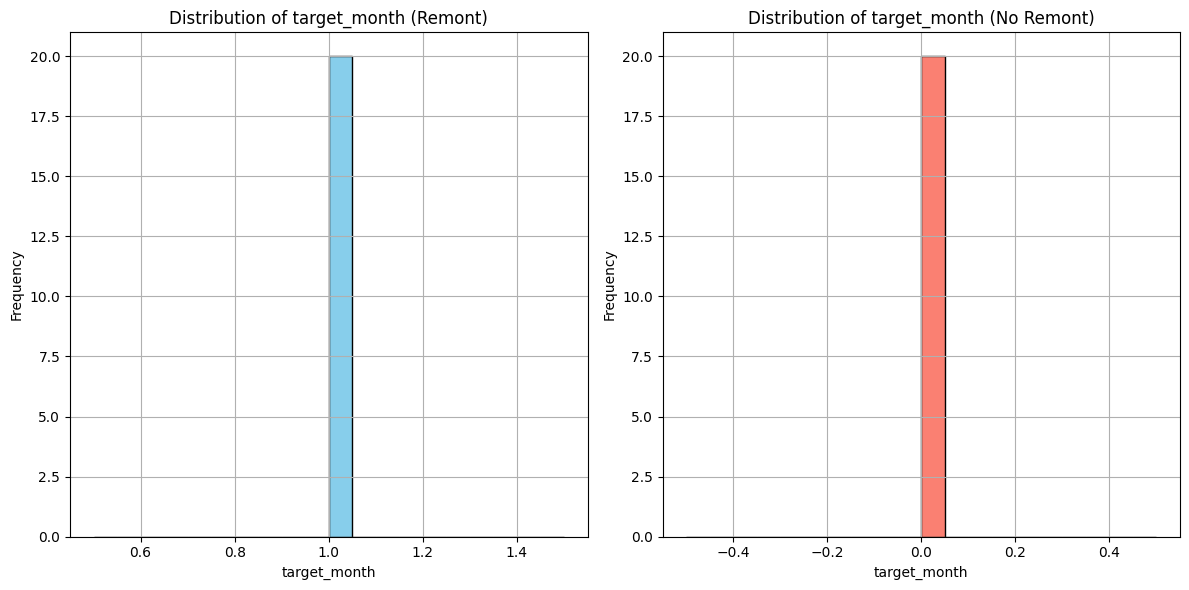

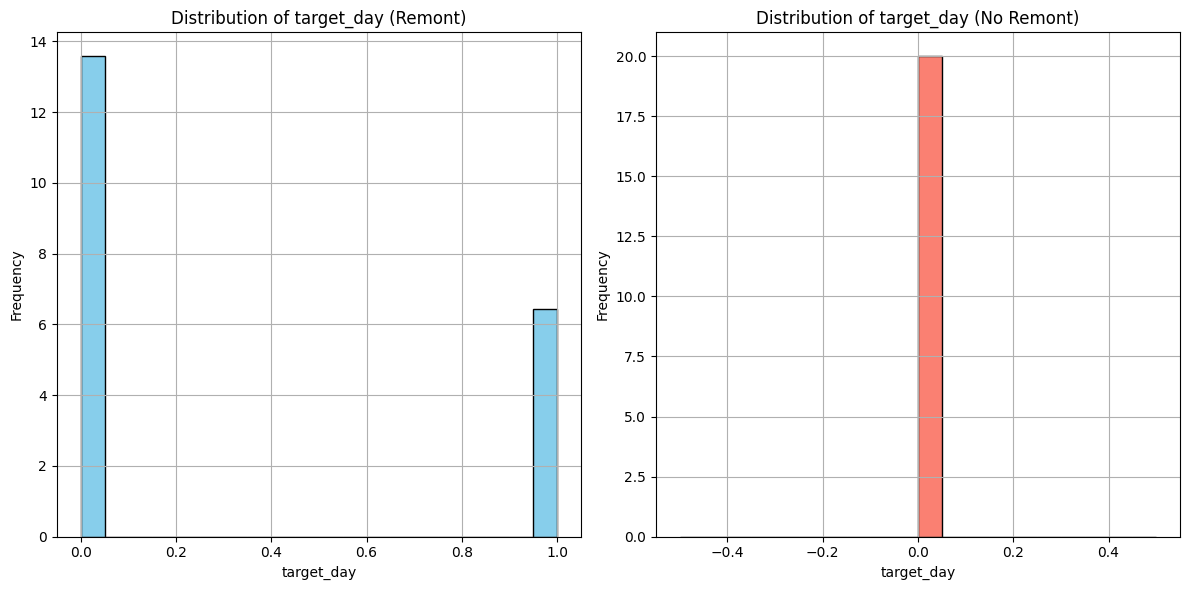

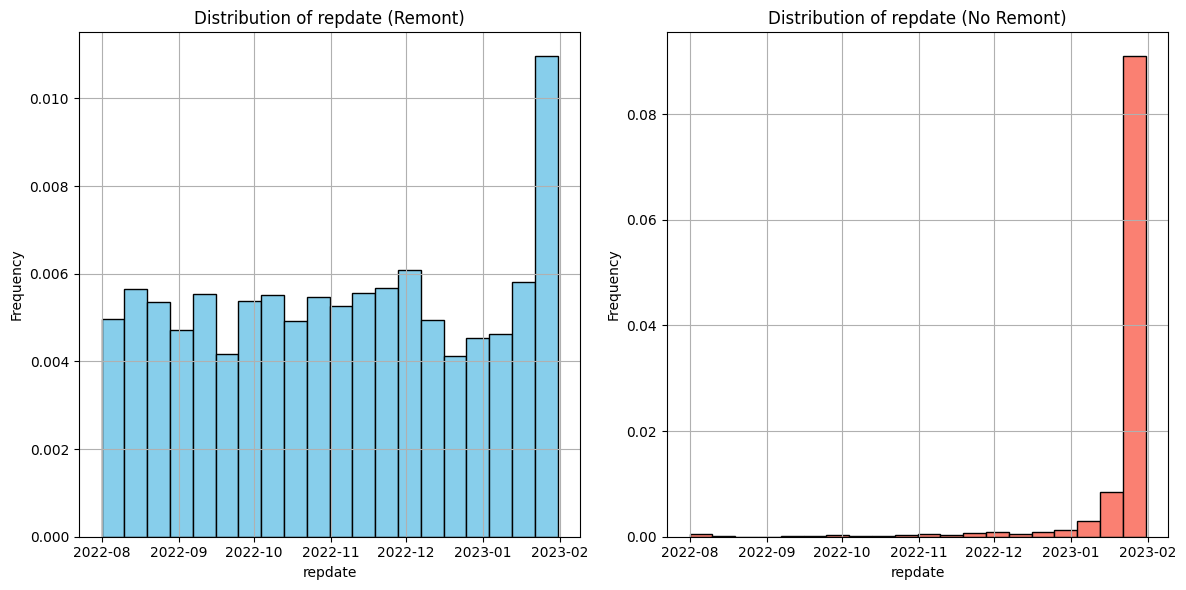

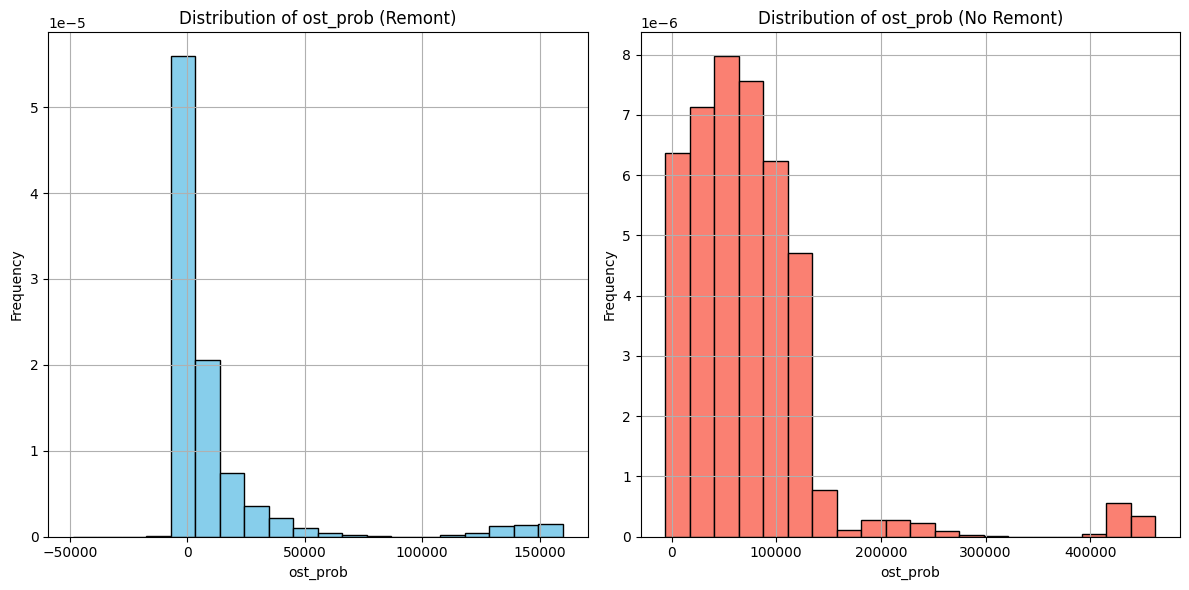

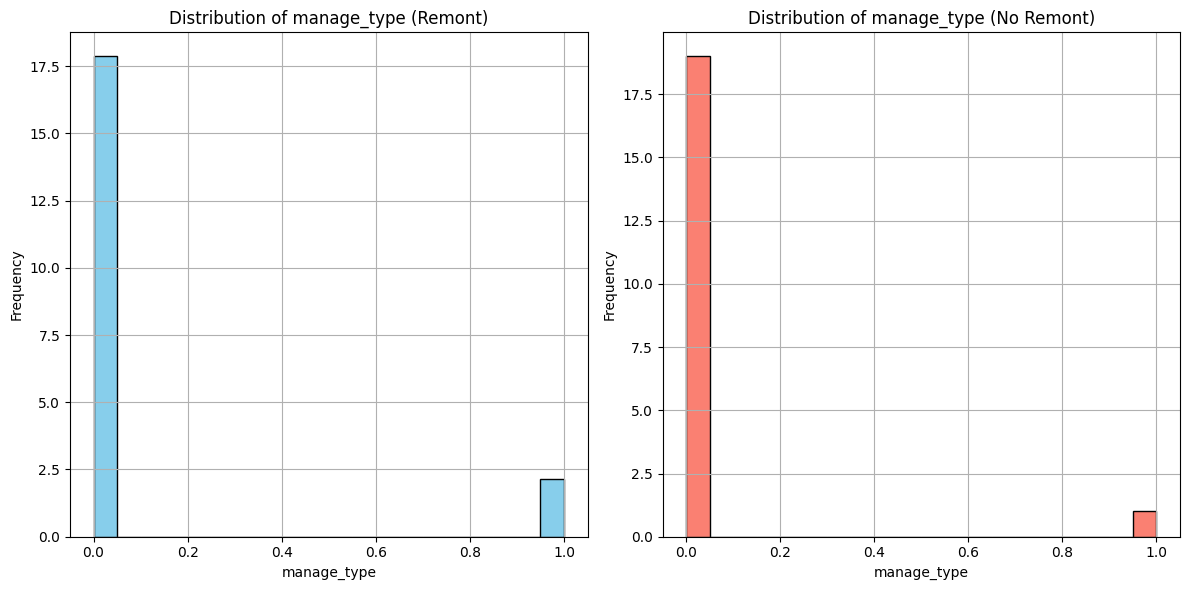

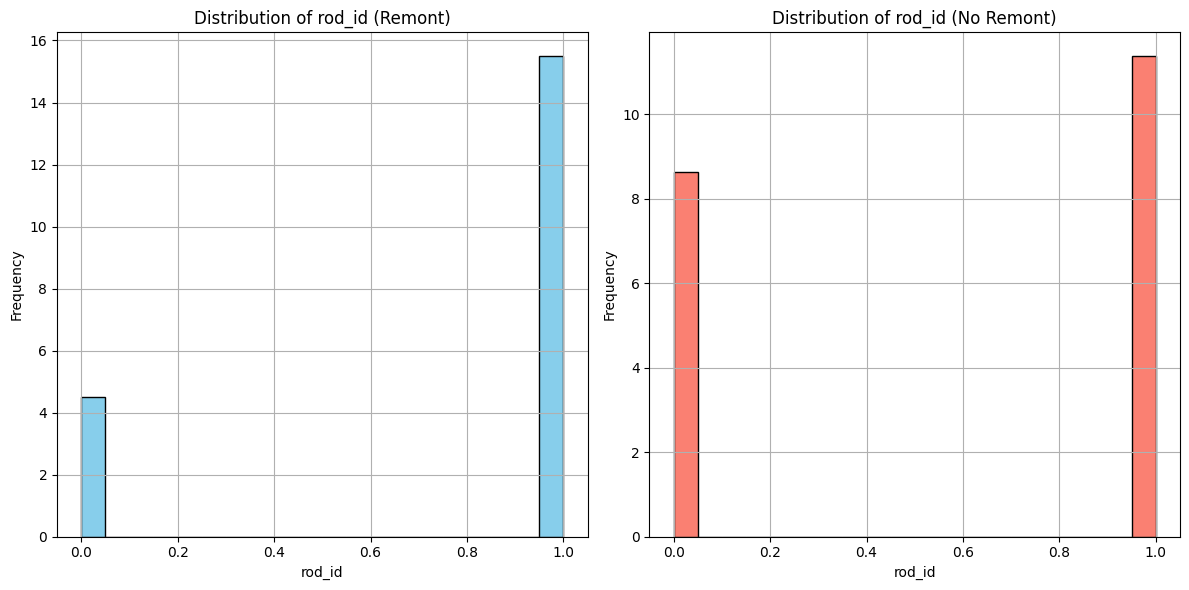

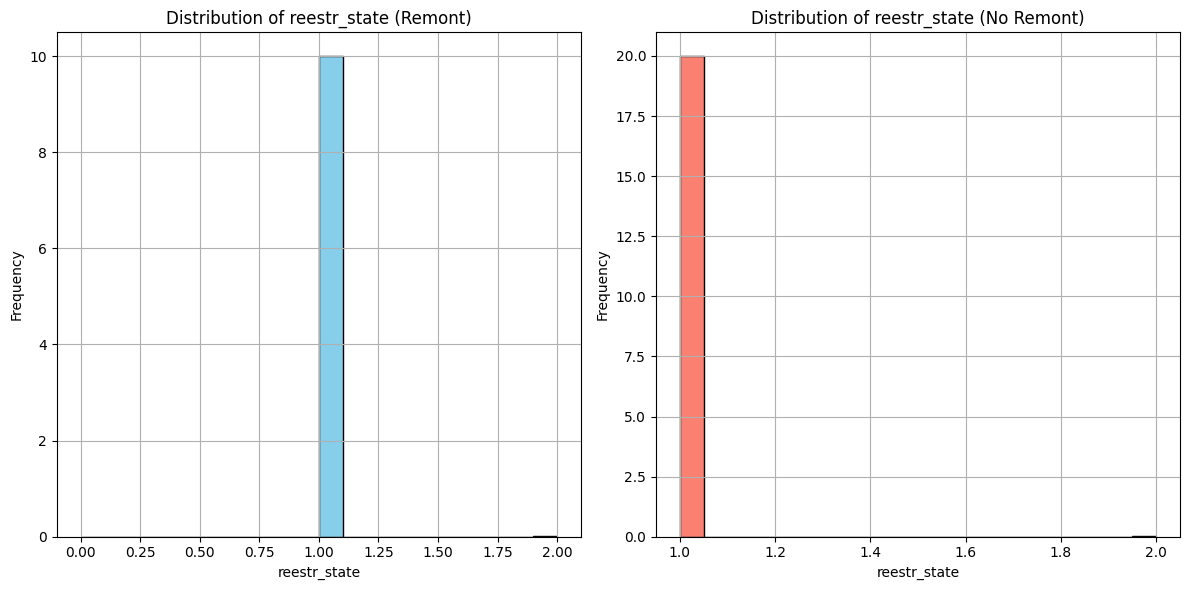

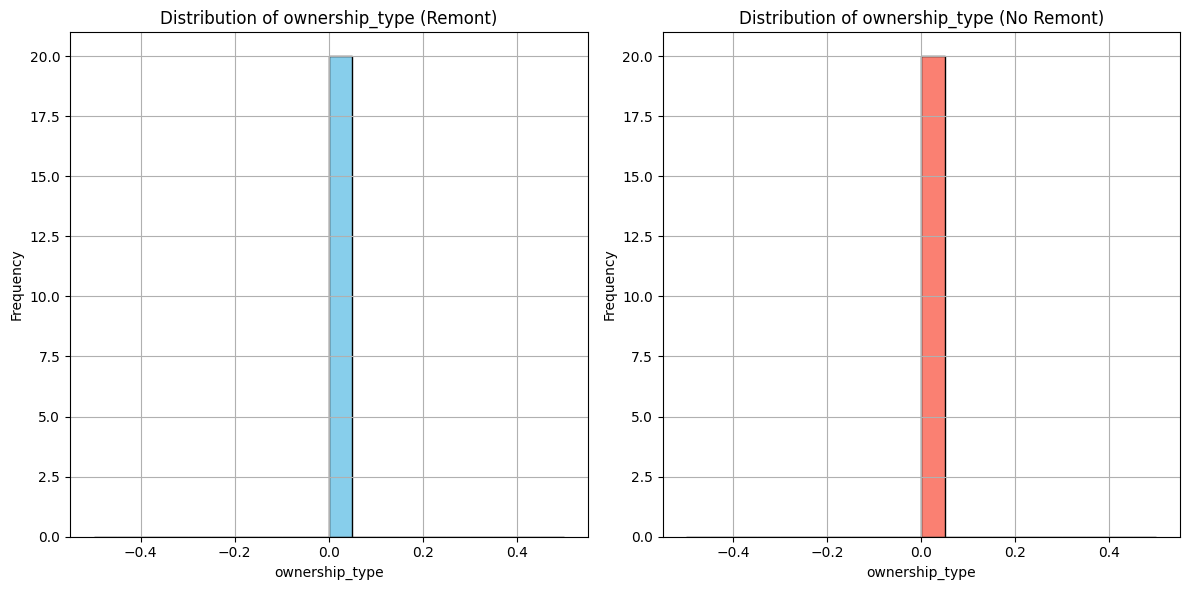

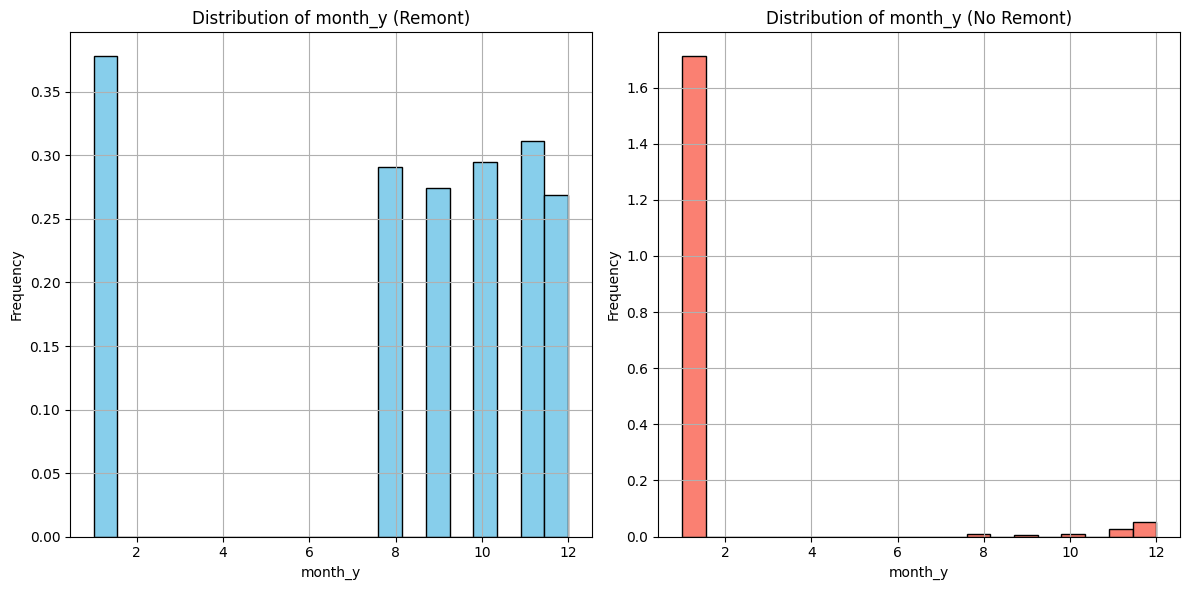

In [ ]:

# Построение распределений для каждого столбца в df_remont и df_ne_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Распределение для df_ne_remont
    plt.subplot(1, 2, 2)
    plt.hist(df_ne_remont[column].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (No Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

<ipython-input-82-ffc1e09def6b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


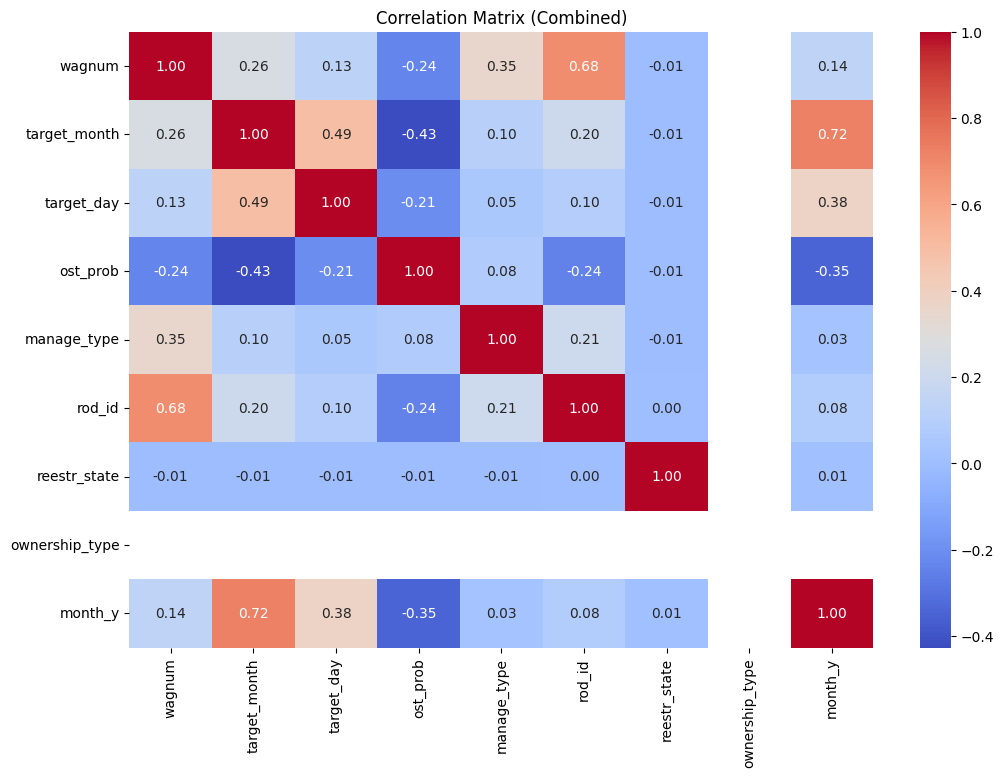

In [ ]:
# Объединение данных в один DataFrame
merged_df = pd.concat([df_remont, df_ne_remont])

# Построение корреляционной матрицы
correlation_matrix = merged_df.corr()

# Построение тепловой карты для корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Combined)')
plt.show()

###**Вывод по корреляционной матрице.**  

Учитываем все, кроме reestr_state.


---

***Выявление взаимосвязей данных:*** Остаточный пробег вагона непосредственно влияет на дату проведения ПР. Определенное количество отремонтированных вагонов имели отрицательный остаточный пробег, что может свидетельствовать о высокой удаленности ВПР и их загруженности. В анализируемом наборе данных присутствует большое количество вагонов с низким остаточным пробегом, следовательно, в скором времени им потребуется ПР.

---

РПС взаимосвязан с остаточным пробегом. Внедрение большего количества полувагонов в парк ПГК позволит снизить загруженность ВПР и усовершенствовать логистические процессы компании, т.к. дата предполагаемого ПР вагонов парка сдвинется в сторону увеличения.


###2.3. Данные по дислокации

In [ ]:
# данные по дислокации
dislok = pd.read_parquet(path_train + '/dislok_wagons.parquet').convert_dtypes()
# Исключаем строки с пропущенными значениями в столбце 'ost_prob'
dislok_no_missing = dislok.dropna(subset=['ost_prob'])

# Находим индексы минимальных значений в столбце 'ost_prob' для каждого 'wagnum'
idx_min_ost = dislok_no_missing.groupby('wagnum')['ost_prob'].idxmin()

# Получаем соответствующие строки в исходном датафрейме
dislok_min_ost = dislok_no_missing.loc[idx_min_ost]

# Удаление дубликатов по столбцу 'wagnum'
dislok_min_ost_unique = dislok_min_ost.drop_duplicates(subset='wagnum')

# Вывод результата
print(dislok_min_ost_unique)

        plan_date  wagnum   date_kap   date_dep  kod_vrab date_pl_rem  \
694862 2022-08-29   22976 2020-06-11 2018-05-21         0  2023-06-11   
694862 2022-09-03   23251 2020-12-18 2018-06-30         0  2023-12-18   
694862 2022-10-10   25484 2020-11-03 2018-08-13         0  2023-11-03   
694862 2022-11-03   17404 2021-12-28 2020-01-07         0  2024-12-28   
694862 2022-12-22   28837        NaT 2020-08-25         1  2023-08-25   
...           ...     ...        ...        ...       ...         ...   
599024 2022-10-28   33622        NaT 2021-08-26         0  2022-08-26   
737656 2023-01-30   33921        NaT 2021-10-23         0  2022-10-23   
63233  2023-01-31   33922        NaT 2021-11-01         0  2022-11-01   
606985 2023-01-18   33931        NaT 2021-10-20         0  2022-10-20   
933975 2023-01-29   33953        NaT 2021-10-29         0  2022-10-29   

        id_road_disl  st_id_dest  id_road_dest  st_id_send  id_road_send  \
694862            28          22            28 

In [ ]:
# Подсчет количества уникальных значений в столбце 'wagnum'
unique_wagnum_count =dislok_min_ost['wagnum'].nunique()

# Вывод количества уникальных значений
print("Количество уникальных  'wagnum':", unique_wagnum_count)

Количество уникальных  'wagnum': 32814


In [ ]:
df_remont = pd.merge(y_train_remont, dislok_min_ost_unique, on='wagnum')
df_ne_remont = pd.merge(y_train_ne_remont, dislok_min_ost_unique, on='wagnum')
print(f'Размерность в ремонте: {df_remont.shape}')
print(f'Размерность не в ремонте: {df_ne_remont.shape}')

Размерность в ремонте: (10370, 19)
Размерность не в ремонте: (22444, 19)


Аналогично преобразованию формата дат для wag_params преобразуем даты в данном датафрейме.

In [ ]:
# Преобразуем столбец 'date_kap' в формат datetime
df_ne_remont['date_kap'] = pd.to_datetime(df_ne_remont['date_kap'])
df_remont['date_kap'] = pd.to_datetime(df_remont['date_kap'])
# Задаем дату 2023-11-11
reference_date = datetime(2023, 11, 11)

# Рассчитываем разность в днях и заменяем столбец
df_ne_remont['days_kap'] = (reference_date - df_ne_remont['date_kap']).dt.days
df_remont['days_kap'] = (reference_date - df_remont['date_kap']).dt.days
# Удаляем исходный столбец 'date_kap', если нужно
# df_ne_remont.drop('date_kap', axis=1, inplace=True)

# Преобразуем столбец 'date_dep' в формат datetime
df_ne_remont['date_dep'] = pd.to_datetime(df_ne_remont['date_dep'])
df_remont['date_dep'] = pd.to_datetime(df_remont['date_dep'])
# Задаем дату 2023-11-11
reference_date = datetime(2023, 11, 11)

# Рассчитываем разность в днях и заменяем столбец
df_ne_remont['days_dep'] = (reference_date - df_ne_remont['date_dep']).dt.days
df_remont['days_dep'] = (reference_date - df_remont['date_dep']).dt.days
# Удаляем исходный столбец 'date_dep', если нужно
# df_ne_remont.drop('date_kap', axis=1, inplace=True)

# Преобразуем столбец 'date_pl_rem' в формат datetime
df_ne_remont['date_pl_rem'] = pd.to_datetime(df_ne_remont['date_pl_rem'])
df_remont['date_pl_rem'] = pd.to_datetime(df_remont['date_pl_rem'])
# Задаем дату 2015-11-11
reference_date = datetime(2015, 11, 11)

# Рассчитываем разность в днях и заменяем столбец
df_ne_remont['days_pl_rem'] = (df_ne_remont['date_pl_rem'] - reference_date).dt.days
df_remont['days_pl_rem'] = (df_remont['date_pl_rem'] - reference_date).dt.days
# Удаляем исходный столбец 'date_dep', если нужно
# df_ne_remont.drop('date_kap', axis=1, inplace=True)

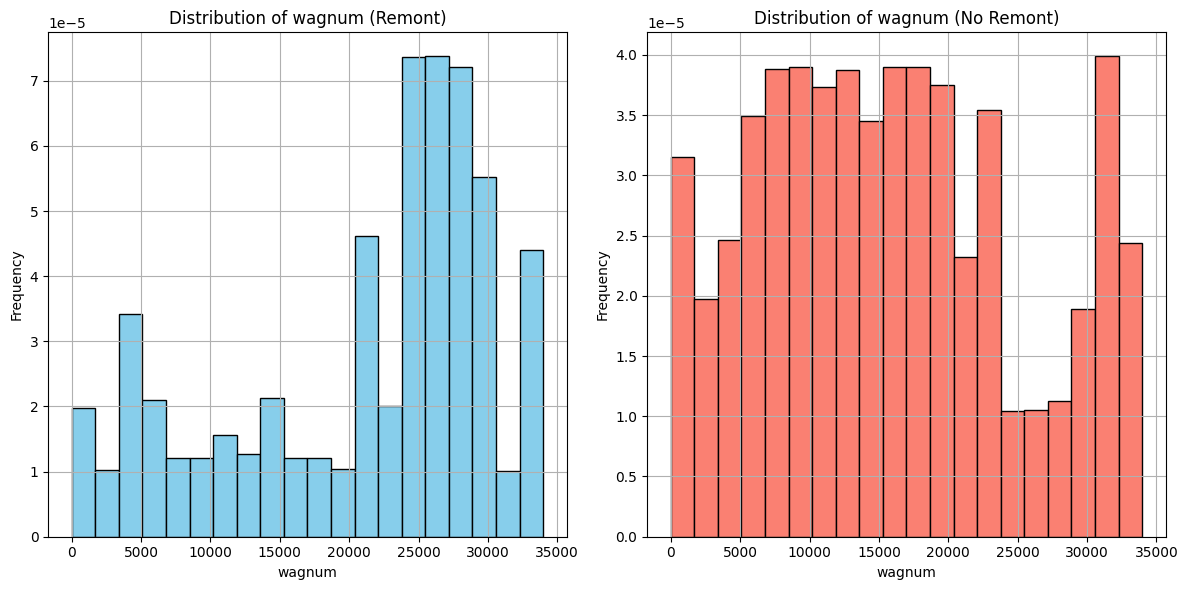

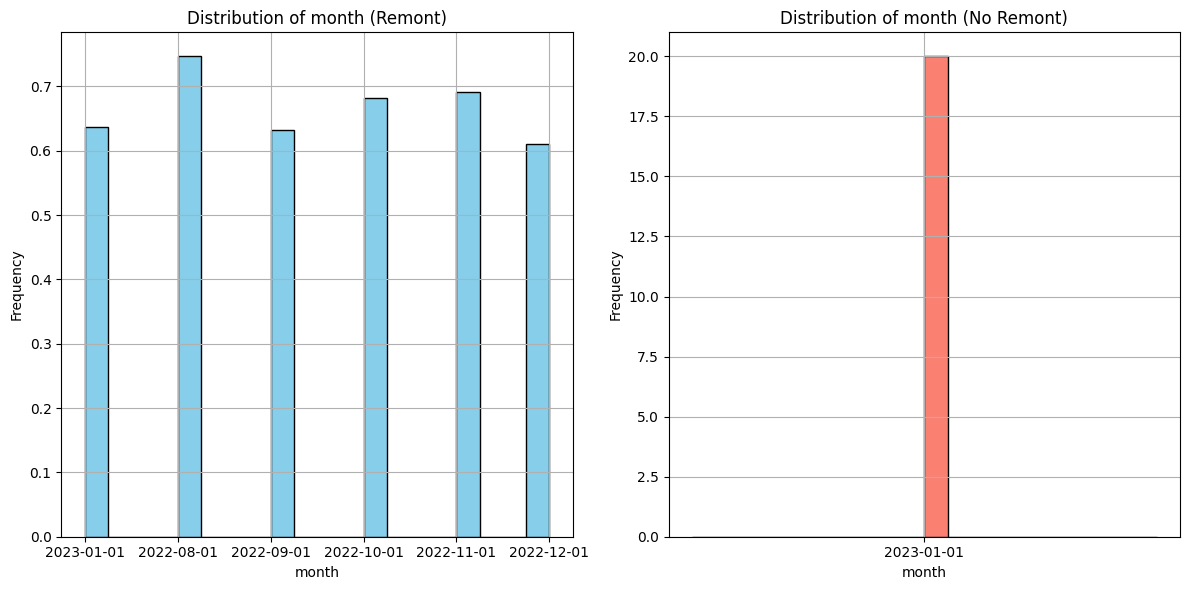

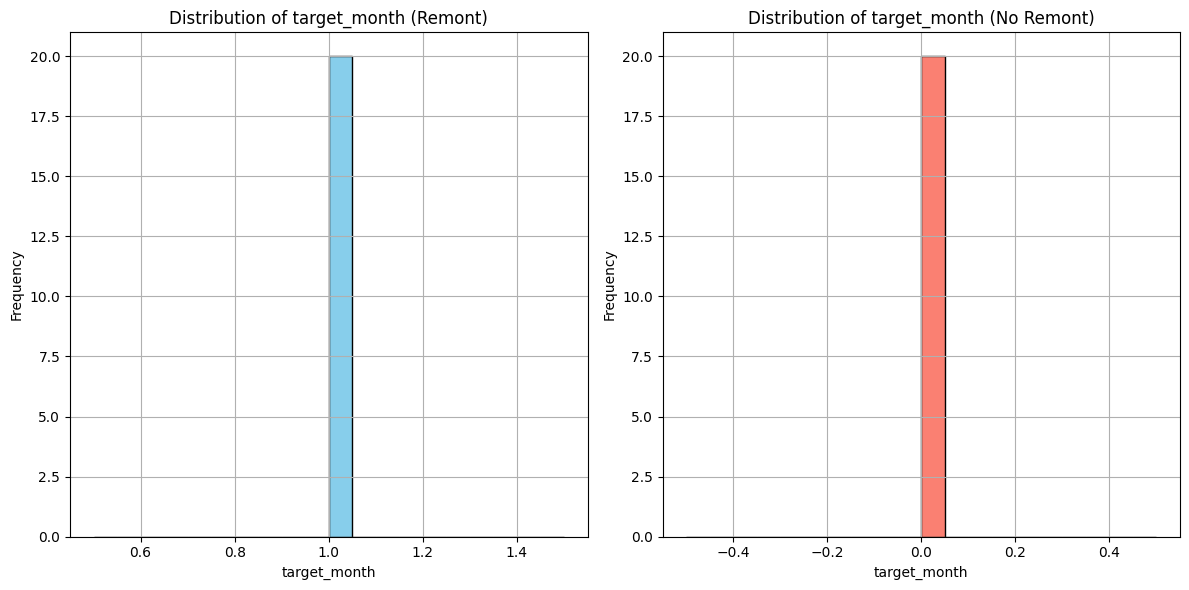

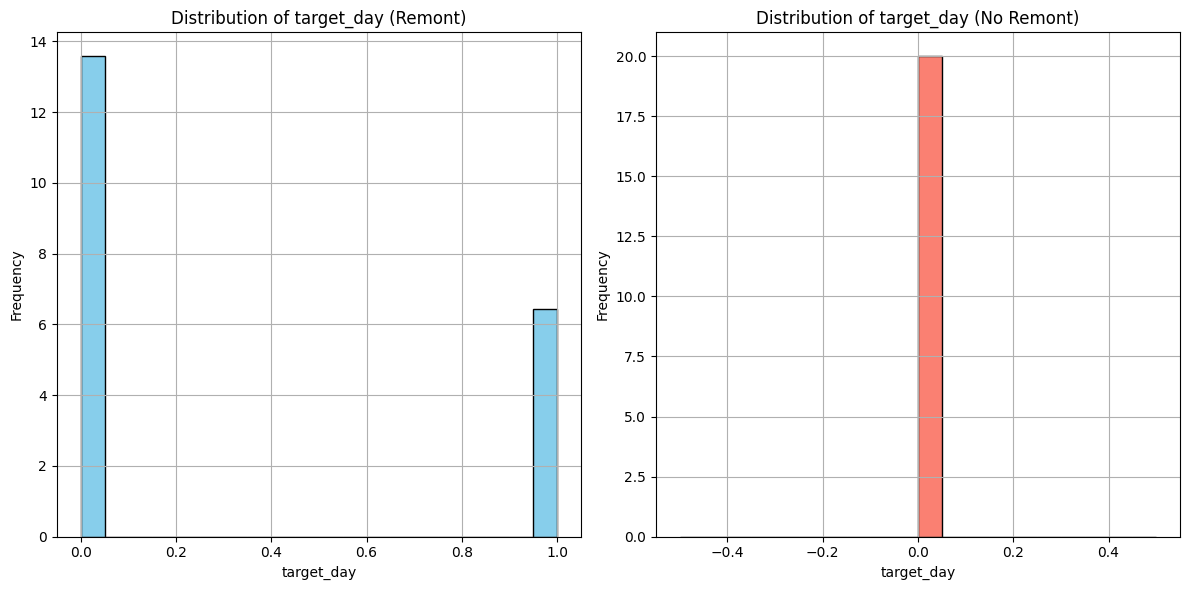

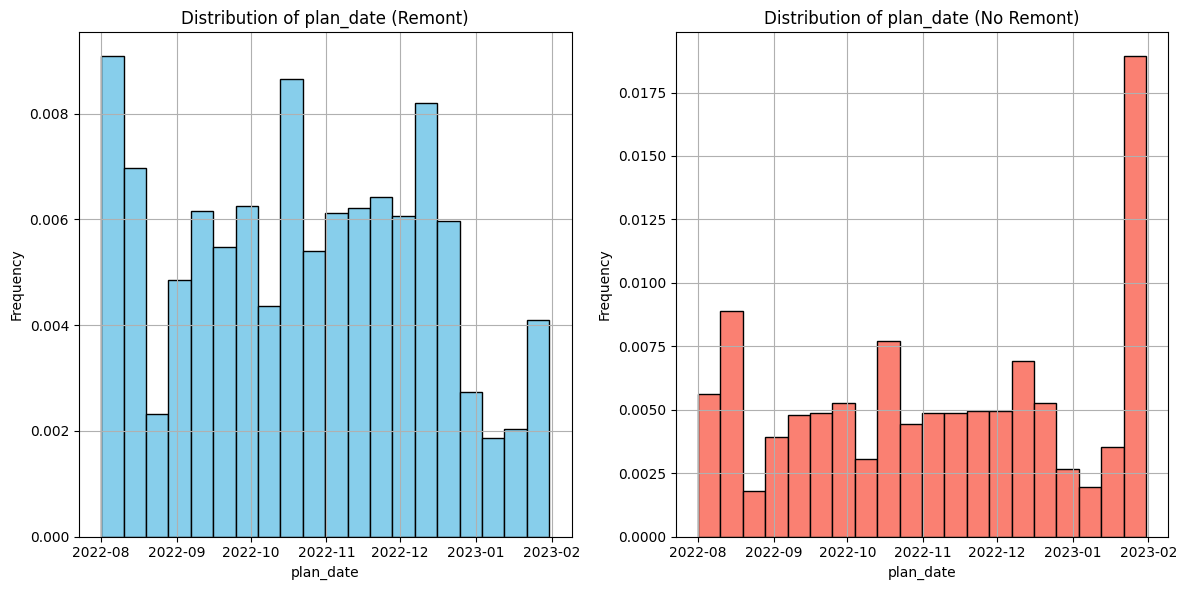

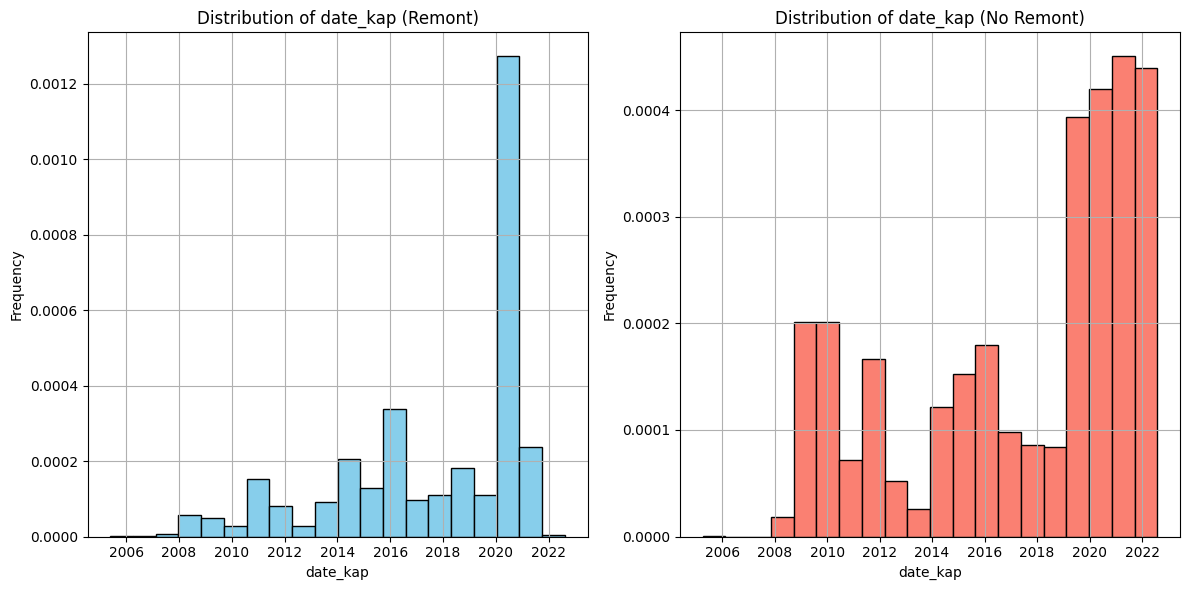

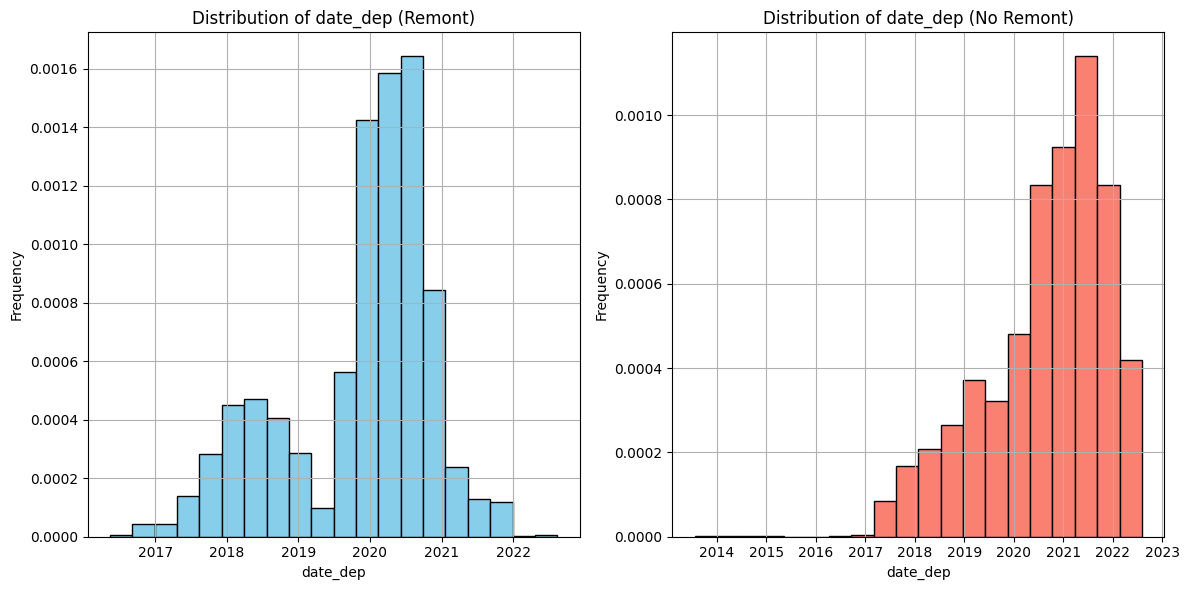

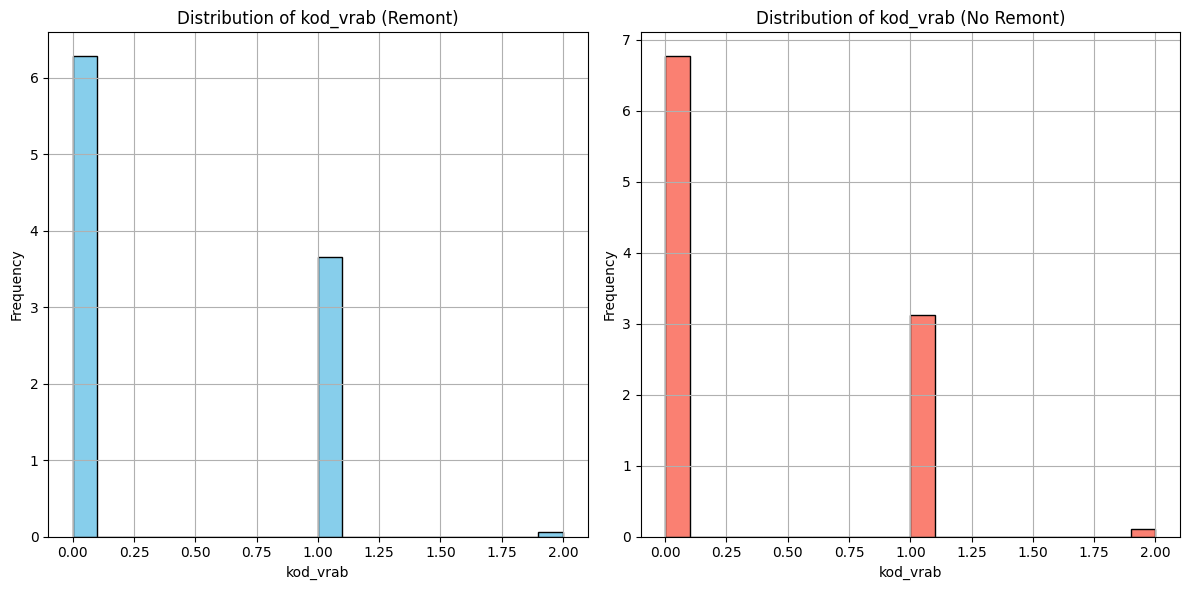

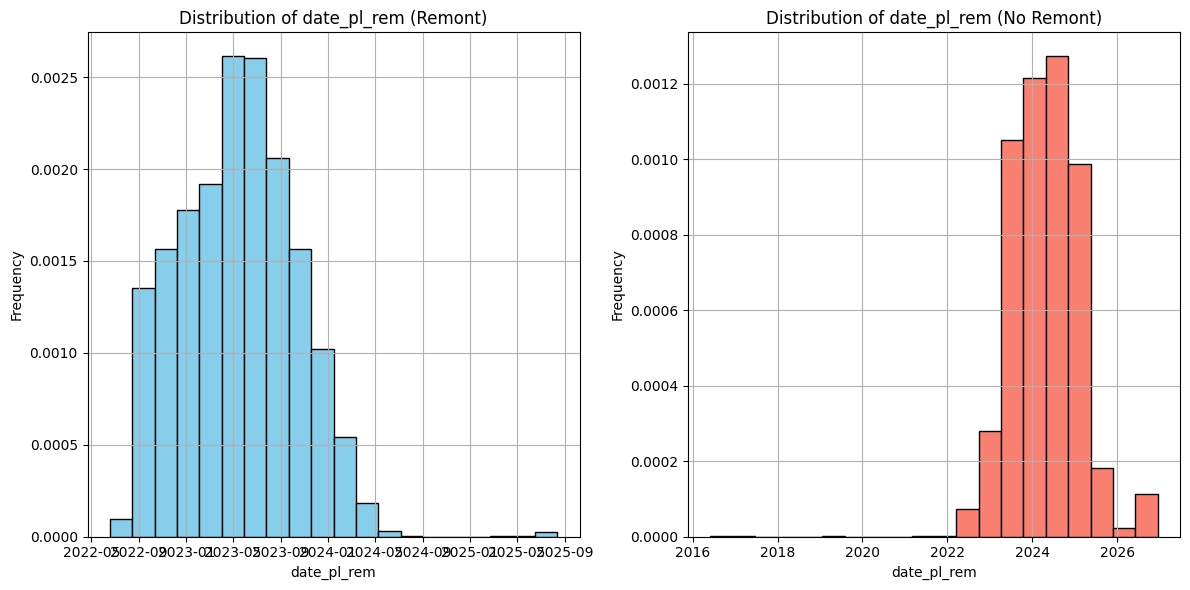

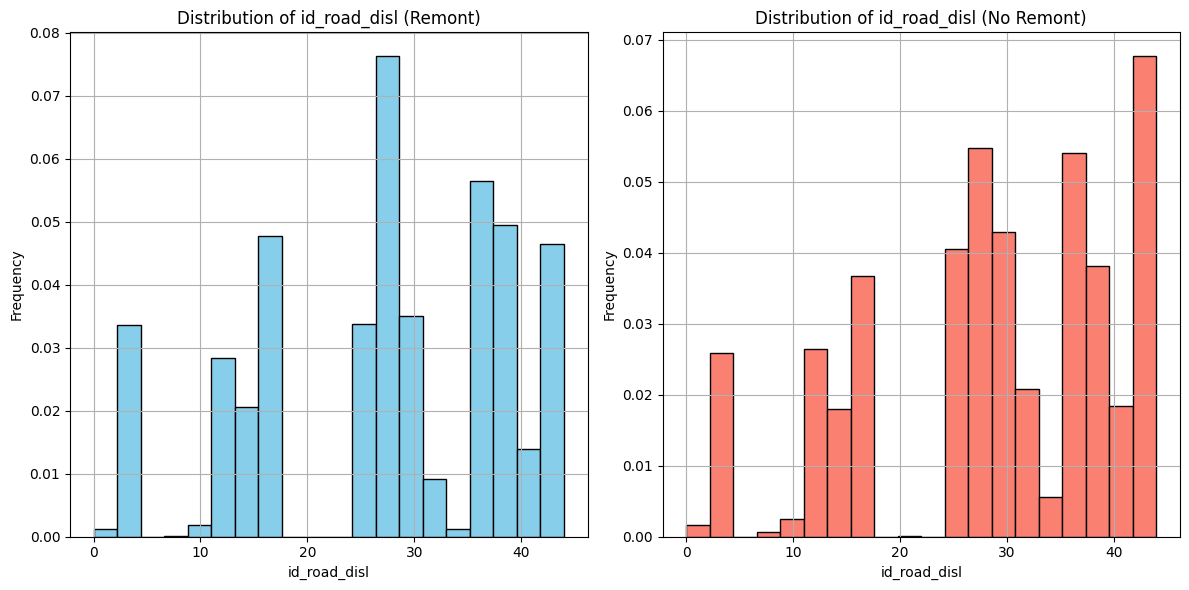

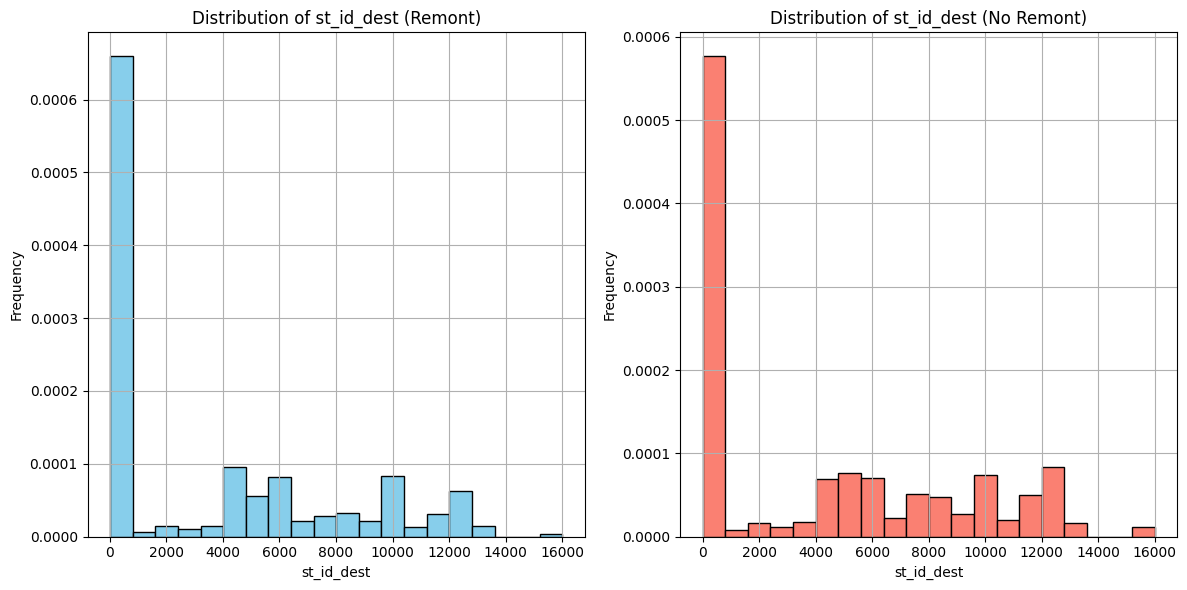

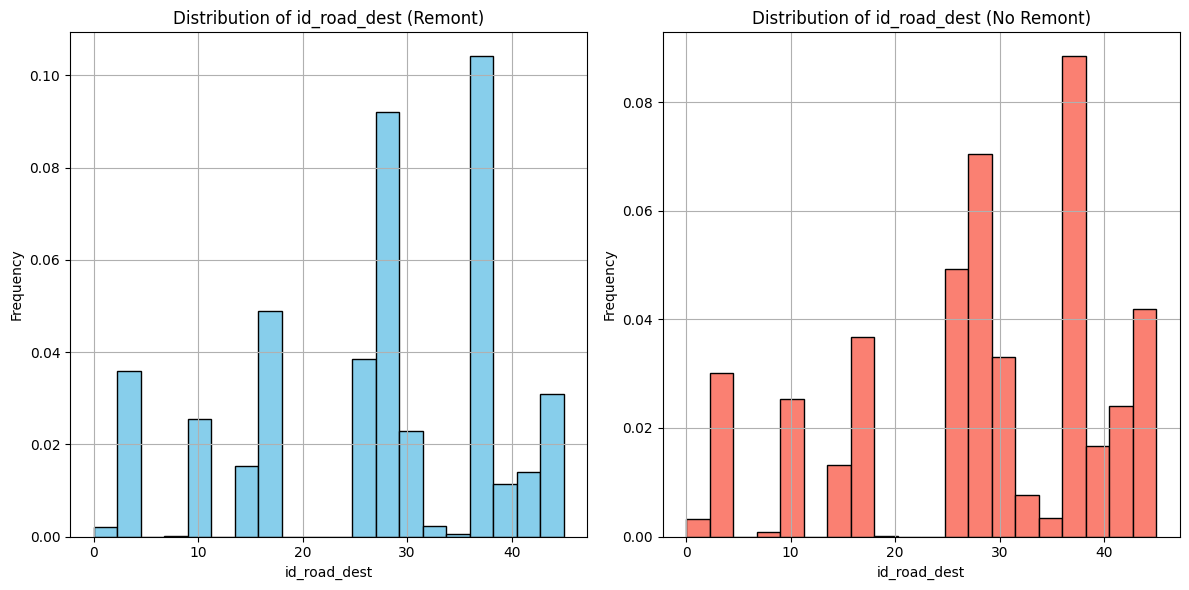

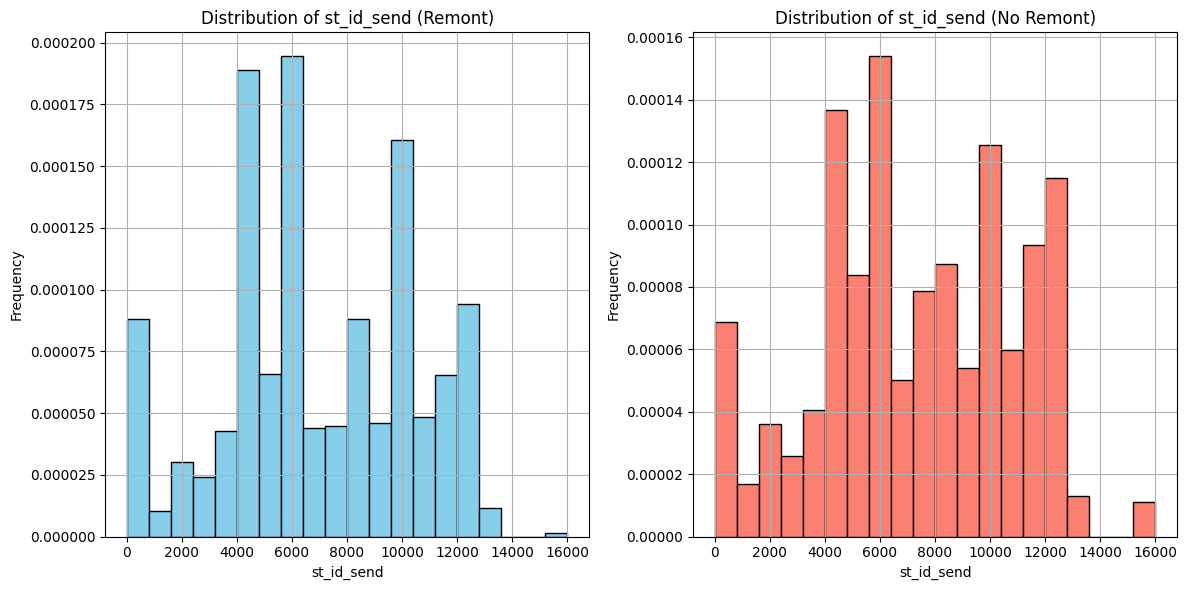

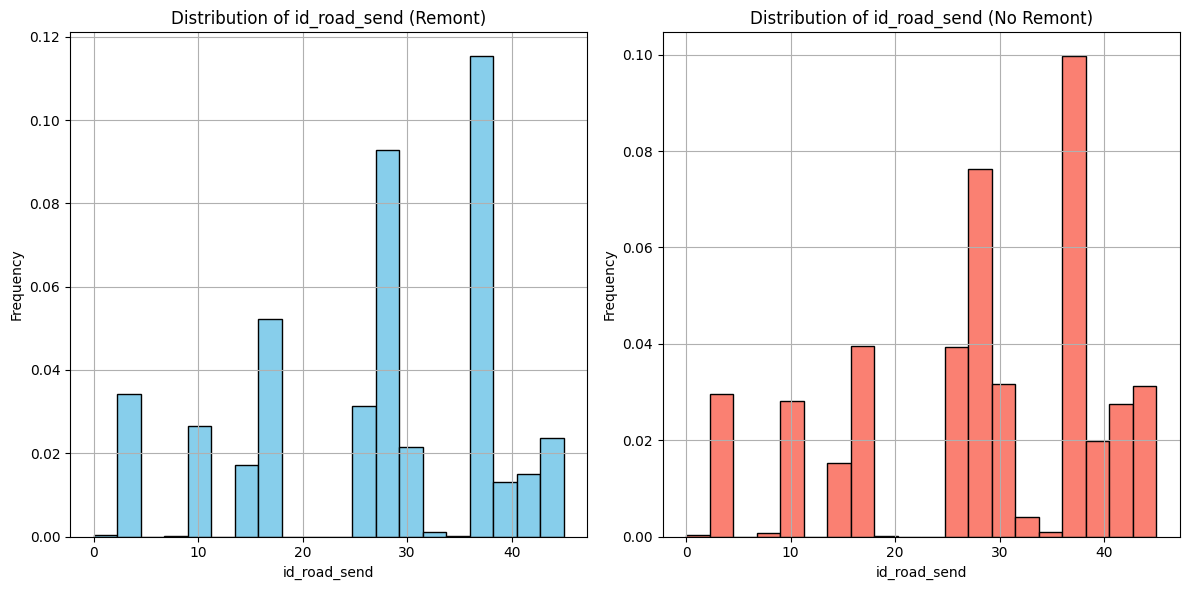

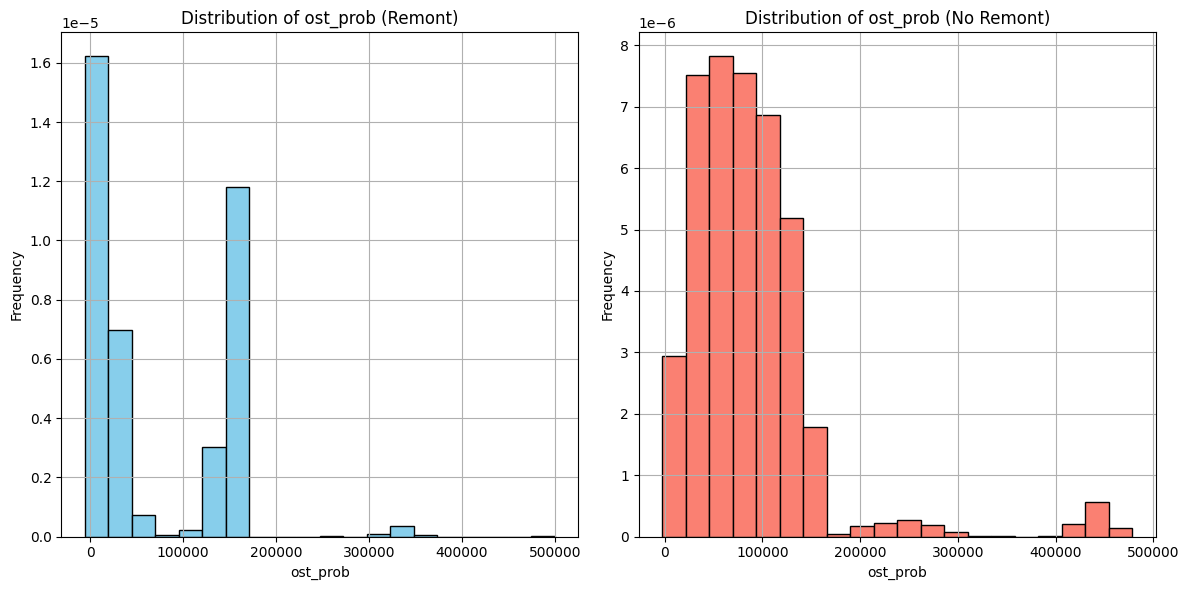

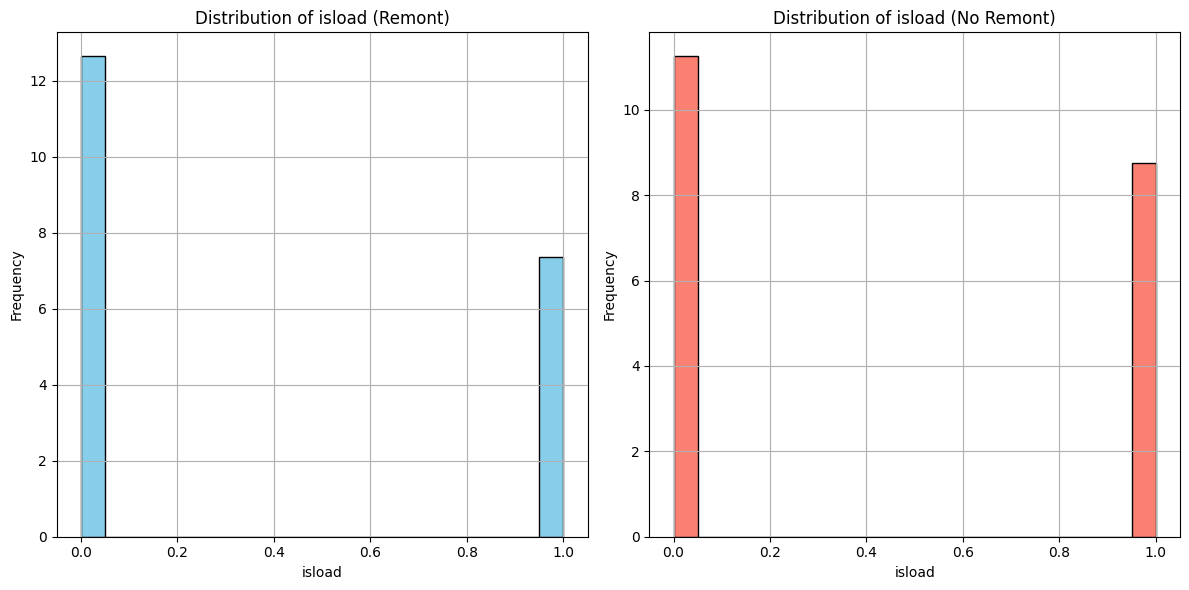

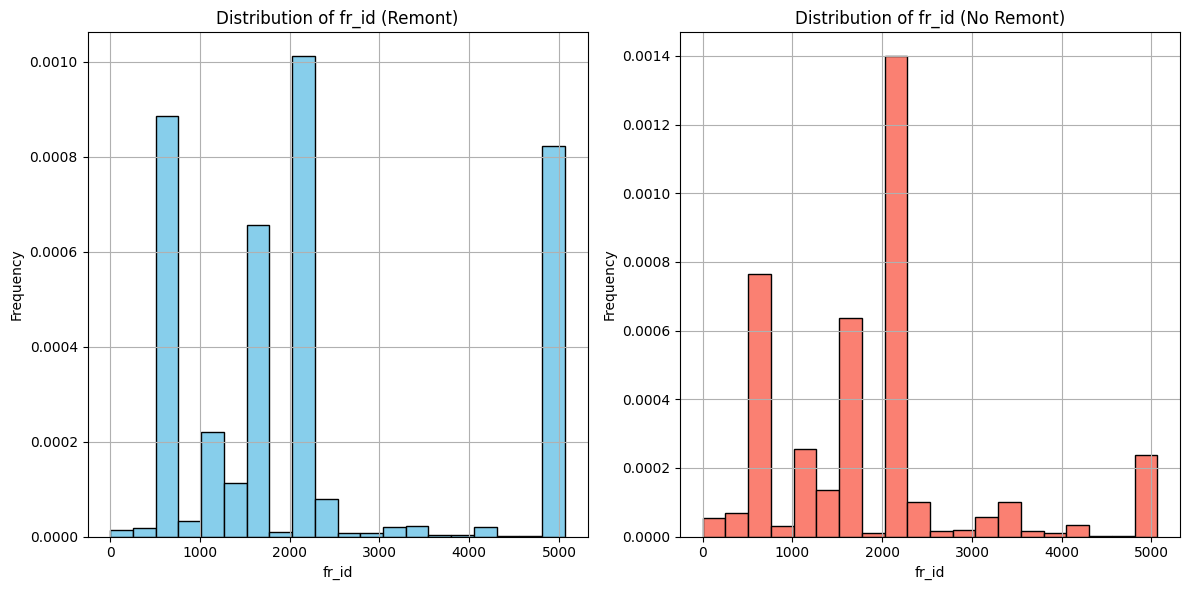

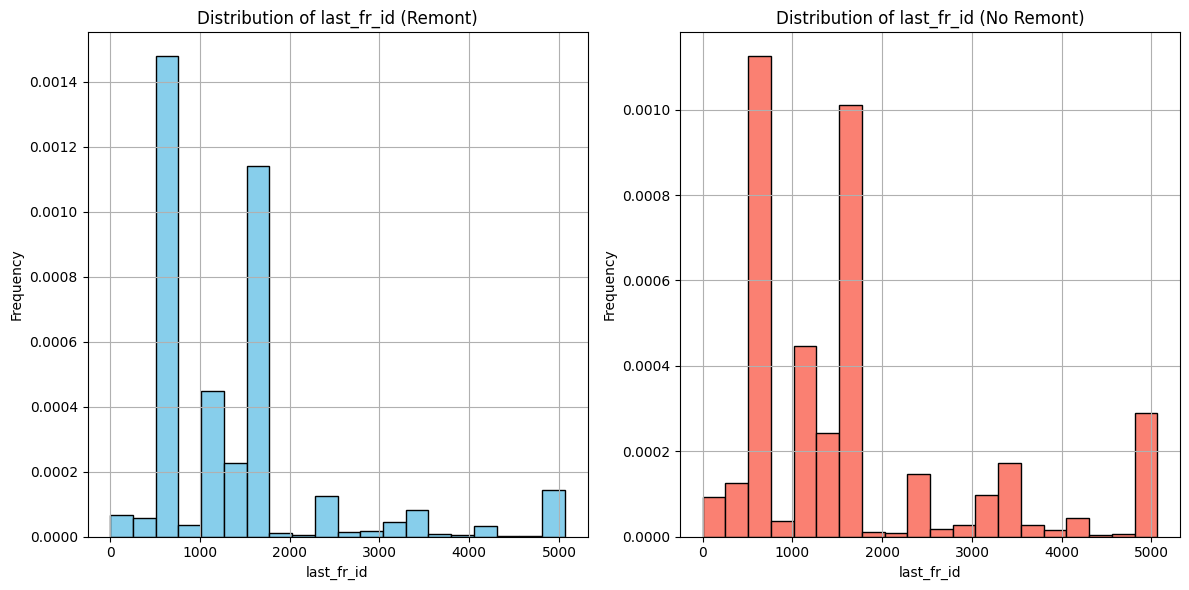

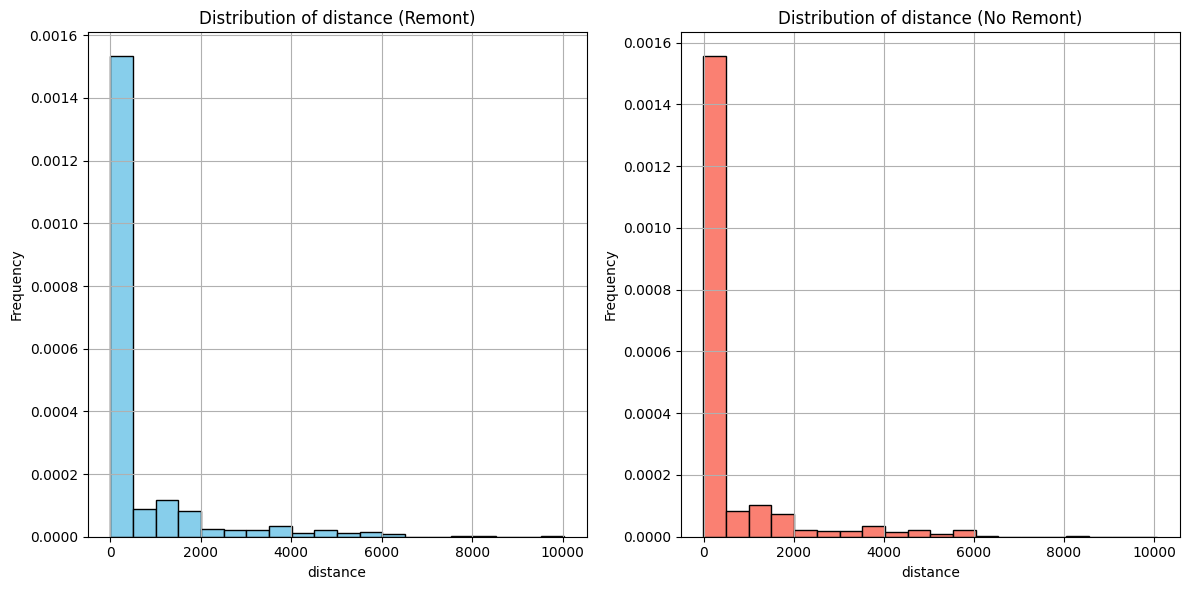

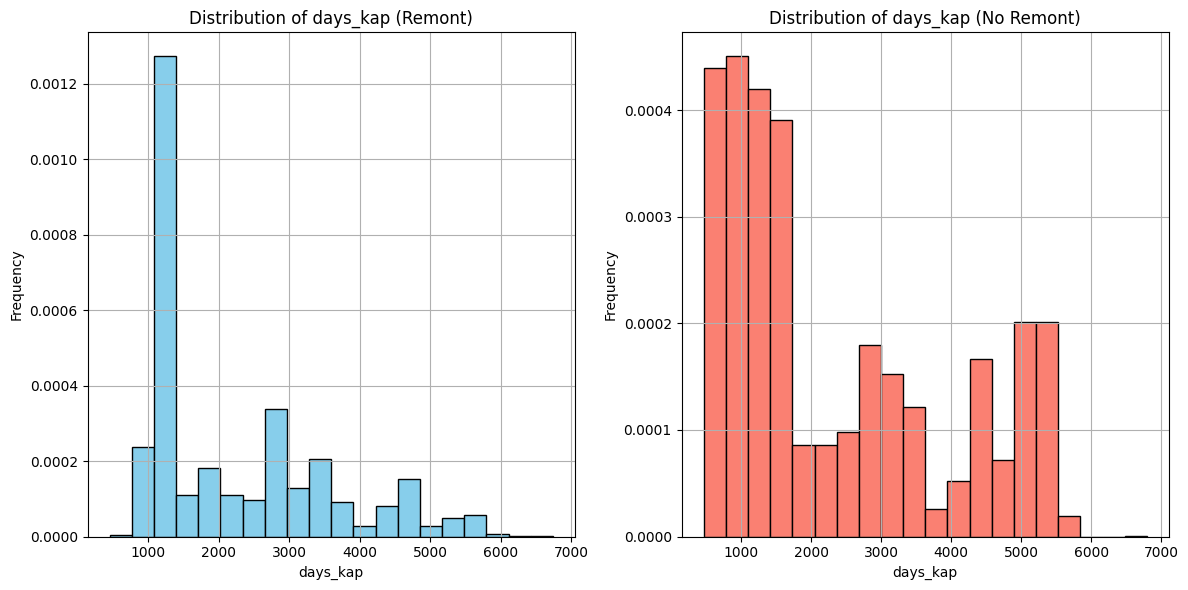

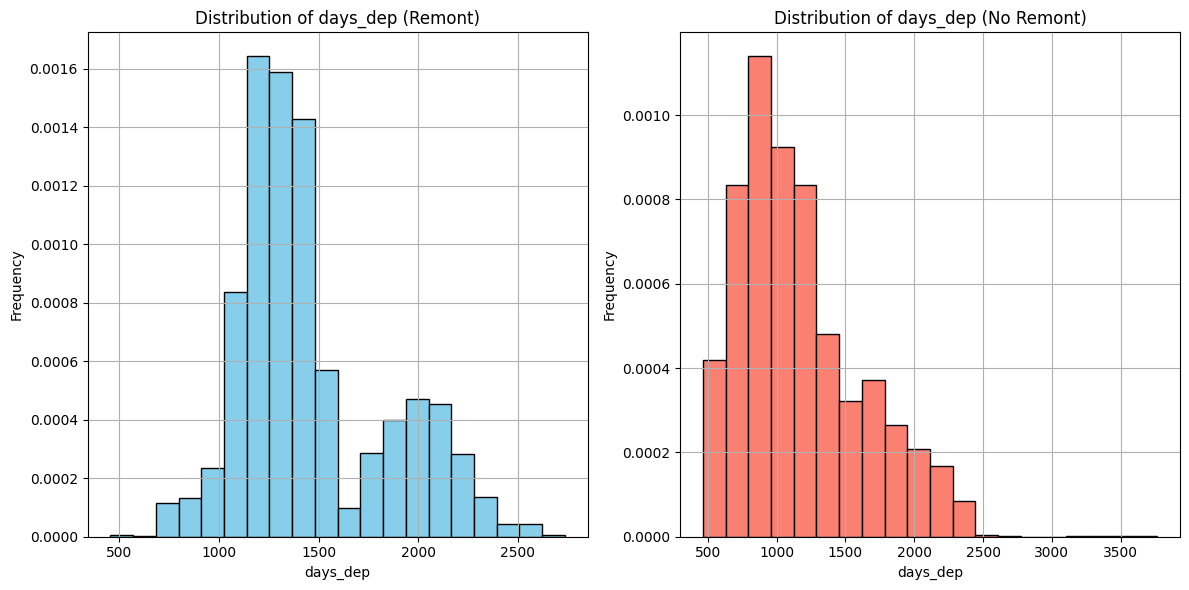

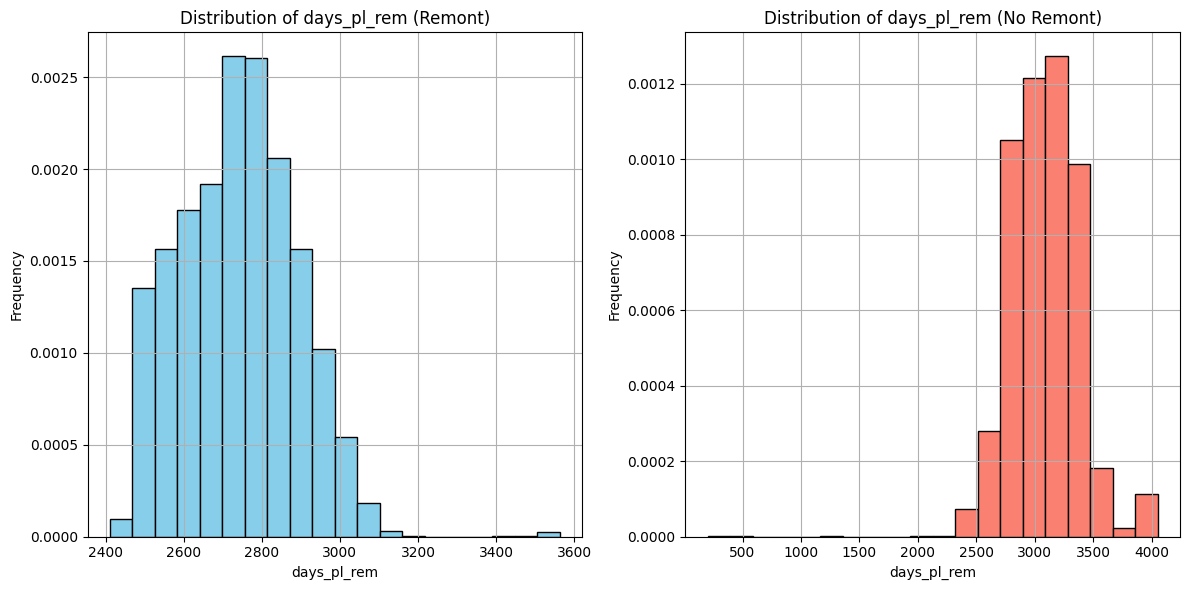

In [ ]:
# Построение распределений для каждого столбца в df_remont и df_ne_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Распределение для df_ne_remont
    plt.subplot(1, 2, 2)
    plt.hist(df_ne_remont[column].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (No Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

<ipython-input-191-8a24ece00a42>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


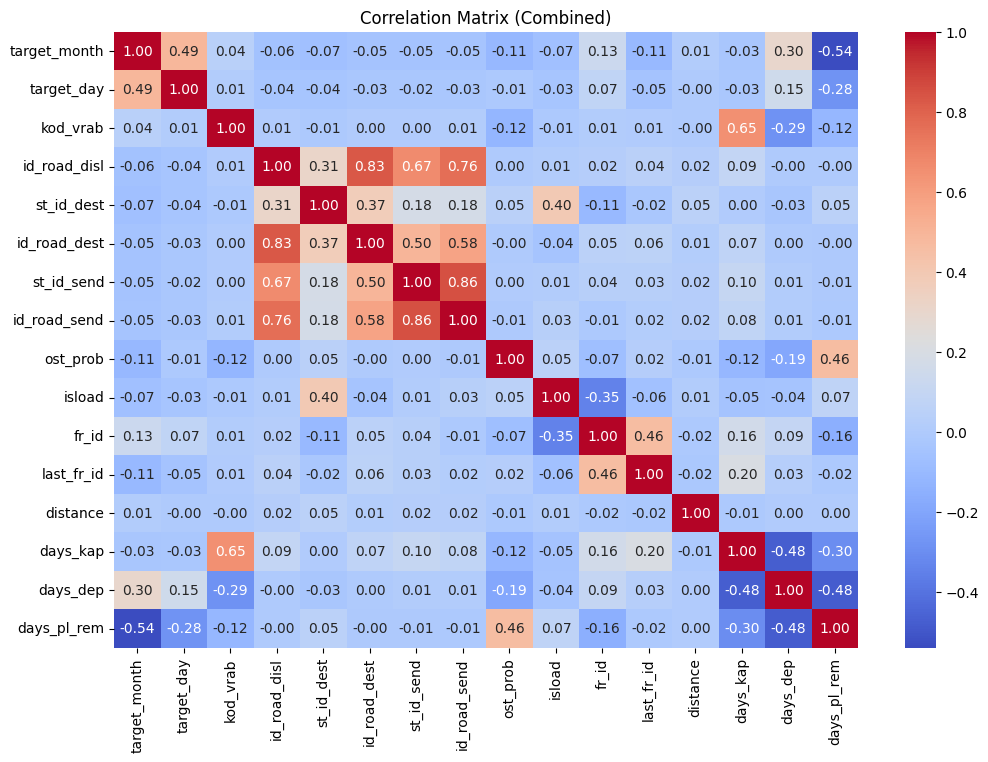

In [ ]:
# Объединение данных в один DataFrame
merged_df = pd.concat([df_remont, df_ne_remont])
merged_df = merged_df.drop(['wagnum'], axis = 1)
# Построение корреляционной матрицы
correlation_matrix = merged_df.corr()

# Построение тепловой карты для корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Combined)')
plt.show()

###**Вывод по корреляционной матрице.**

Учитываем все, кроме distance.

---

***Выявление взаимосвязей данных:*** Тип груза влияет не только на износ вагона, но и на маршрут, сроки транспортировки. Снижение скорости передвижения подвижного состава может препятствовать своевременному прибытию вагона на станцию ВПР и искажать данные об остаточном пробеге. Отклонение остаточного пробега от нормативных значений или его отрицательное значение может свидетельствовать нарушениях с точки зрения логистики, а не с точки зрения неисправности вагона. В данном случае стоит учесть КТИ и влияние других показателей в совокупности, чтобы избежать дополнительных издержек.

###2.4. Данные по текущим плановым ремонтам

In [ ]:
# данные по текущим ремонтам
pr_rem = pd.read_parquet(path_train + '/pr_rems.parquet').convert_dtypes()
pr_rem

wagnum  rem_month  rod_id      model  road_id_send  road_id_rem  \
0      15000 2022-08-05       1     12-132             3            3   
2      25485 2022-08-21       1  12-132-03            13           13   
3      25944 2022-08-09       1  12-132-03            13           13   
4      24080 2022-08-13       1  12-296-01            13           13   
5      28612 2022-08-09       1     12-132            13           13   
...      ...        ...     ...        ...           ...          ...   
1578   11193 2023-01-30       1     12-132            12           12   
509    24703 2023-01-24       1    12-9780             6            6   
511    26437 2023-01-29       1    12-9780             6            6   
711    29345 2023-01-15       1     12-132            13           13   
1515   15740 2023-01-07       1     12-132            23           12   

      kod_vrab  st_id_send  st_id_rem  distance  month  
0            0         493        493        37      8  
2            0        6152       4793       360      8  
3            1        6152       4793       322      8  
4            0        6152       4793       308      8  
5            0        6152       4793       373      8  
...        ...         ...        ...       ...    ...  
1578         0       12607      12607       885      1  
509          1        4025       4025       890      1  
511          1        4025       4025       892      1  
711          1        6152       5960       397      1  
1515         0       12610      11915      4101      1  

[10441 rows x 11 columns]

In [ ]:
df_remont = pd.merge(y_train_remont, pr_rem, on='wagnum')
df_ne_remont = pd.merge(y_train_ne_remont, pr_rem, on='wagnum')
df_ne_remont.shape
df_remont.shape

(10441, 14)

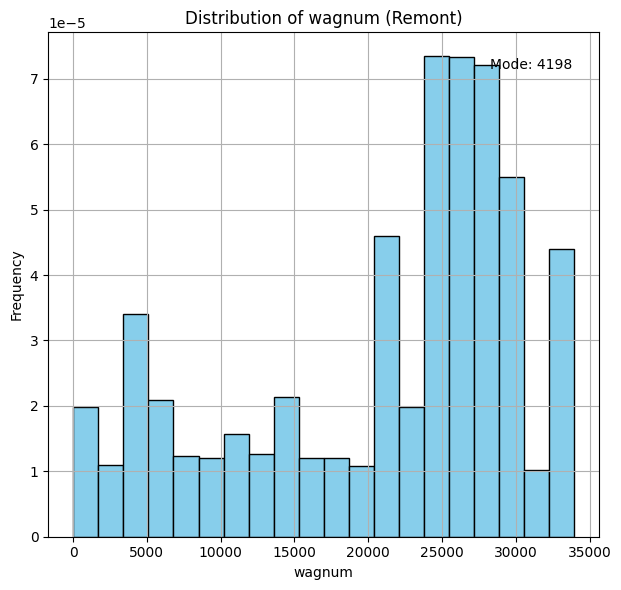

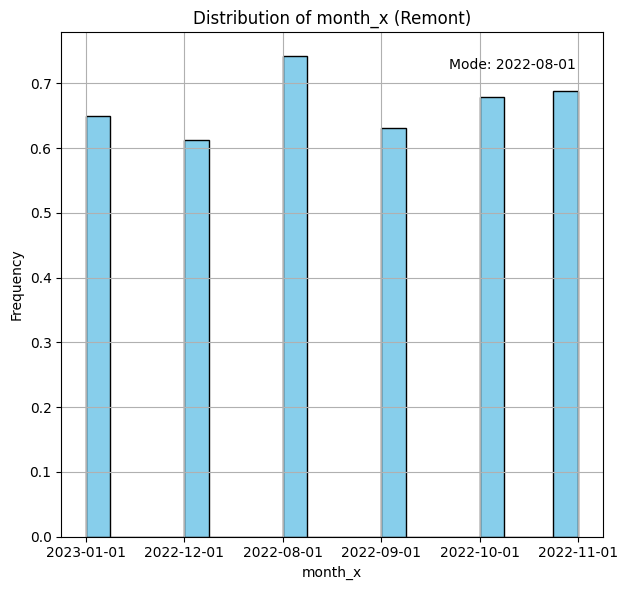

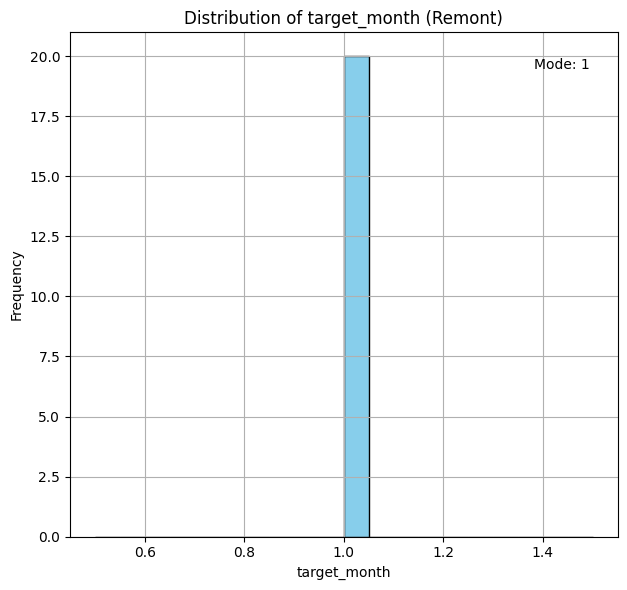

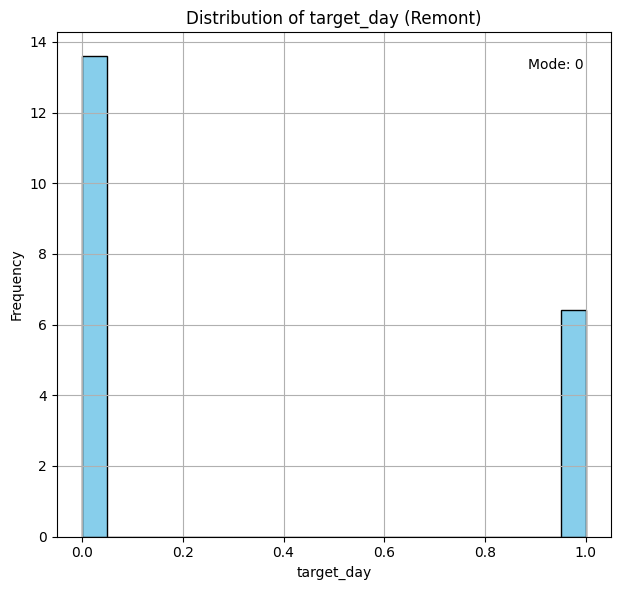

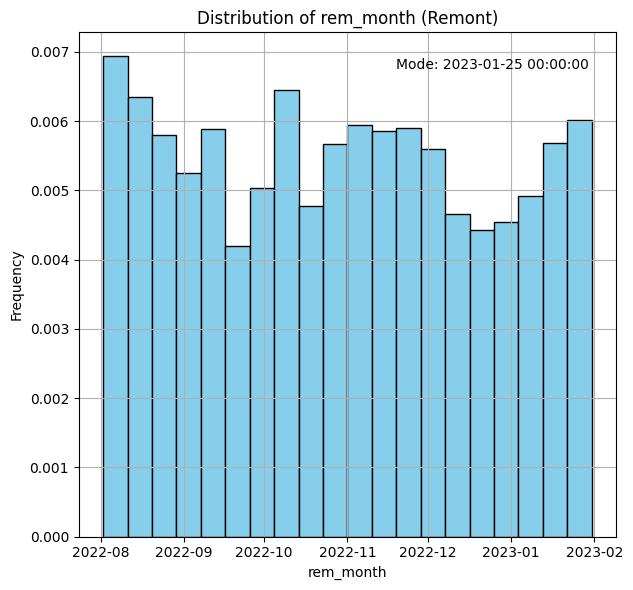

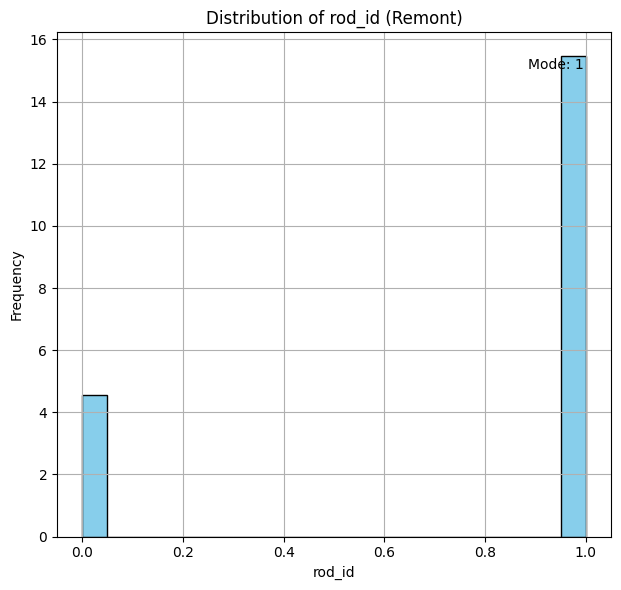

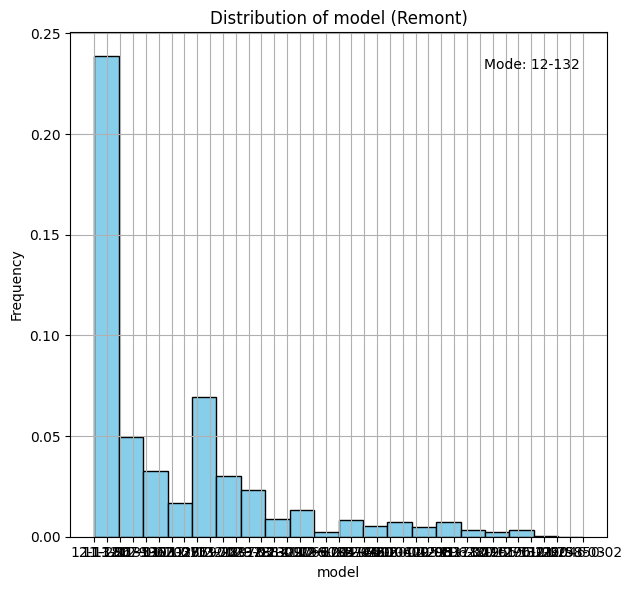

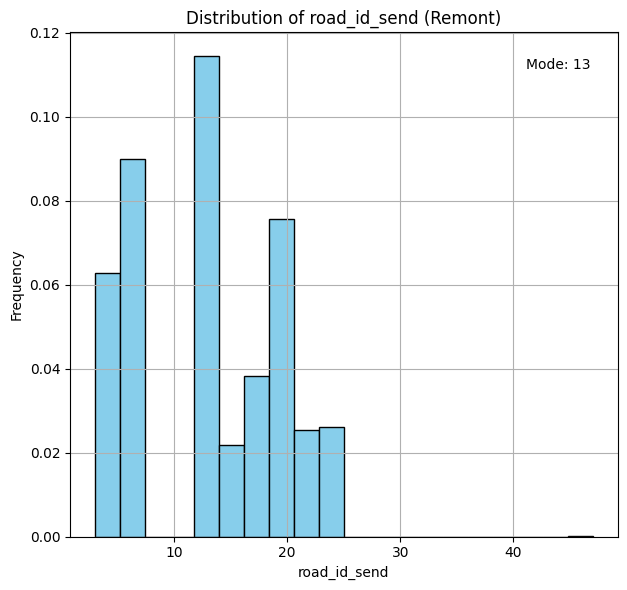

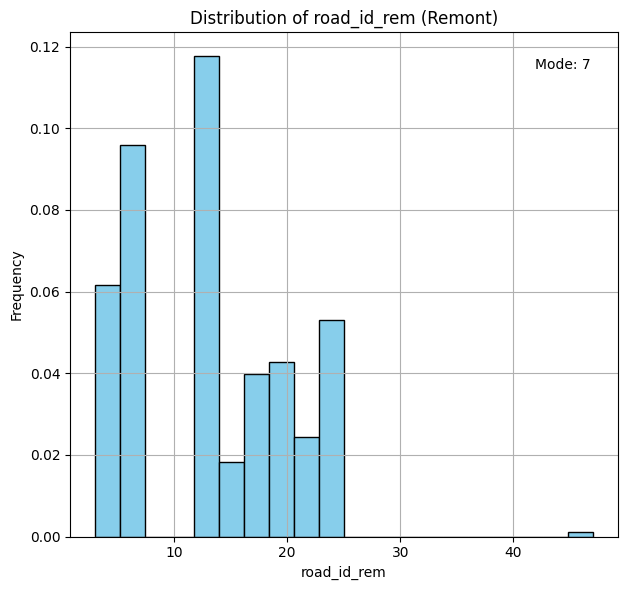

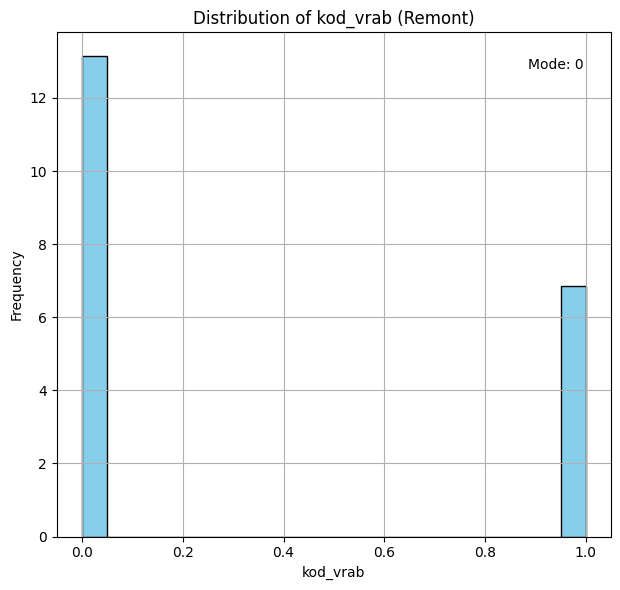

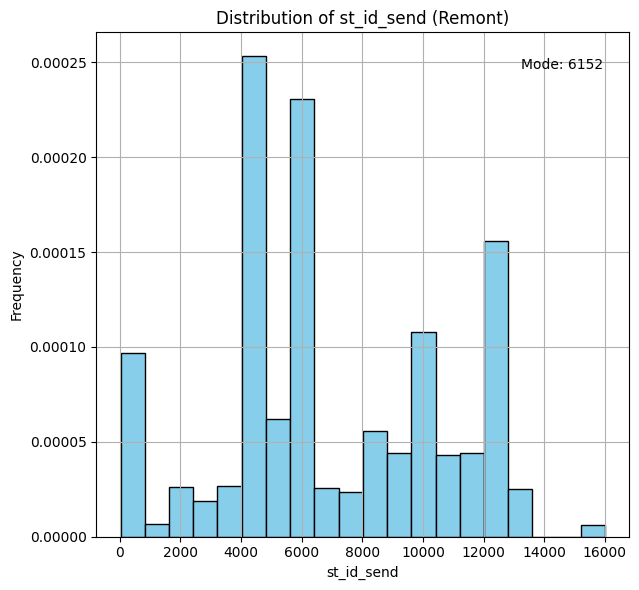

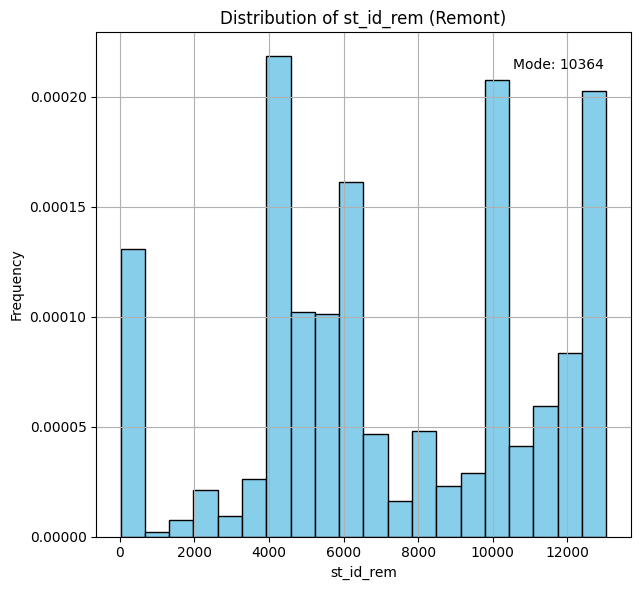

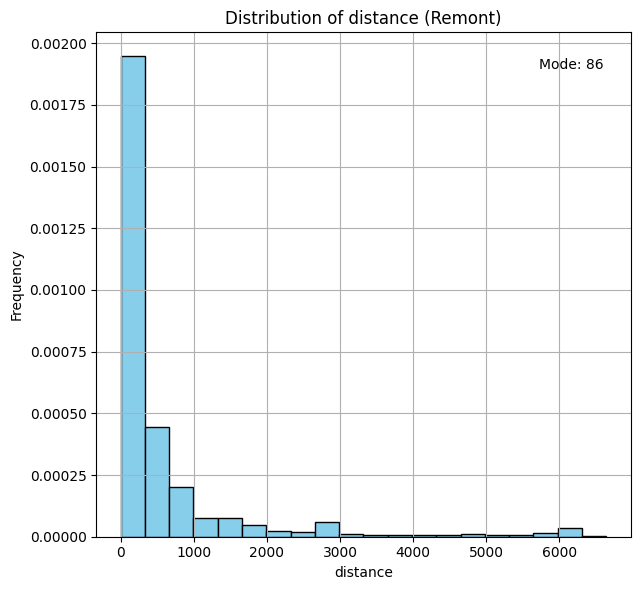

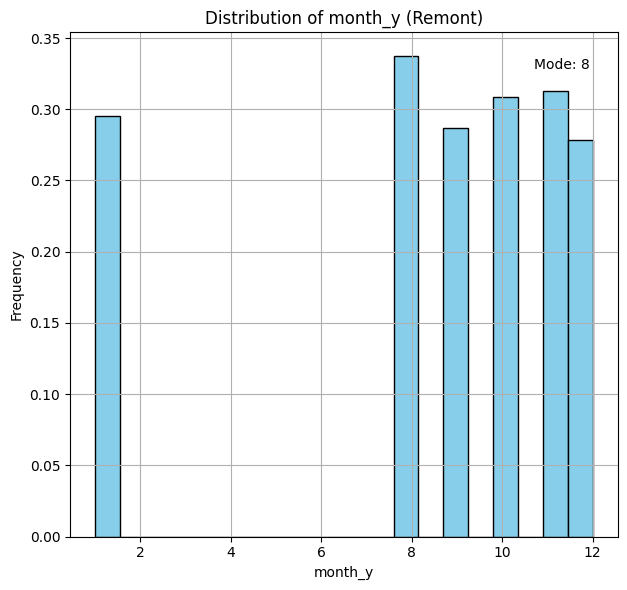

In [ ]:
# Построение распределений и вывод моды для каждого столбца в df_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Вывод моды
    mode_value = df_remont[column].mode().iloc[0]
    plt.text(0.95, 0.95, f'Mode: {mode_value}', ha='right', va='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

###**Вывод**

Чаще всего в текущий плановый ремонт был отправлен вагон №4198. Типом ремонтируемого РПС является полувагон модели 12-132, предназначенный для перевозки массовых неагрессивных насыпных непылевидных, навалочных, штабельных и штучных грузов, не требующих защиты от атмосферных осадков при общесетевом использовании на железных дорогах РФ. Наиболее влиятельным является нулевой (0) тип неисправности. Расстояние от станции до ВРП 86. Наиболее загруженные ремонтными работами времена года - осенне-зимний период.

###2.5. Данные по текущим внеплановым ремонтам

In [ ]:
# данные по текущим ремонтам
tr_rem = pd.read_parquet(path_train + '/tr_rems.parquet').convert_dtypes()
tr_rem

wagnum  rem_month  kod_vrab  neis1_kod  neis2_kod  neis3_kod  mod1_kod  \
0      29938 2022-08-01         3          0         98         54         7   
1      29938 2022-08-01         3         14         98         54         7   
2      29852 2022-08-01         2          0         98         54         7   
3      29852 2022-08-01         2         36         98         54         7   
4      13674 2022-08-01         2         95         98         54         7   
...      ...        ...       ...        ...        ...        ...       ...   
7695   31868 2023-01-01         3         14         98         54         7   
7696   22921 2023-01-01         5          0         98         54         7   
7697   22921 2023-01-01         3         34         95         54         7   
7698    4978 2023-01-01         3        131         68         54         7   
7699   16226 2023-01-01         3          6         98         54         7   

      mod2_kod  mod3_kod  mod4_kod  mod5_kod  mod6_kod  mod7_kod  \
0            4         2         0         0         0         0   
1            4         2         0         0         0         0   
2            4         2         0         0         0         0   
3            4         2         0         0         0         0   
4            4         2         0         0         0         0   
...        ...       ...       ...       ...       ...       ...   
7695         4         2         0         0         0         0   
7696         4         2         0         0         0         0   
7697         4         2         0         0         0         0   
7698         4         2         0         0         0         0   
7699         4         2         0         0         0         0   

      road_id_send  gr_probeg  por_probeg  st_id_send  
0               38      87913       37467       10522  
1               38      87913       37467       10441  
2               28      81824       45579        4789  
3               28      81824       45579        4789  
4               28      64130       34697        4789  
...            ...        ...         ...         ...  
7695            42      88690       60006       11552  
7696            28      93198       53596        6168  
7697            28      93198       53596        6168  
7698             3      72453       38209         262  
7699            43      71577       20493       11915  

[48652 rows x 17 columns]

In [ ]:
df_remont = pd.merge(y_train_remont, tr_rem, on='wagnum')
print(f'размерность в ремонте: {df_remont.shape}')

размерность в ремонте: (13095, 20)


In [ ]:
# Подсчет количества уникальных значений в столбце 'wagnum'
unique_wagnum_count = df_ne_remont['wagnum'].nunique()
print(unique_wagnum_count)

12972


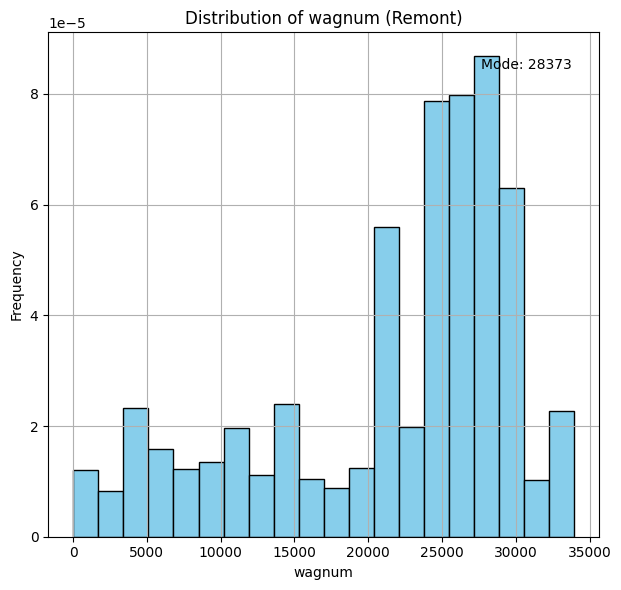

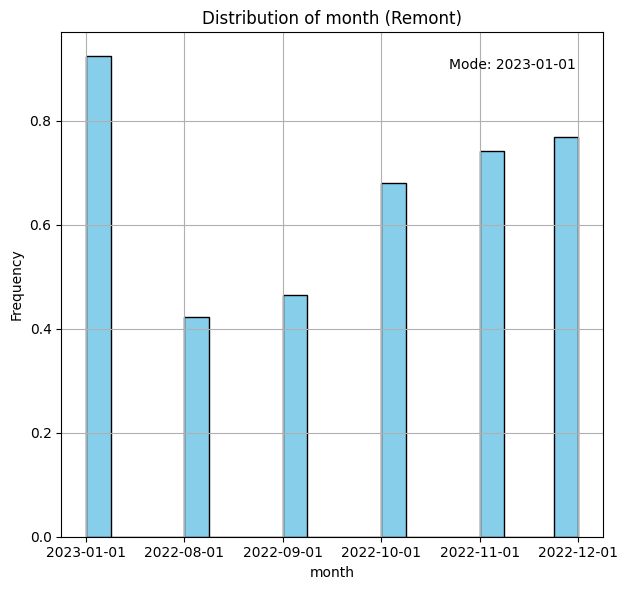

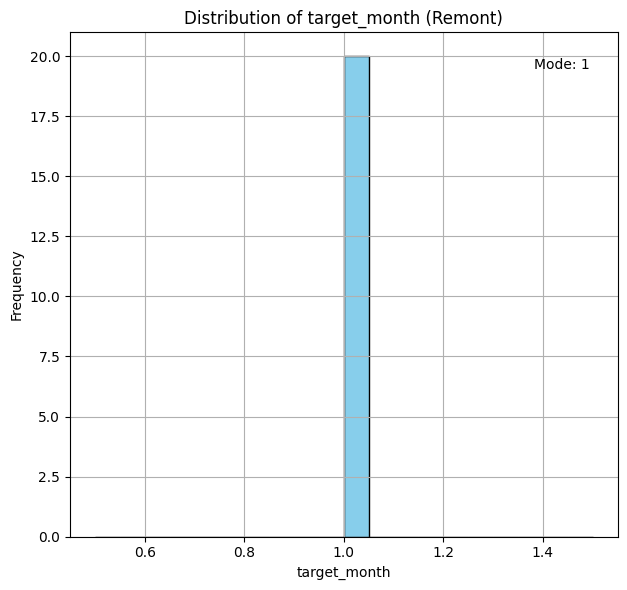

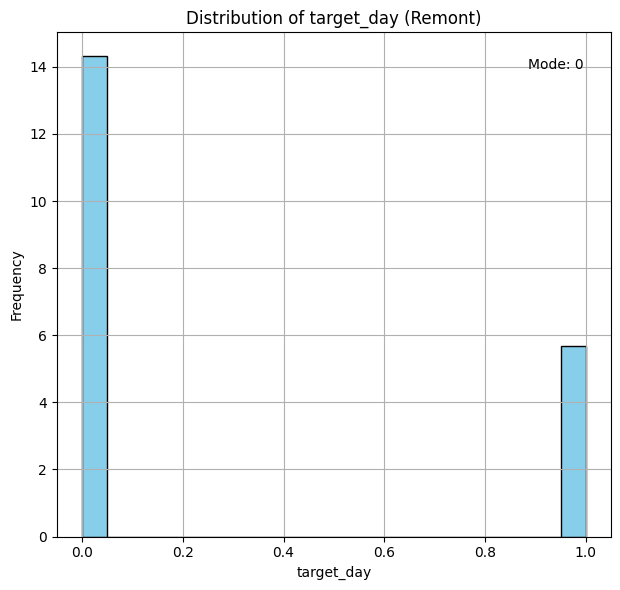

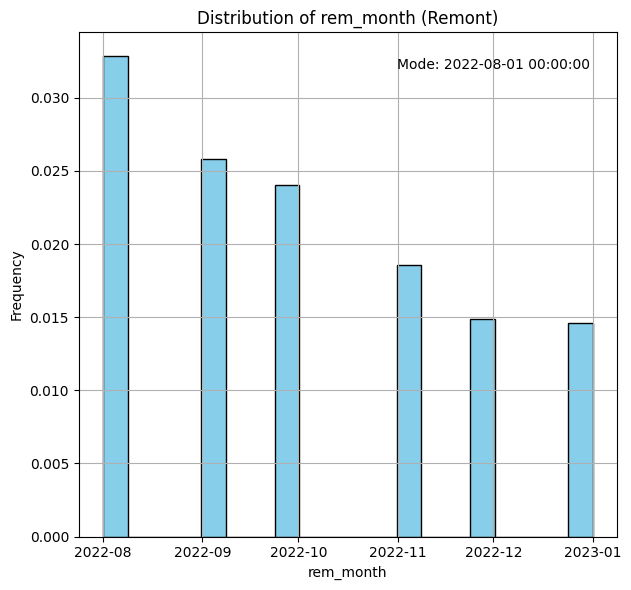

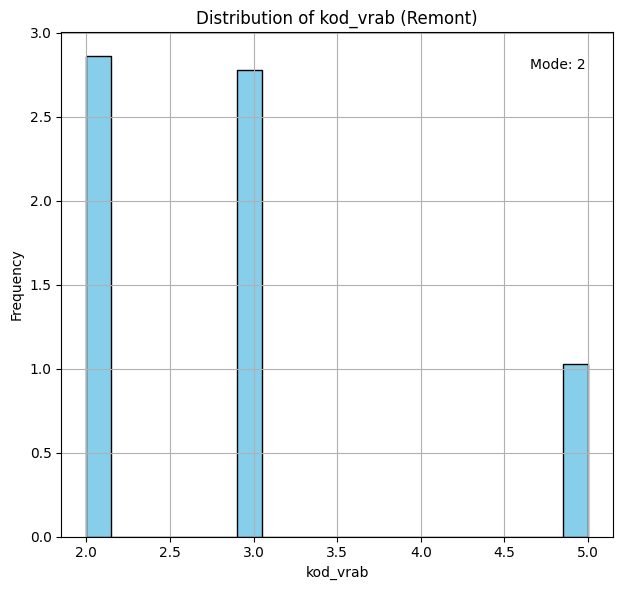

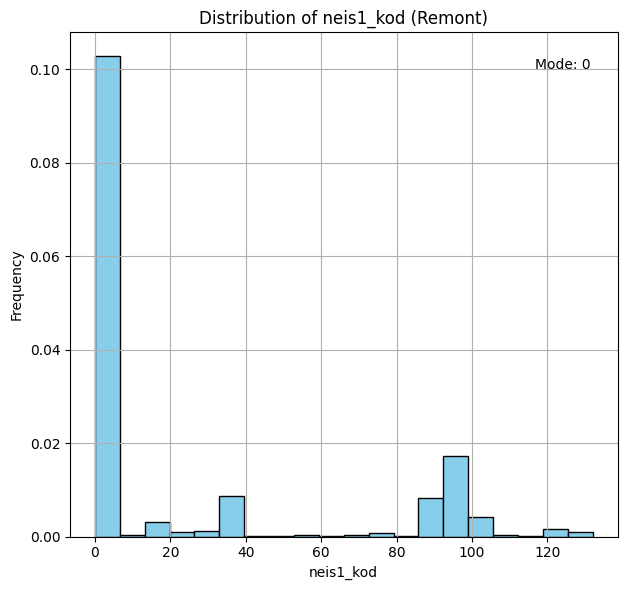

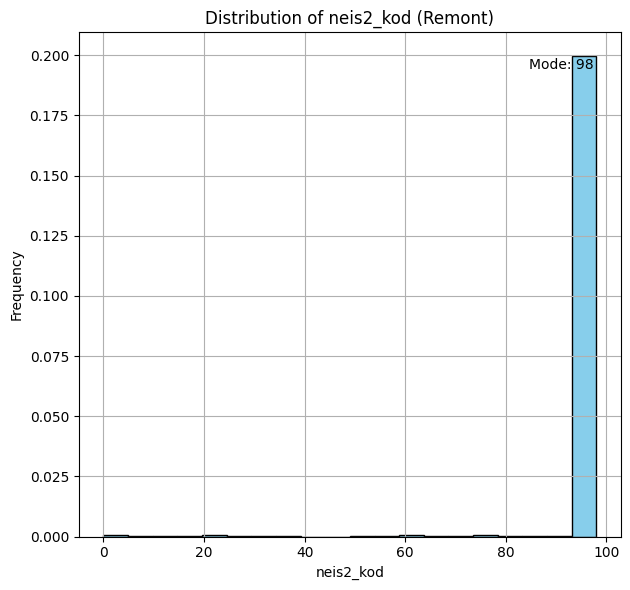

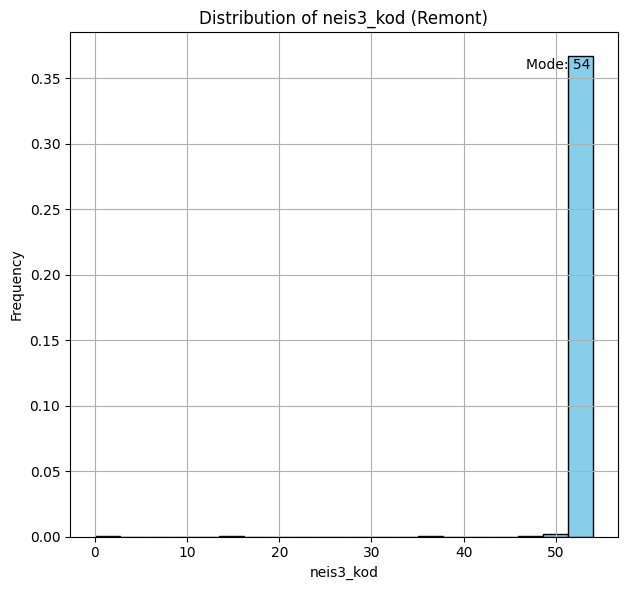

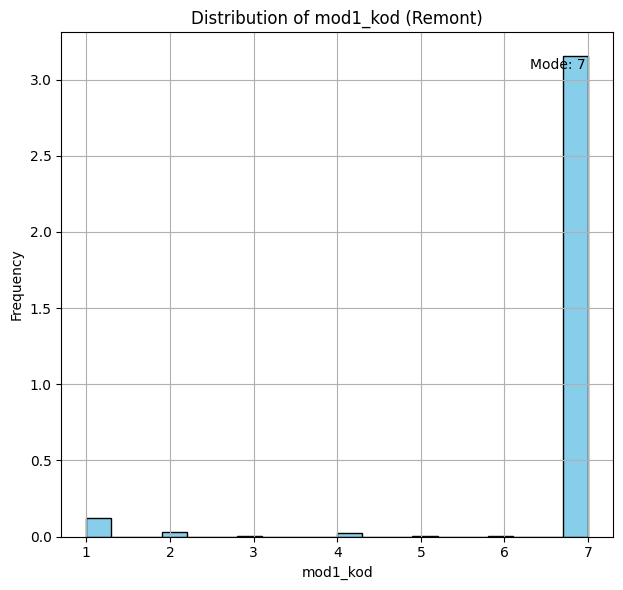

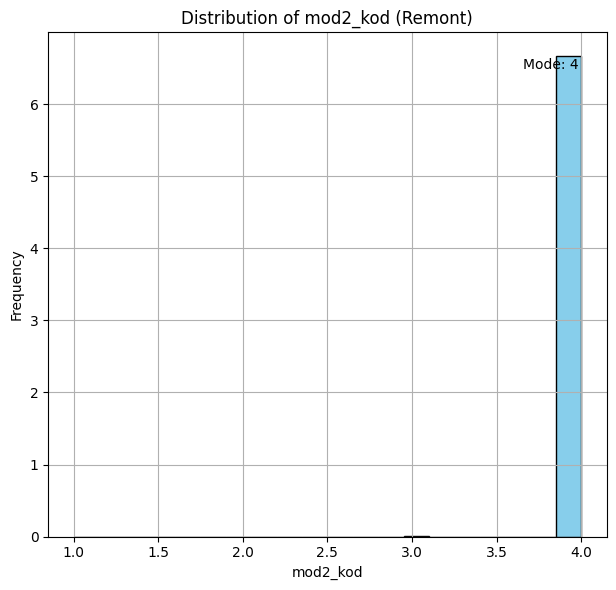

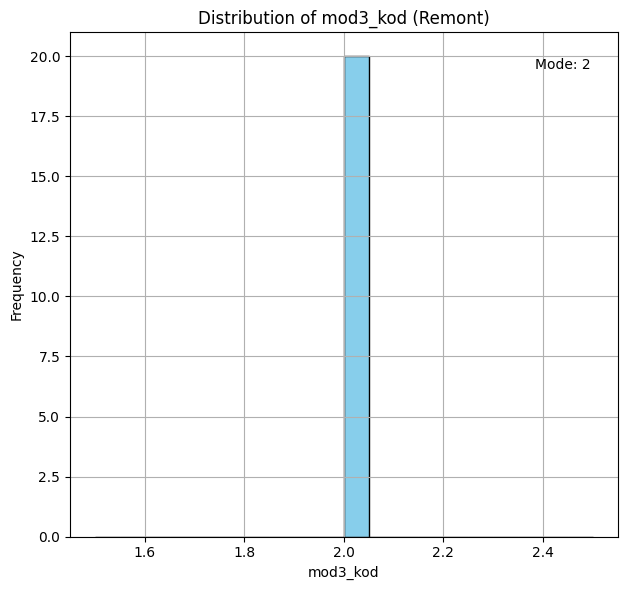

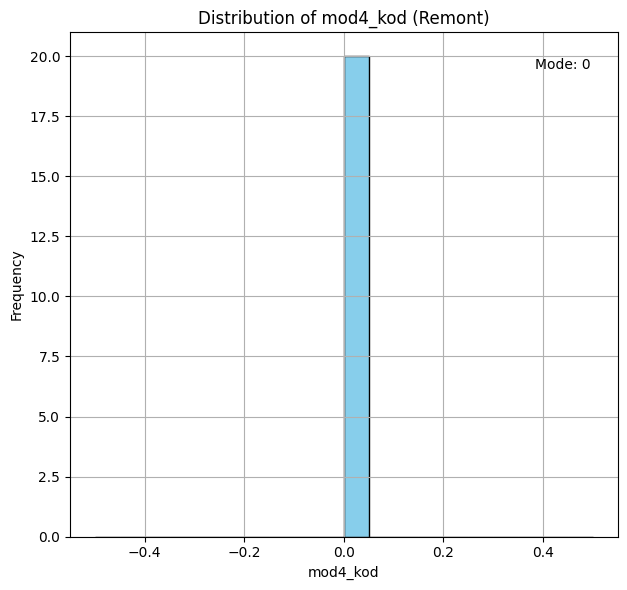

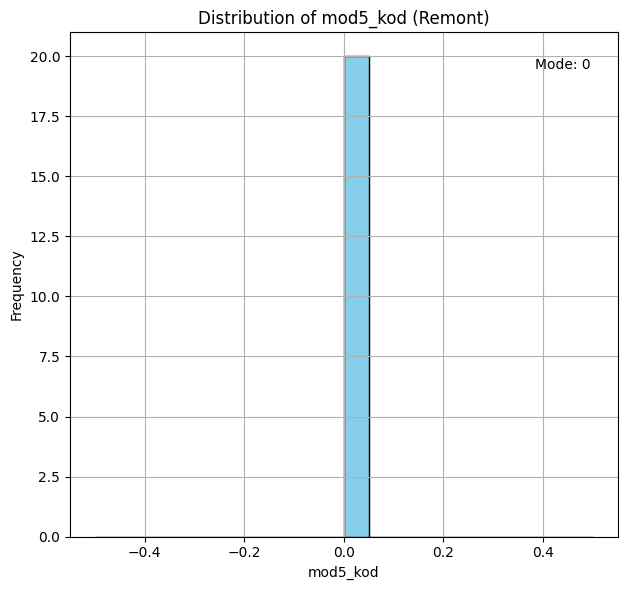

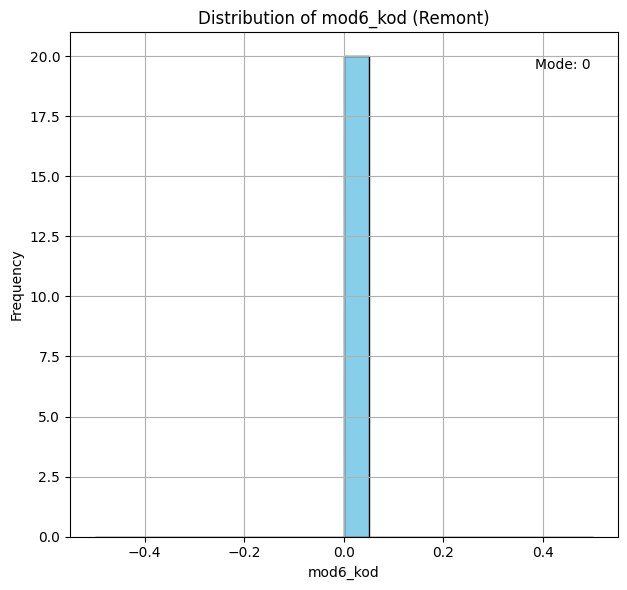

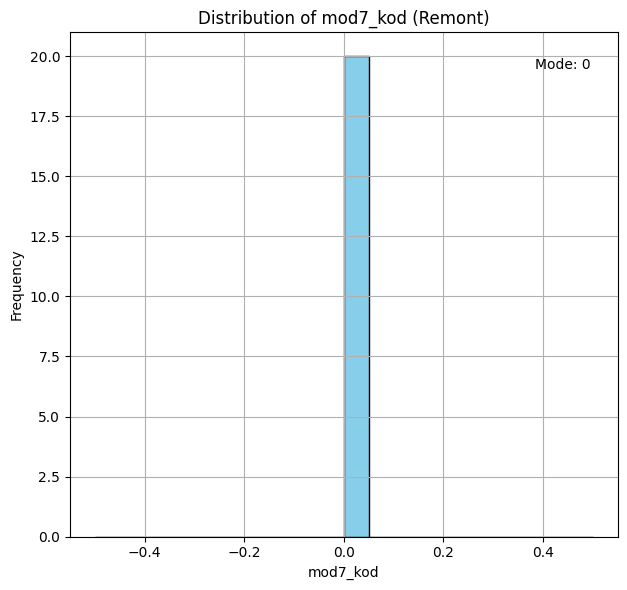

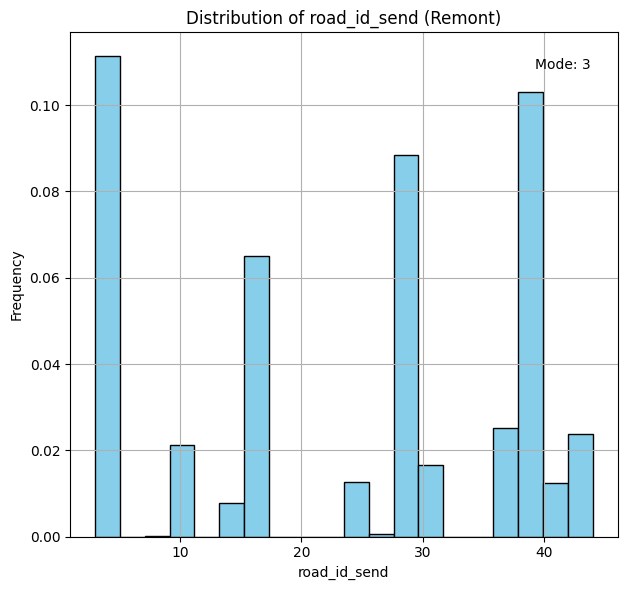

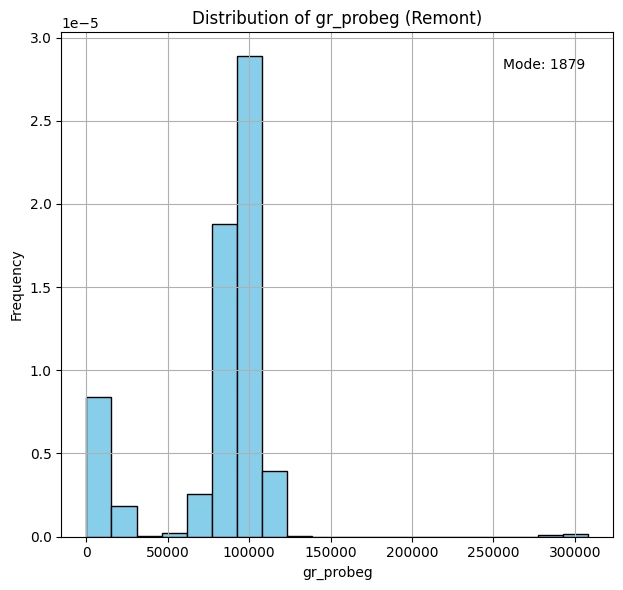

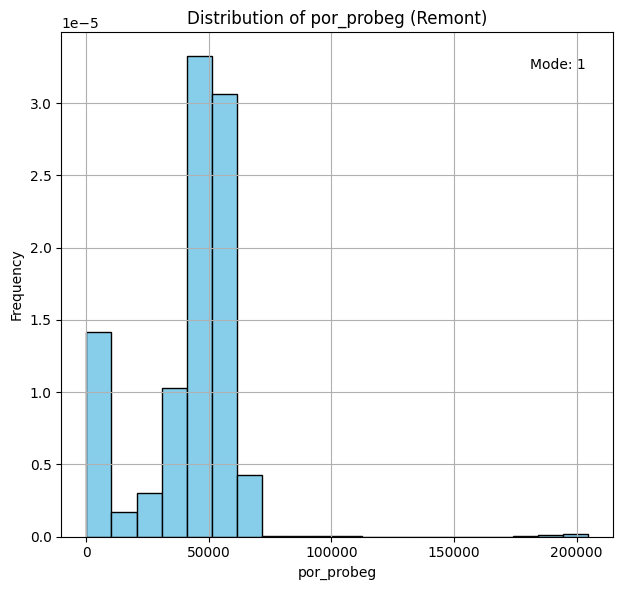

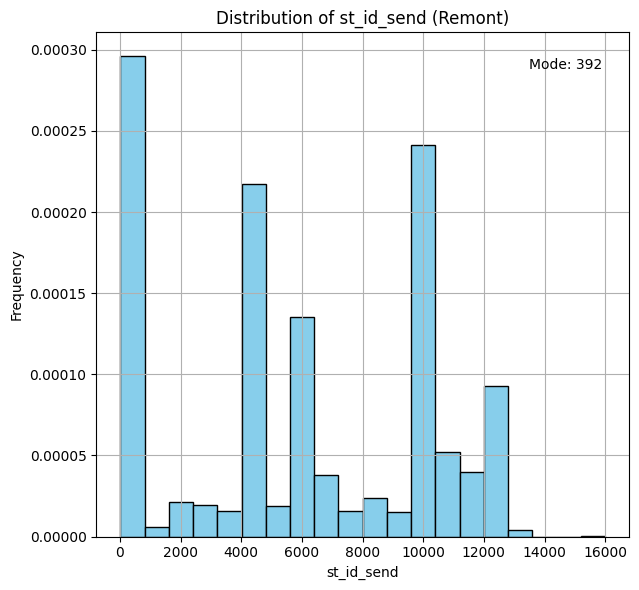

In [ ]:
# Построение распределений и вывод моды для каждого столбца в df_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Вывод моды
    mode_value = df_remont[column].mode().iloc[0]
    plt.text(0.95, 0.95, f'Mode: {mode_value}', ha='right', va='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

###**Вывод**

Чаще всего на текущий внеплановый ремонт вагоны были отправлены в августе. В сентябре, октябре и ноябре также наблюдается высокое количество ремонтных работ. На основании анализа кода работ можно сделать вывод о наиболее частых неисправностях колесных пар, о наличии трещин, изломов и вертикальных прогибов частей вагона, а также об износе механизма зацепления и автосцепки, отсутствии или повреждении частей вагона.

---

neis2_kod, neis3_kod - неисправность электромагнитного клапана


###2.6. Данные по КТИ

In [ ]:
# данные по КТИ
kti = pd.read_parquet(path_train + '/kti_izm.parquet').convert_dtypes()
kti

wagnum operation_date_dttm  mileage_all  axl1_l_w_flange  \
43        1302          2023-02-17        67638             29.6   
60        1374          2023-02-25        83798             29.1   
137       2916          2023-02-21       121660             30.4   
196       3849          2023-02-19        59664             30.6   
197       3849          2023-02-20        59664             30.9   
...        ...                 ...          ...              ...   
212300   26543          2023-02-28        18361             29.5   
212327   33975          2023-02-28        13736             25.9   
212347   28227          2023-02-28       154365             26.9   
212349   33698          2023-02-28        39226             29.4   
212366   29168          2023-02-28        17693             29.3   

        axl1_r_w_flange  axl2_l_w_flange  axl2_r_w_flange  axl3_l_w_flange  \
43                 29.5             30.0             29.6             30.2   
60                 27.9             27.7             29.1             29.3   
137                26.5             30.8             28.2             26.9   
196                29.2             31.6             28.5             31.0   
197                28.7             32.4             28.1             31.0   
...                 ...              ...              ...              ...   
212300             28.2             27.8             29.0             28.2   
212327             28.5             28.4             28.9             28.1   
212347             28.5             26.7             28.1             29.0   
212349             28.3             27.9             27.0             28.0   
212366             29.0             29.2             29.7             28.0   

        axl3_r_w_flange  axl4_l_w_flange  axl4_r_w_flange  axl1_l_w_rim  \
43                 29.9             30.9             29.5          37.8   
60                 30.2             29.4             27.5          48.9   
137                27.1             29.8             31.2          69.2   
196                30.7             29.3             30.0          75.1   
197                29.7             30.5             29.9          75.6   
...                 ...              ...              ...           ...   
212300             29.3             29.7             28.9          64.4   
212327             28.0             28.2             29.5          51.4   
212347             27.4             29.8             29.0          72.4   
212349             28.8             26.7             28.9          35.1   
212366             29.1             29.2             28.7          64.5   

        axl1_r_w_rim  axl2_l_w_rim  axl2_r_w_rim  axl3_l_w_rim  axl3_r_w_rim  \
43              39.2          39.5          38.9          41.8          38.9   
60              49.0          49.7          51.0          30.7          32.4   
137             66.7          66.8          63.7          66.1          66.3   
196             76.1          74.8          73.7          75.6          76.8   
197             76.8          74.1          74.7          75.8          77.0   
...              ...           ...           ...           ...           ...   
212300          65.7          58.8          58.3          50.1          50.1   
212327          51.6          46.5          47.3          52.4          50.9   
212347          72.3          60.2          58.7          69.8          72.1   
212349          36.6          40.1          40.5          46.6          47.0   
212366          64.6          57.4          57.8          58.3          58.1   

        axl4_l_w_rim  axl4_r_w_rim  
43              36.5          38.2  
60              30.6          28.8  
137             68.1          67.6  
196             72.2          72.9  
197             74.9          74.2  
...              ...           ...  
212300          58.1          57.1  
212327          54.0          56.7  
212347          76.2          78.0  
212349          43.5  

In [ ]:
# Исключаем строки с пропущенными значениями в столбце 'ost_prob'
kti_no_missing = kti.dropna(subset=['mileage_all'])

# Находим индексы минимальных значений в столбце 'ost_prob' для каждого 'wagnum'
idx_min_ost = kti_no_missing.groupby('wagnum')['mileage_all'].idxmax()

# Получаем соответствующие строки в исходном датафрейме
kti_min_ost = kti_no_missing.loc[idx_min_ost]

# Удаление дубликатов по столбцу 'wagnum'
kti_min_ost_unique = kti_min_ost.drop_duplicates(subset='wagnum')

# Вывод результата
print(kti_min_ost_unique.shape)

(6584, 19)


In [ ]:
df_remont = pd.merge(y_train_remont, kti_min_ost_unique, on='wagnum')
print(f'размерность в ремонте: {df_remont.shape}')

размерность в ремонте: (2056, 22)


In [ ]:
df_ne_remont = pd.merge(y_train_ne_remont, kti_min_ost_unique, on='wagnum')
print(f'размерность не в ремонте: {df_ne_remont.shape}')

размерность не в ремонте: (4528, 22)


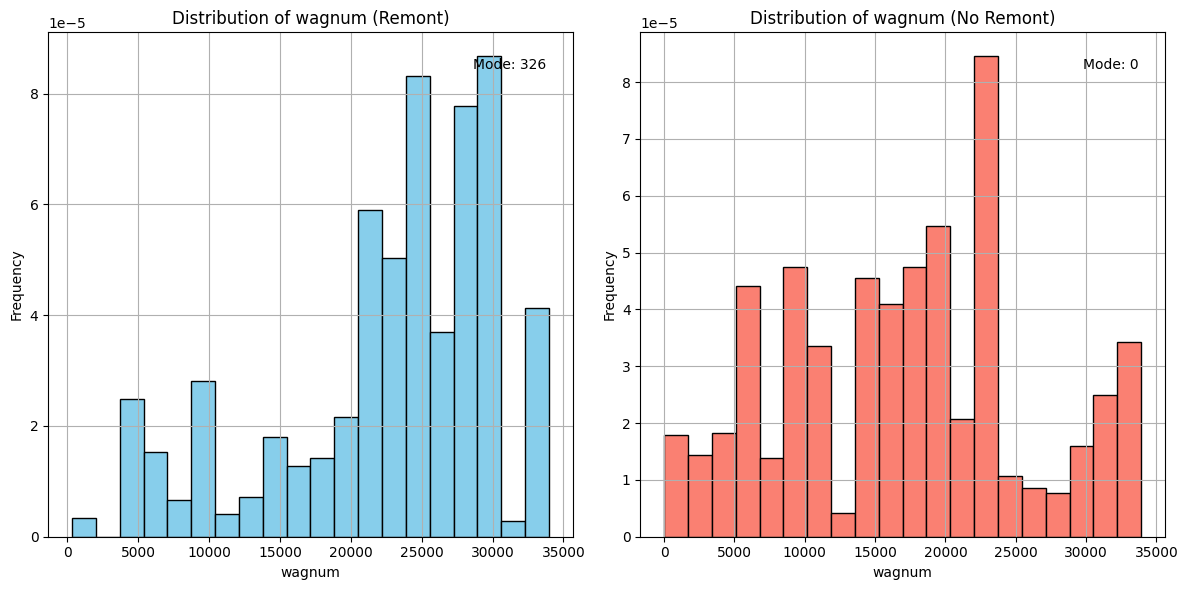

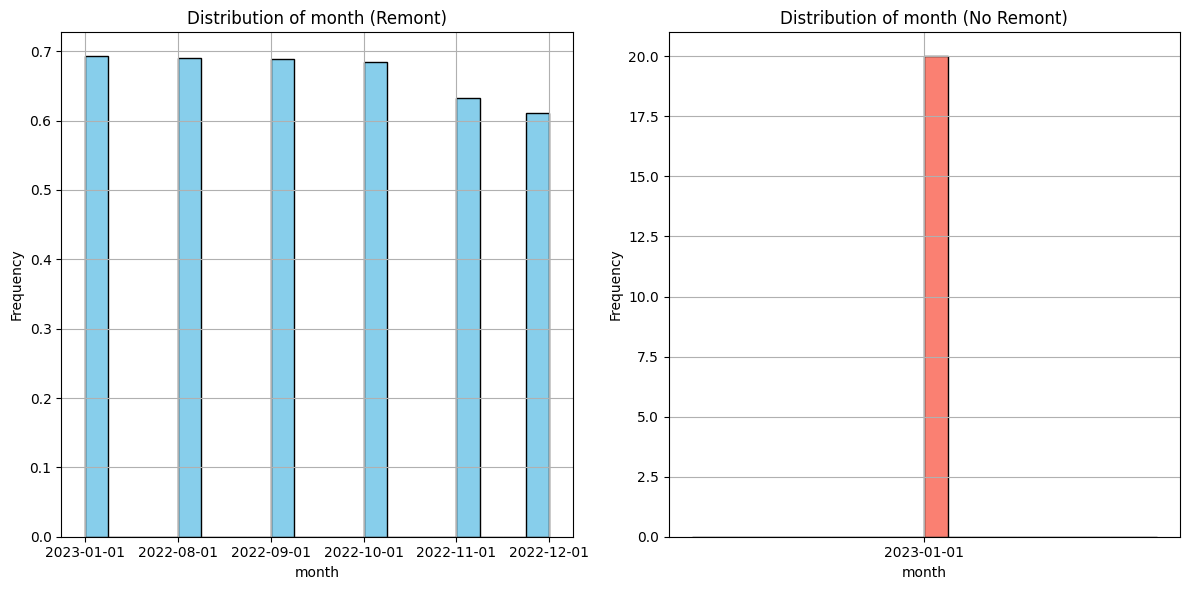

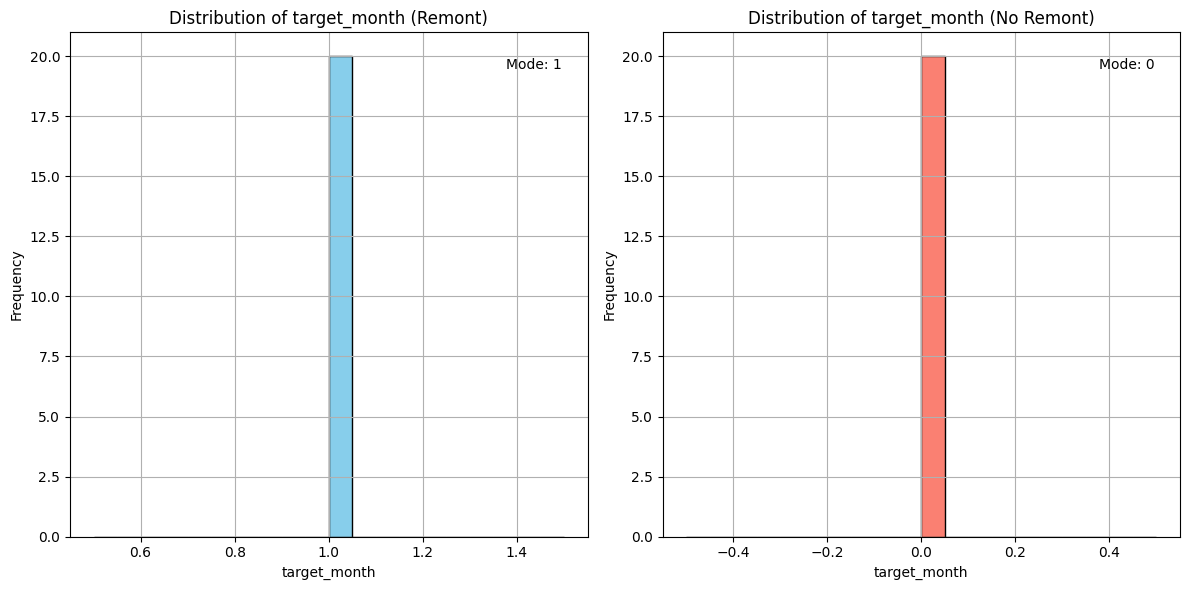

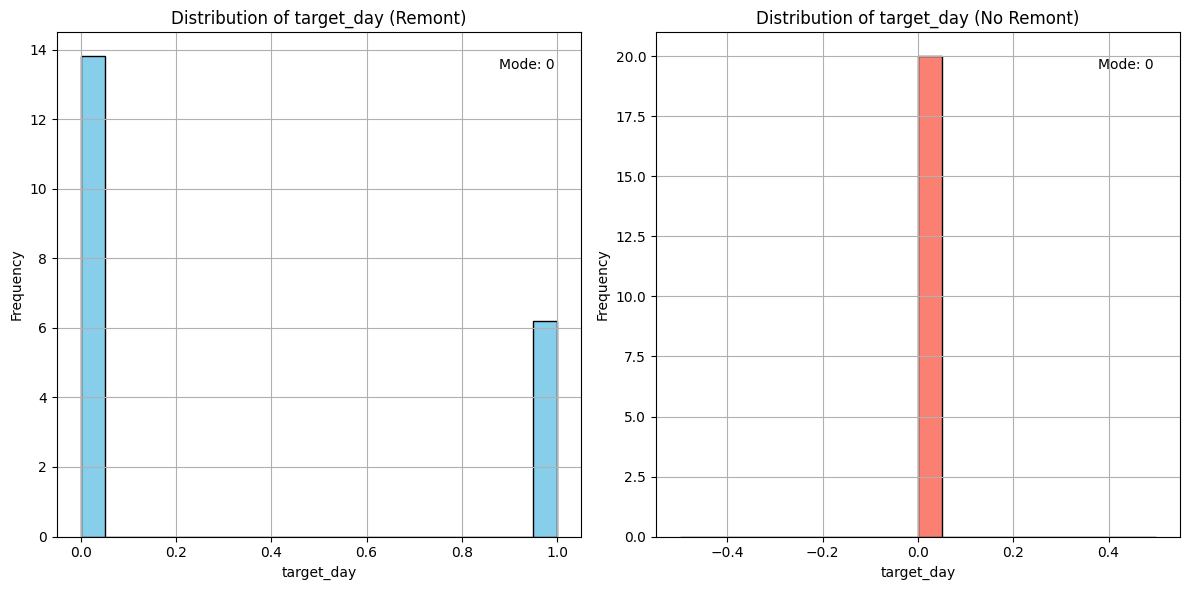

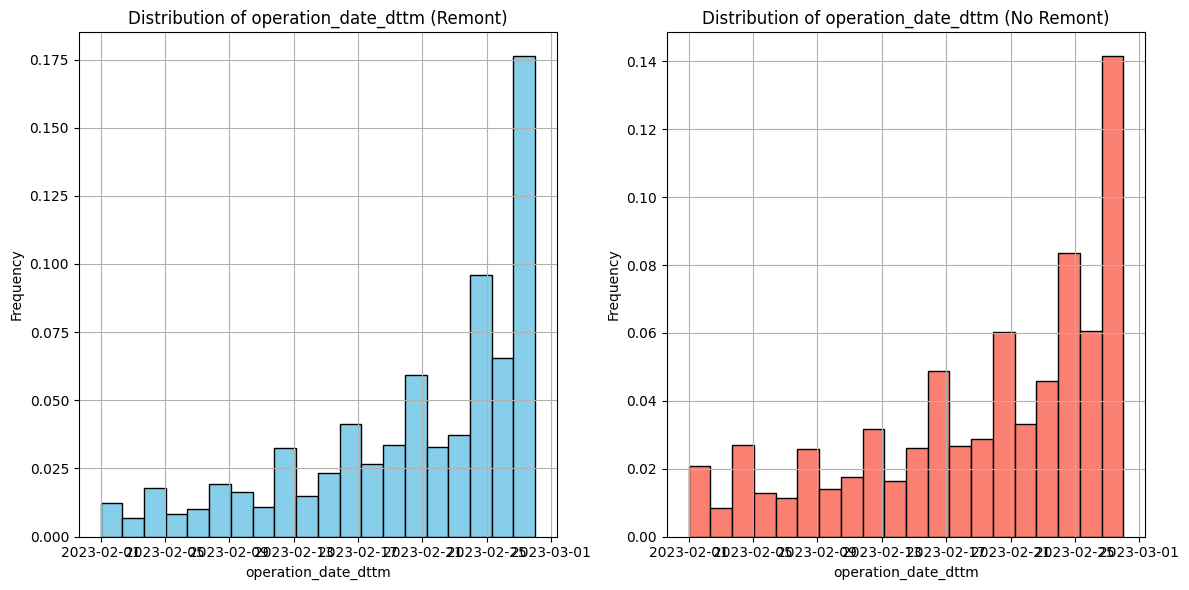

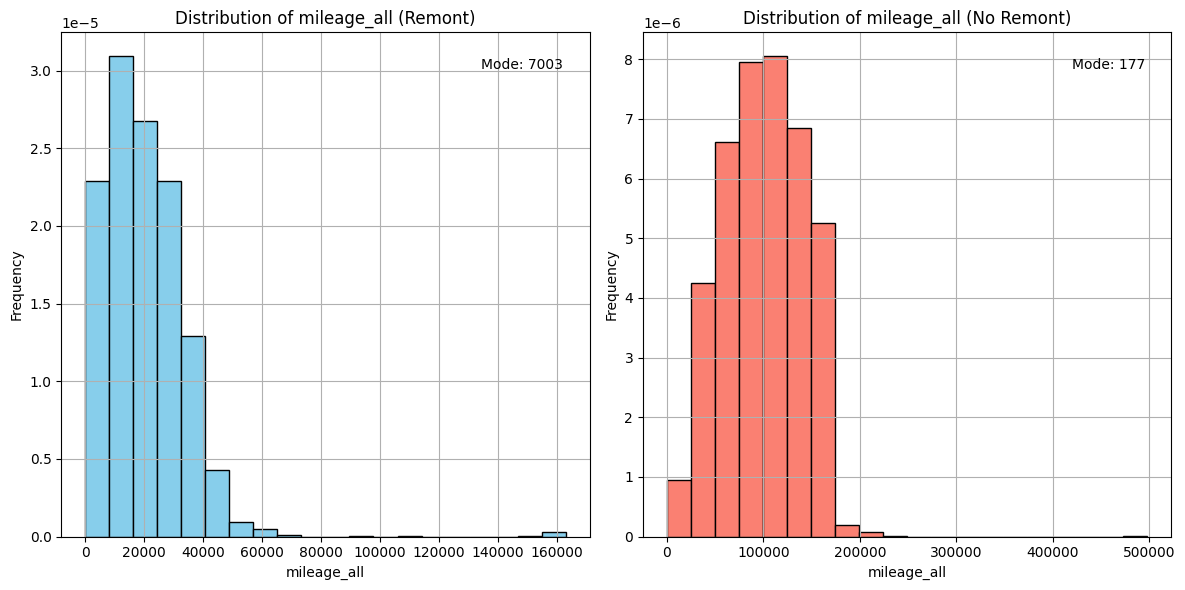

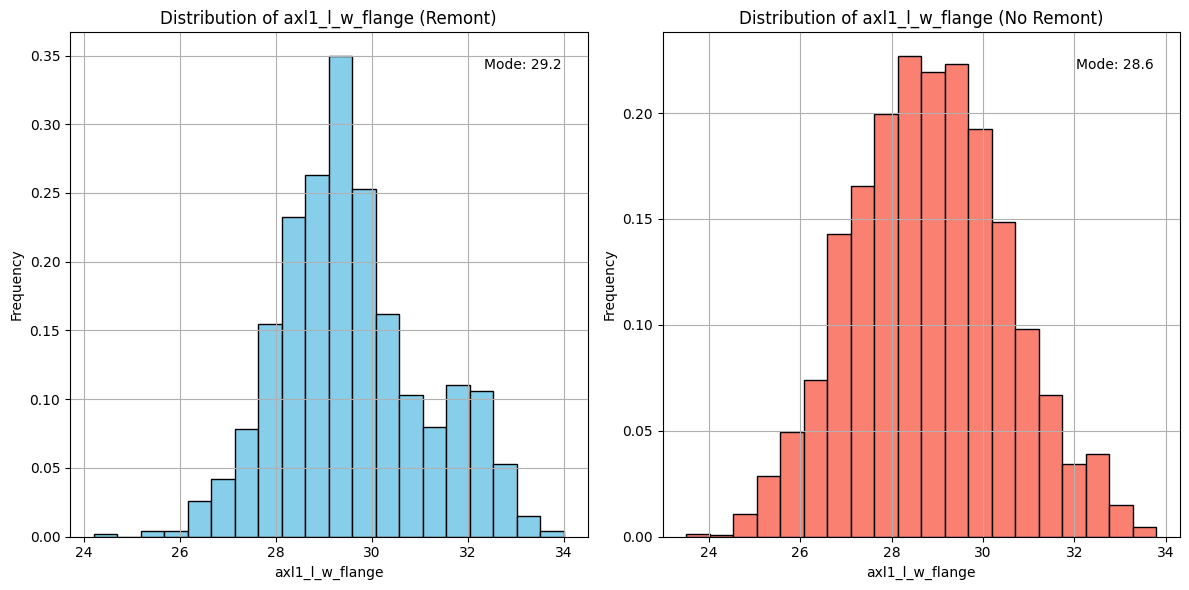

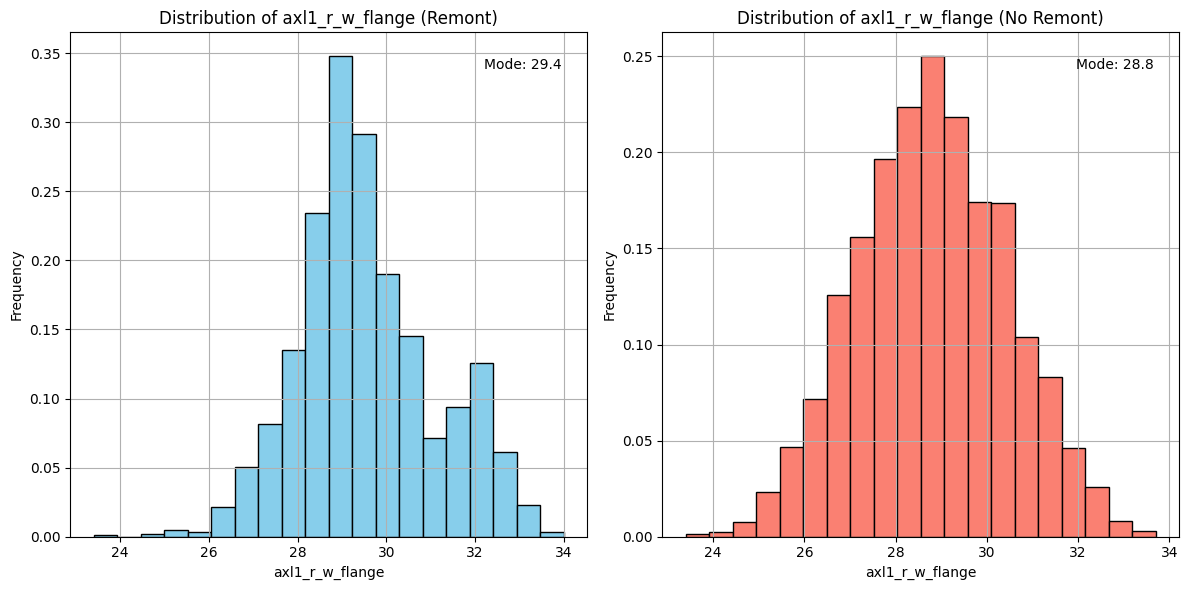

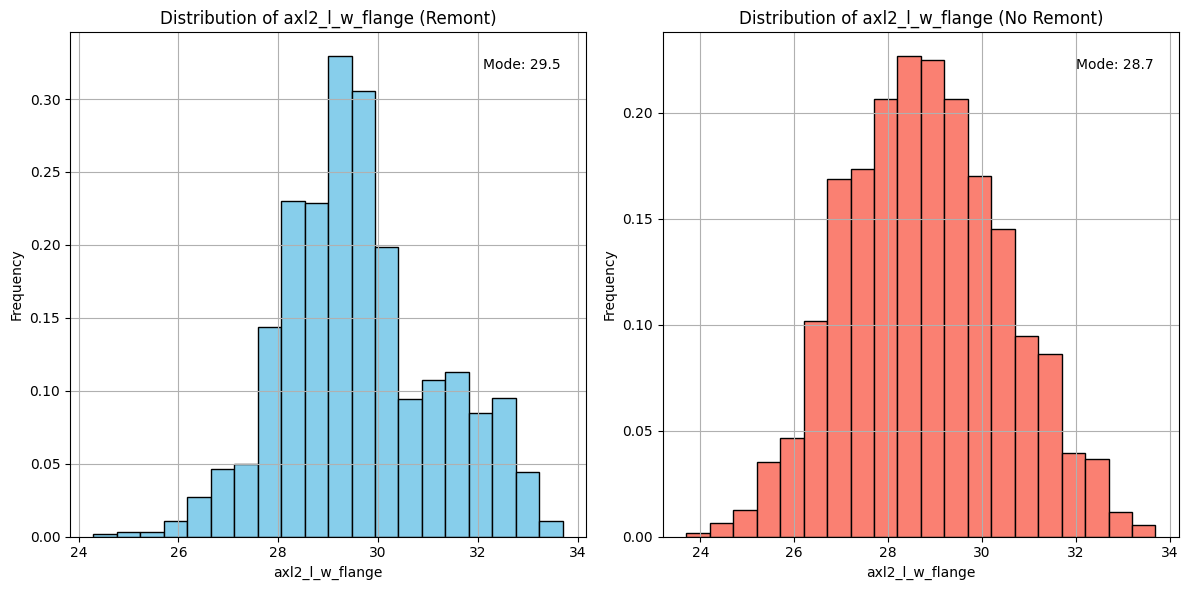

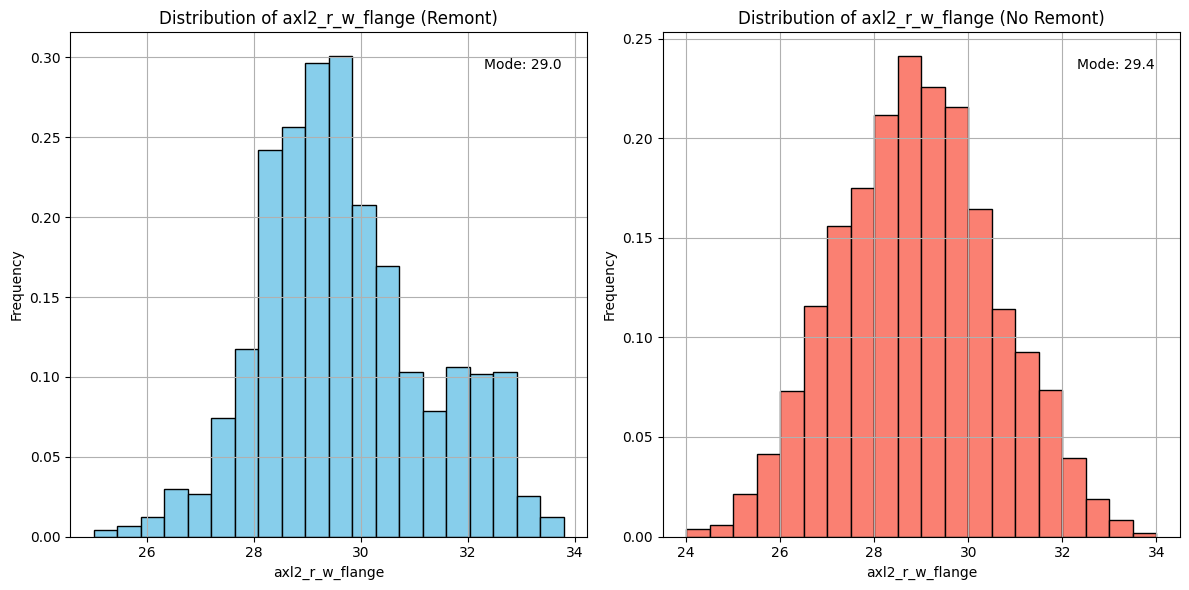

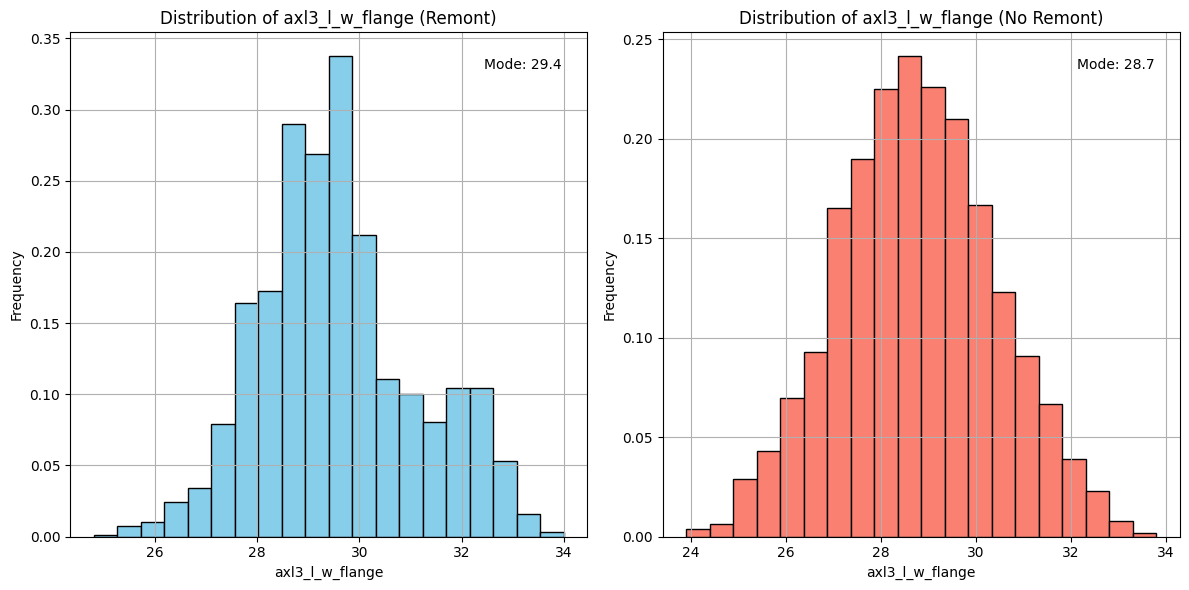

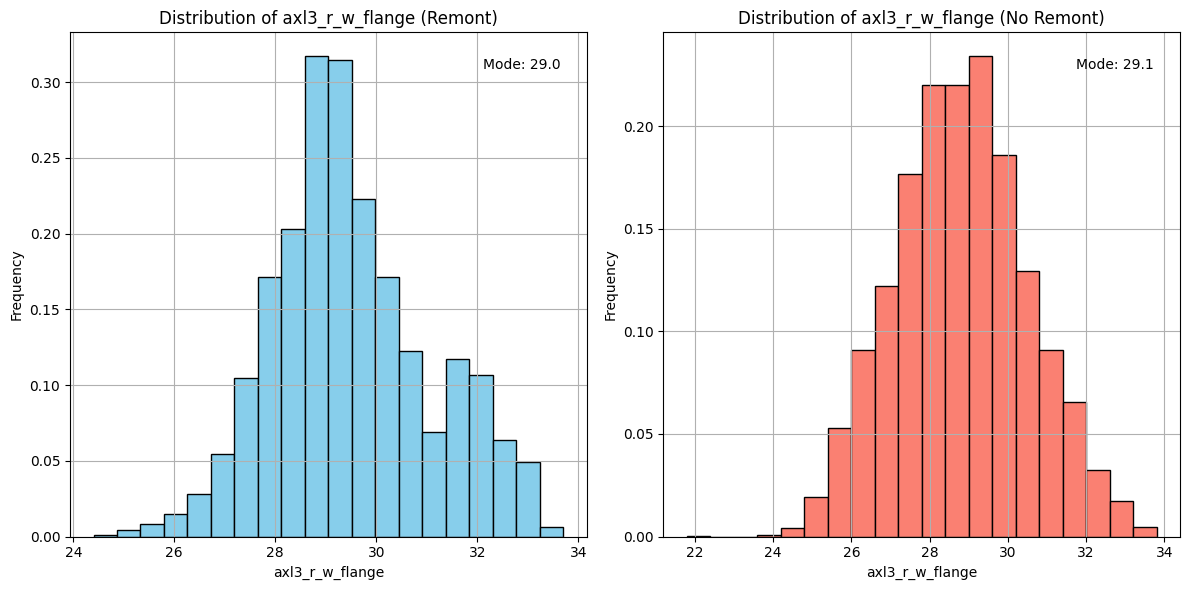

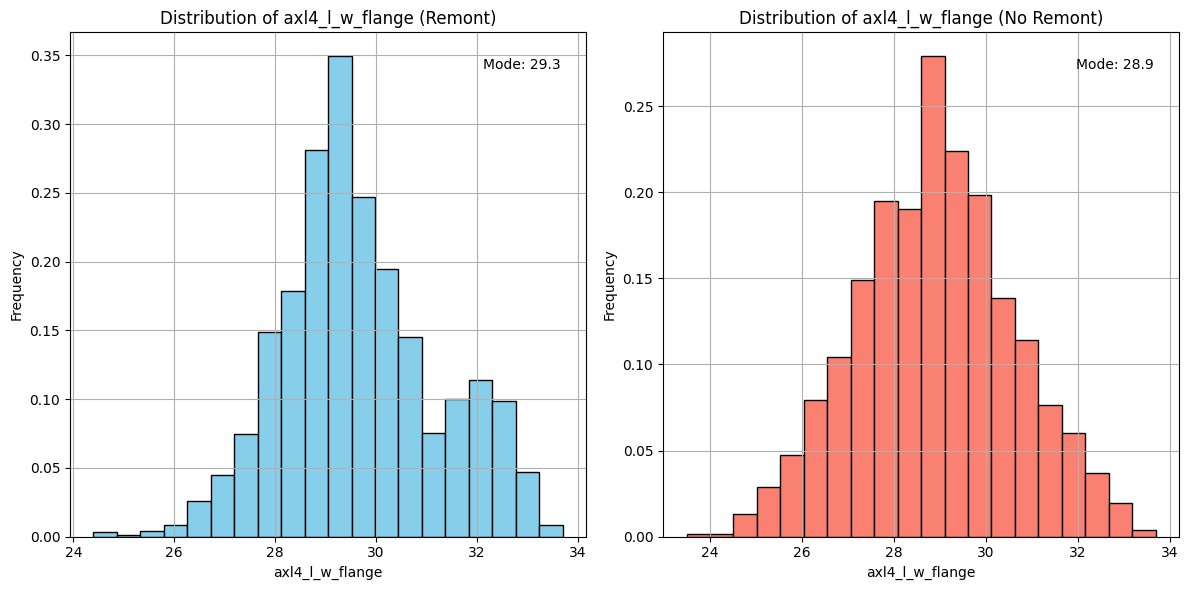

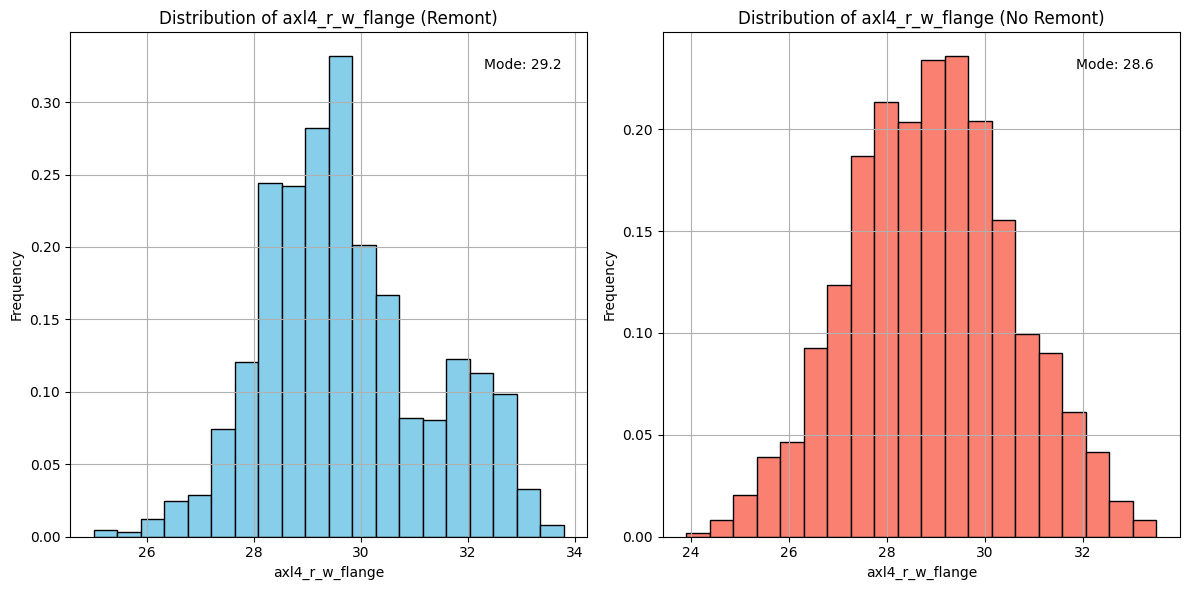

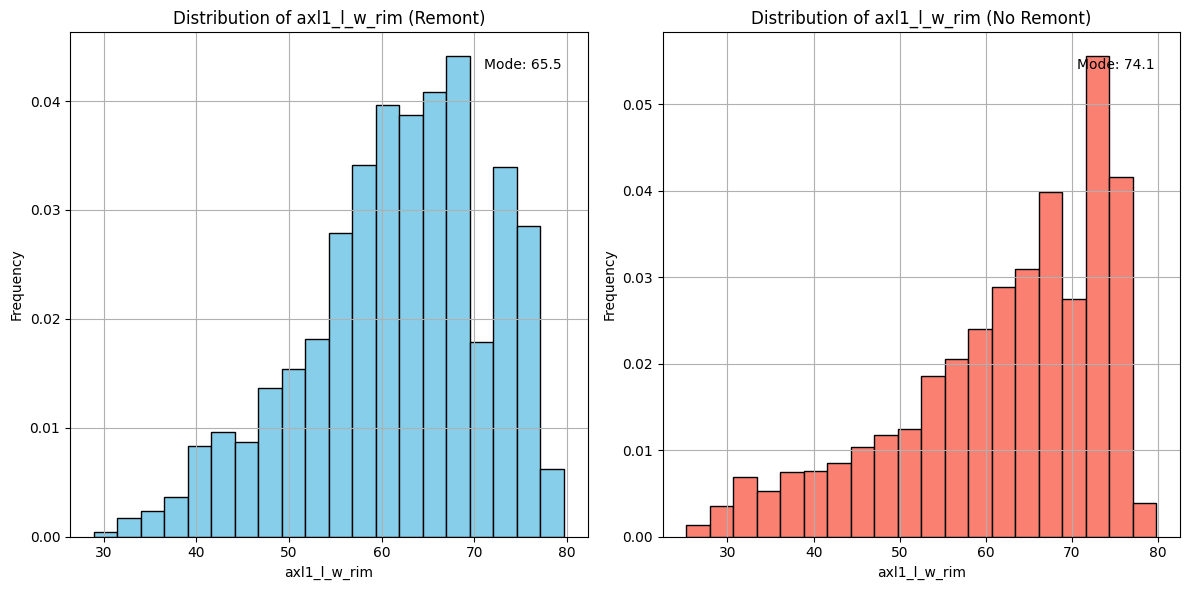

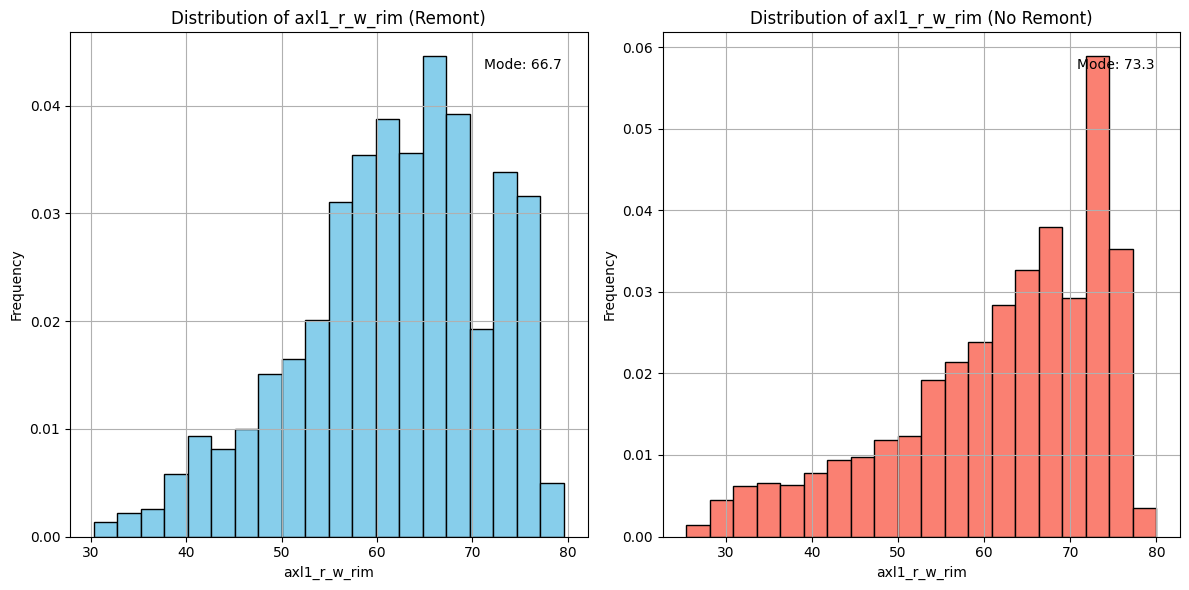

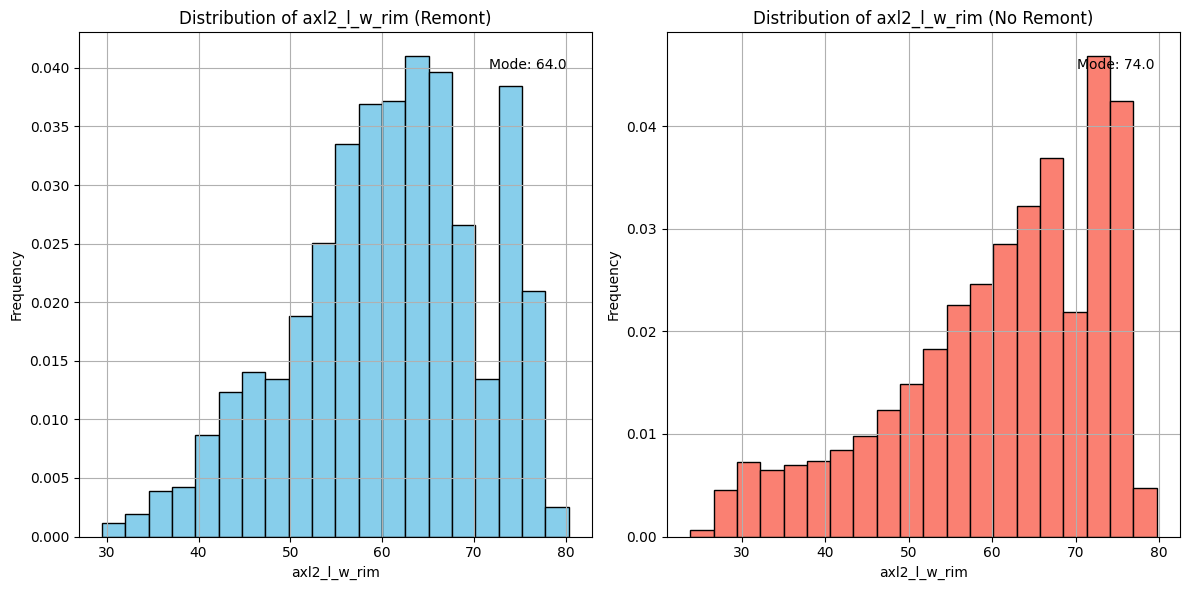

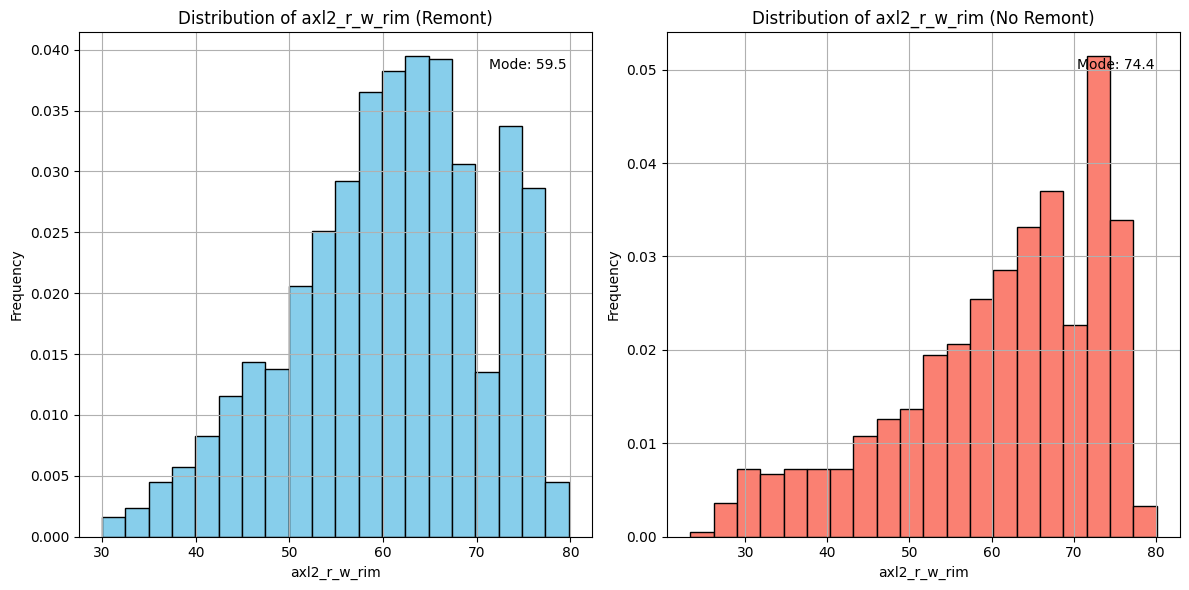

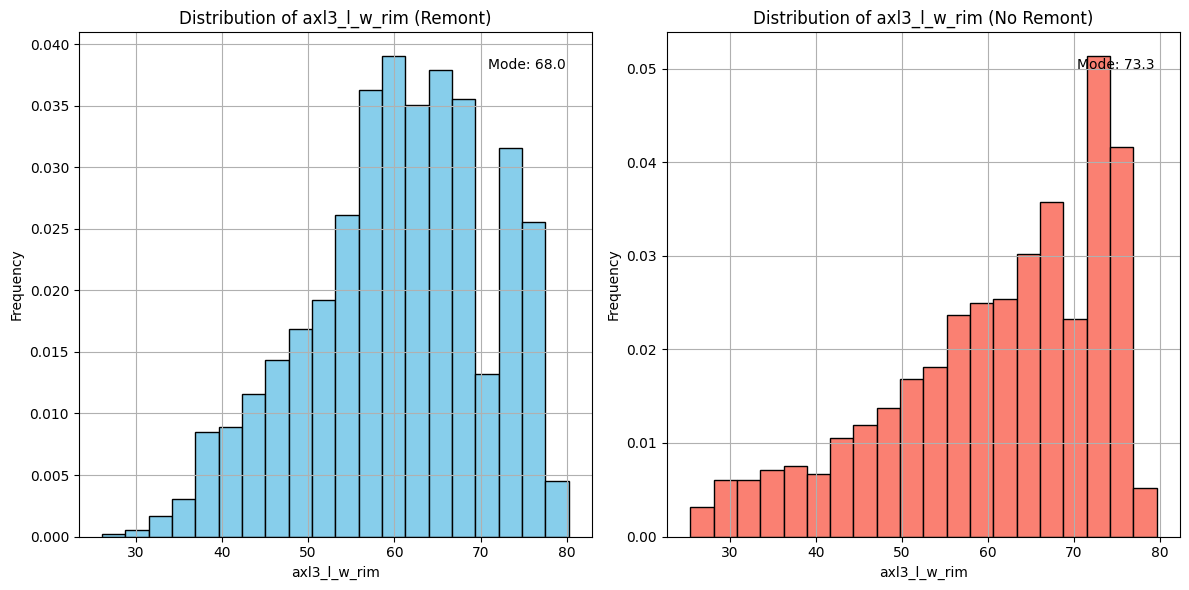

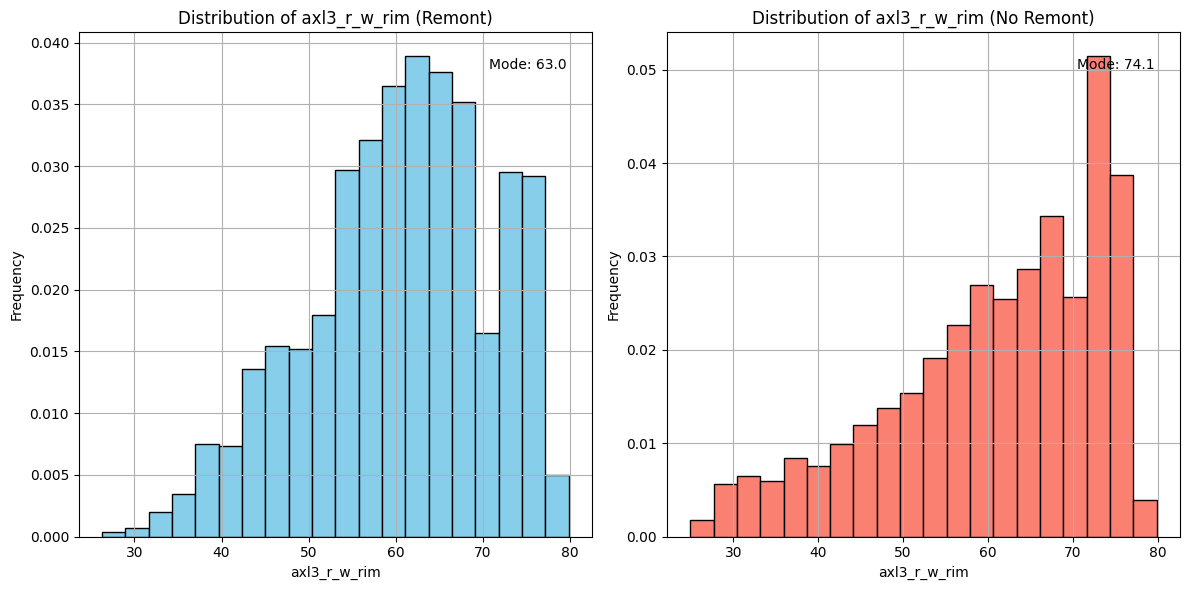

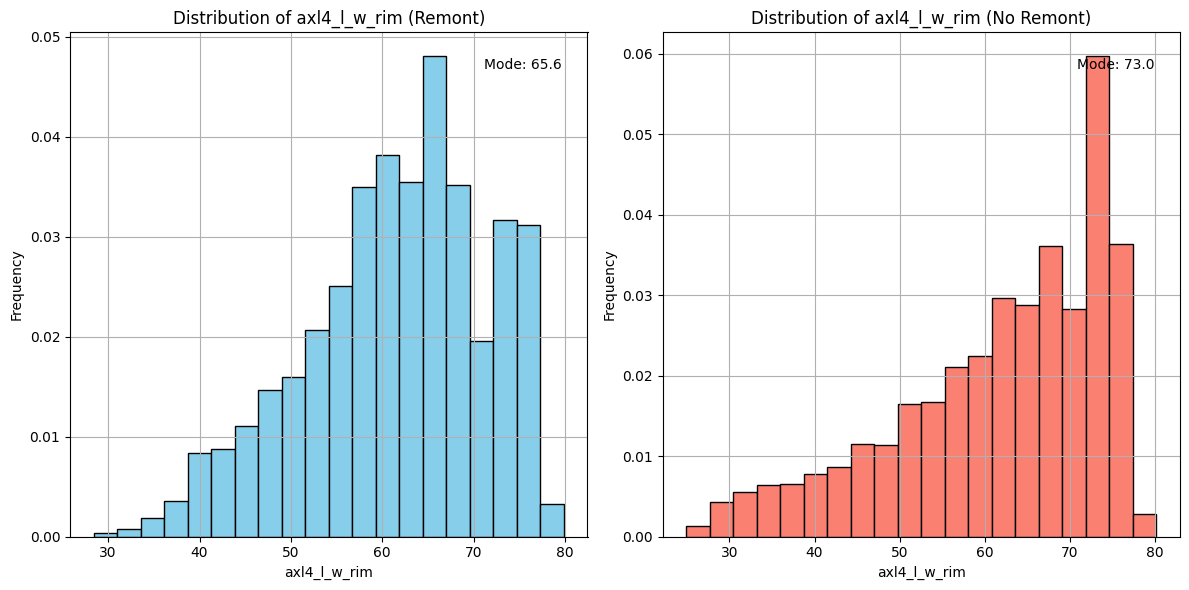

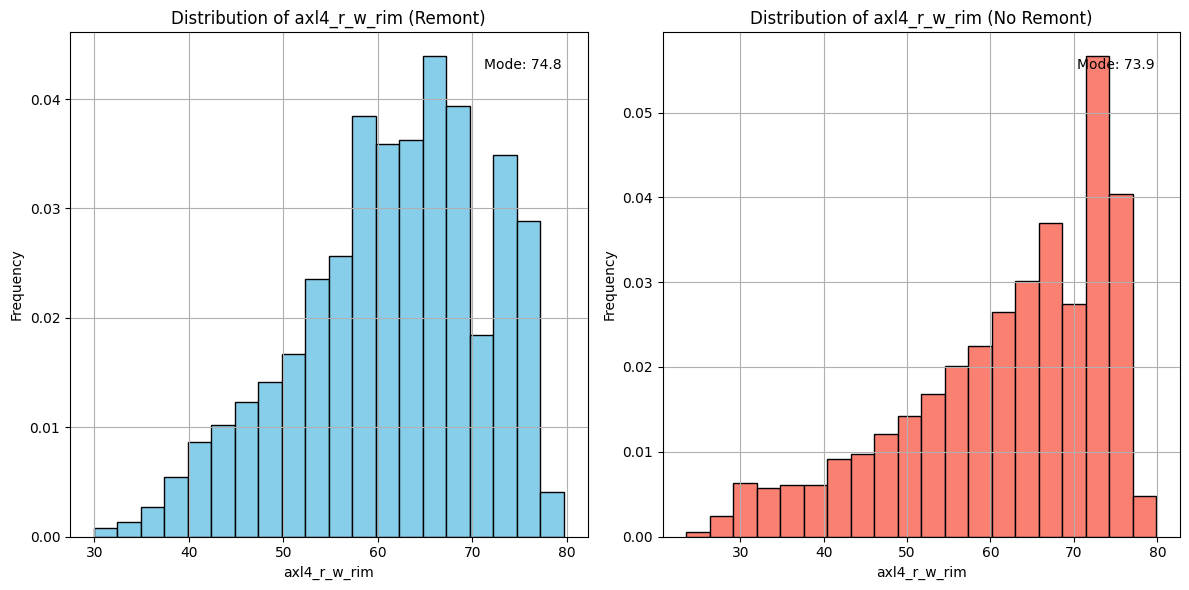

In [ ]:
# Построение распределений для каждого столбца в df_remont и df_ne_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Добавление моды
    if pd.api.types.is_numeric_dtype(df_remont[column]):
        mode_value_remont = df_remont[column].mode().iloc[0]
        plt.text(0.95, 0.95, f'Mode: {mode_value_remont}', ha='right', va='top', transform=plt.gca().transAxes)

    # Распределение для df_ne_remont
    plt.subplot(1, 2, 2)
    plt.hist(df_ne_remont[column].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (No Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Добавление моды
    if pd.api.types.is_numeric_dtype(df_ne_remont[column]):
        mode_value_ne_remont = df_ne_remont[column].mode().iloc[0]
        plt.text(0.95, 0.95, f'Mode: {mode_value_ne_remont}', ha='right', va='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

###**Вывод**

Данные по контрольно-техническим измерениям.
Ремонт в осенне-зимний период является наиболее актуальным, т.к. на грузоперевозки влияют погодные и климатические условия.

---

Анализ общего пробега отремонтированных и находящихся в работоспособном состоянии вагонов помогает выявить следующую зависимость: чем меньше общий пробег, тем больше вероятность отправления вагона в ремонт. Стоит учесть большое количество в парке вагонов с истекающим общим пробегом.

---

Толщина гребня и обода колеса грузового вагона независимо от оси, относительно которой производятся измерения, является важным показателем для определения потребности в ремонтных работах - в ремонт были отправлены вагоны с большей толщиной гребня и меньшей толщиной обода.

<ipython-input-162-ffc1e09def6b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


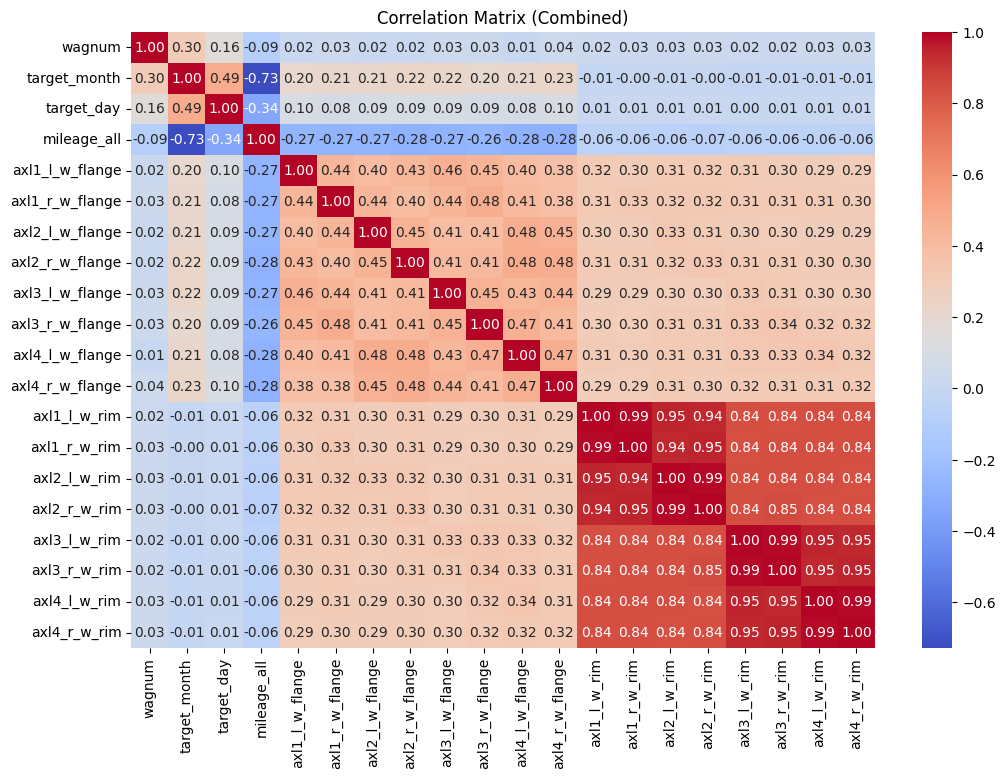

In [ ]:
# Объединение данных в один DataFrame
merged_df = pd.concat([df_remont, df_ne_remont])

# Построение корреляционной матрицы
correlation_matrix = merged_df.corr()

# Построение тепловой карты для корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Combined)')
plt.show()

In [ ]:
merged_df.shape

(6584, 22)

###**Вывод по корреляционной матрице.**

Учитываем все, кроме axl1_l_w_rim, axl1_r_w_rim, axl2_l_w_rim, axl2_r_w_rim

###2.7. Справочник грузов

In [ ]:
# данные по грузам
gruz = pd.read_parquet(path_train + '/freight_info.parquet').convert_dtypes()
gruz

fr_id  fr_class  skoroport  naval  nasip  naliv  openvagons  soprovod  \
0      4989         2          0      0      0      0           0         0   
1      4990         2          0      0      0      0           0         0   
2      4991         0          0      0      0      0           0         0   
3      4992         2          0      0      0      0           0         0   
4      4993         2          0      0      0      0           0         0   
...     ...       ...        ...    ...    ...    ...         ...       ...   
5074    989         0          0      1      1      0           0         0   
5075    990         0          0      1      1      0           0         0   
5076    991         0          0      1      1      0           0         0   
5077    992         0          0      0      0      0           0         0   
5078    993         0          0      1      1      0           0         0   

      smerz  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5074      0  
5075      0  
5076      0  
5077      0  
5078      0  

[5079 rows x 9 columns]

Для анализа свойств груза, объединим датасет по справочнику грузов с датасетом по локации вагонов. Объединение по "fr_id"

In [ ]:
# Объединение по столбцу 'fr_id'
merged_df = pd.merge(gruz, dislok_min_ost_unique, on='fr_id')

# Вывод объединенного DataFrame
print(merged_df)

       fr_id  fr_class  skoroport  naval  nasip  naliv  openvagons  soprovod  \
0       4996         1          0      1      1      0           0         0   
1       4996         1          0      1      1      0           0         0   
2       4996         1          0      1      1      0           0         0   
3       5000         0          0      1      1      0           1         0   
4       5007         1          1      0      0      0           0         0   
...      ...       ...        ...    ...    ...    ...         ...       ...   
32180    988         0          0      1      1      0           0         0   
32181    988         0          0      1      1      0           0         0   
32182    988         0          0      1      1      0           0         0   
32183    988         0          0      1      1      0           0         0   
32184    988         0          0      1      1      0           0         0   

       smerz  plan_date  ...  date_pl_r

In [ ]:
df_remont = pd.merge(y_train_remont, merged_df, on='wagnum')
df_ne_remont = pd.merge(y_train_ne_remont, merged_df, on='wagnum')
print(f'Размерность в ремонте: {df_remont.shape}')
print(f'Размерность не в ремонте: {df_ne_remont.shape}')

Размерность в ремонте: (10274, 27)
Размерность не в ремонте: (21911, 27)


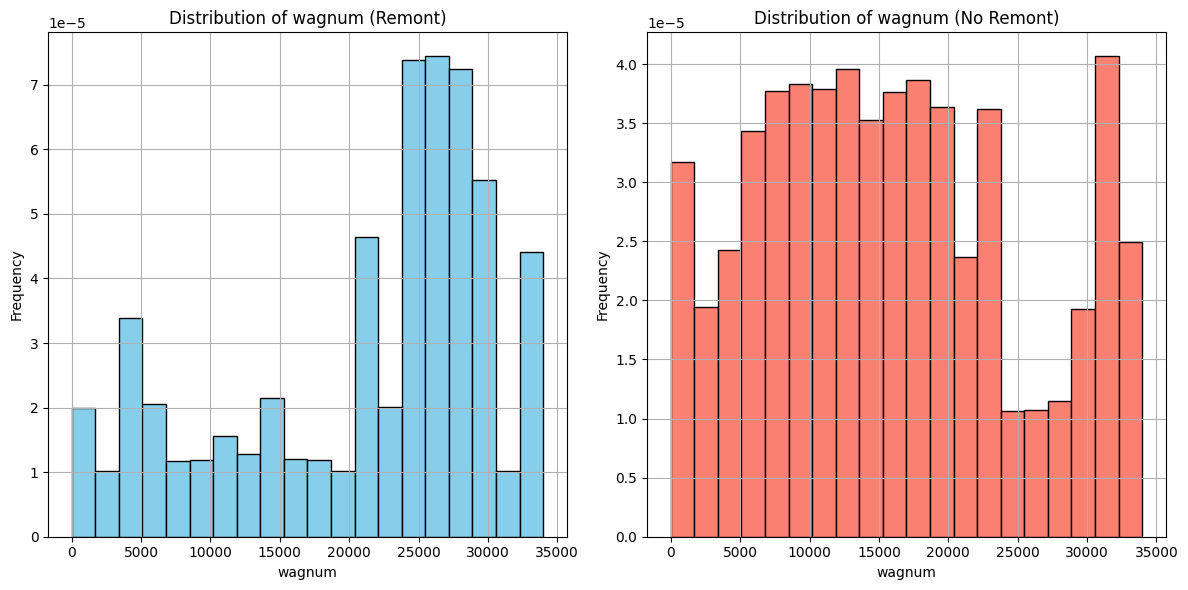

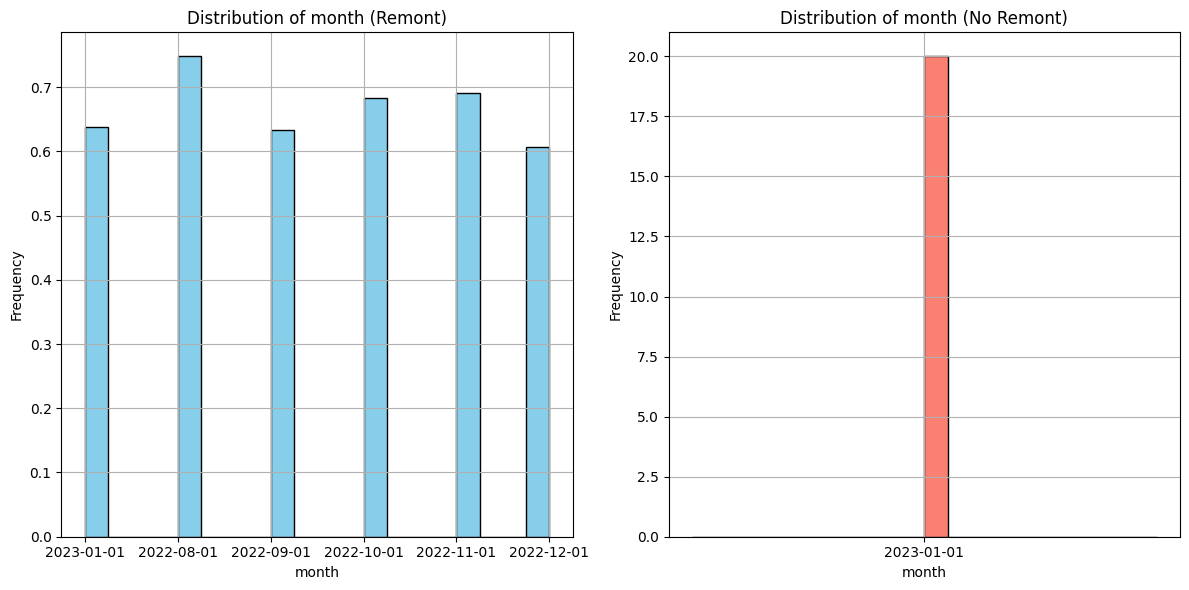

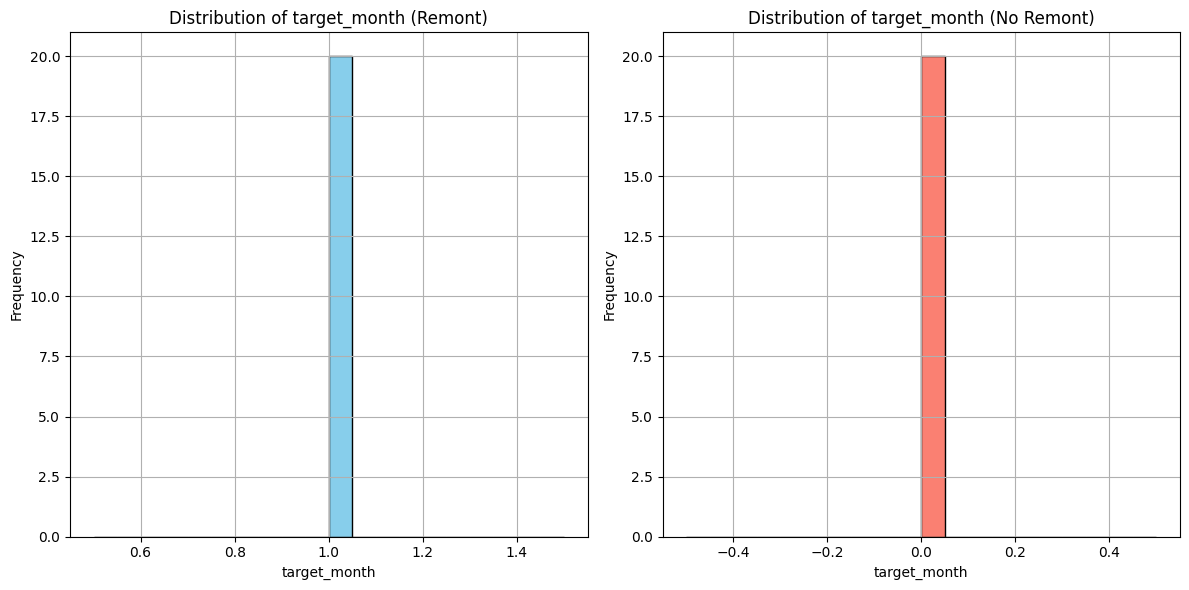

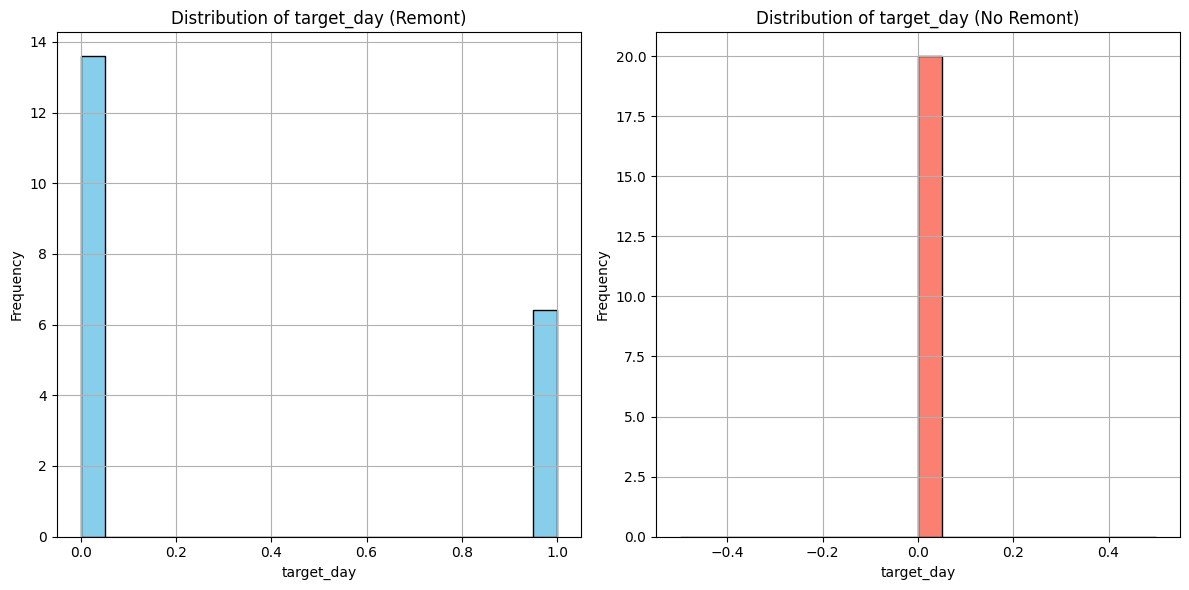

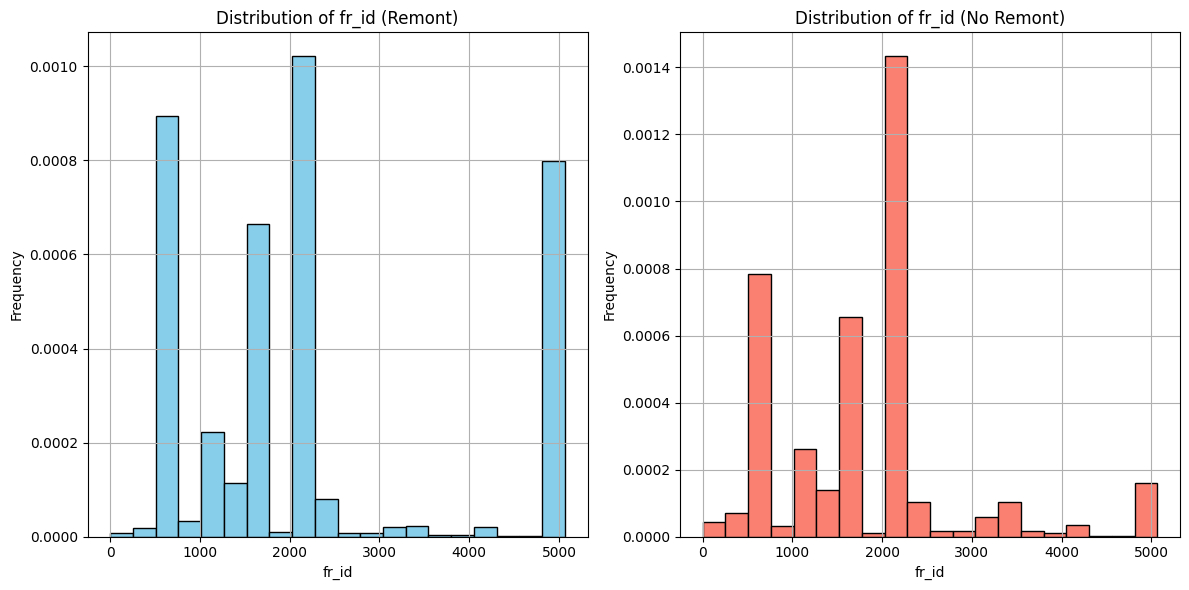

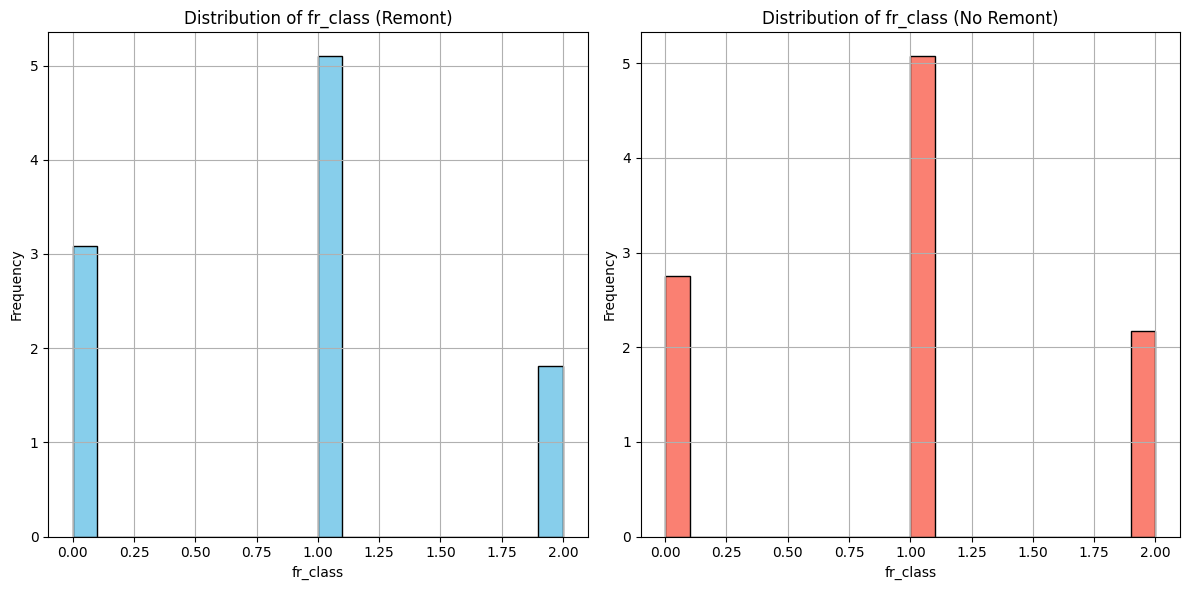

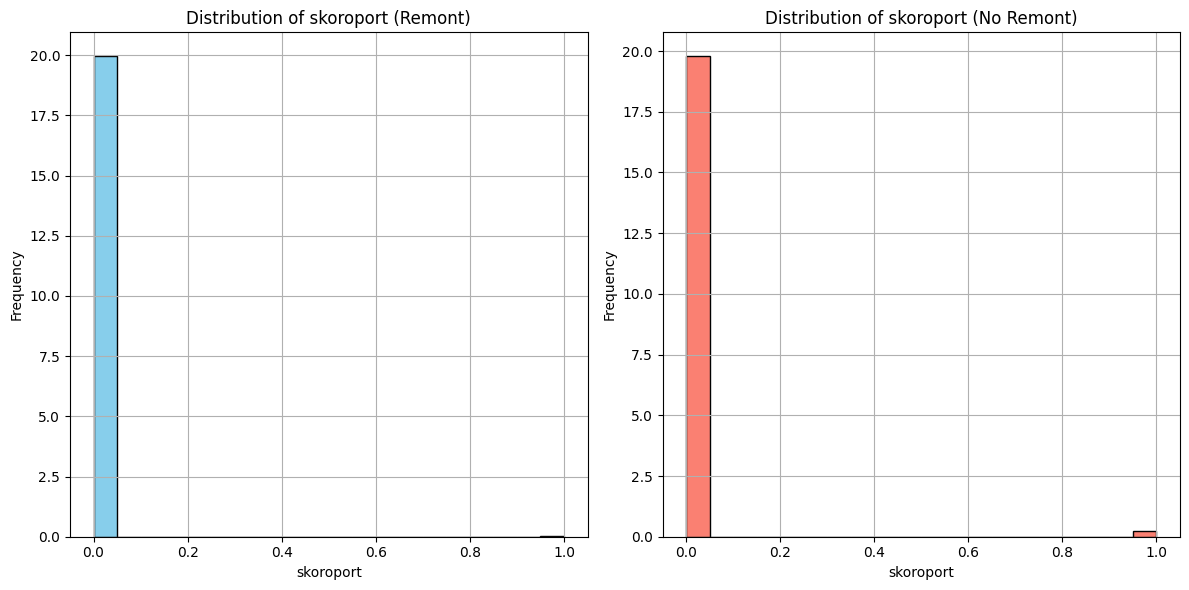

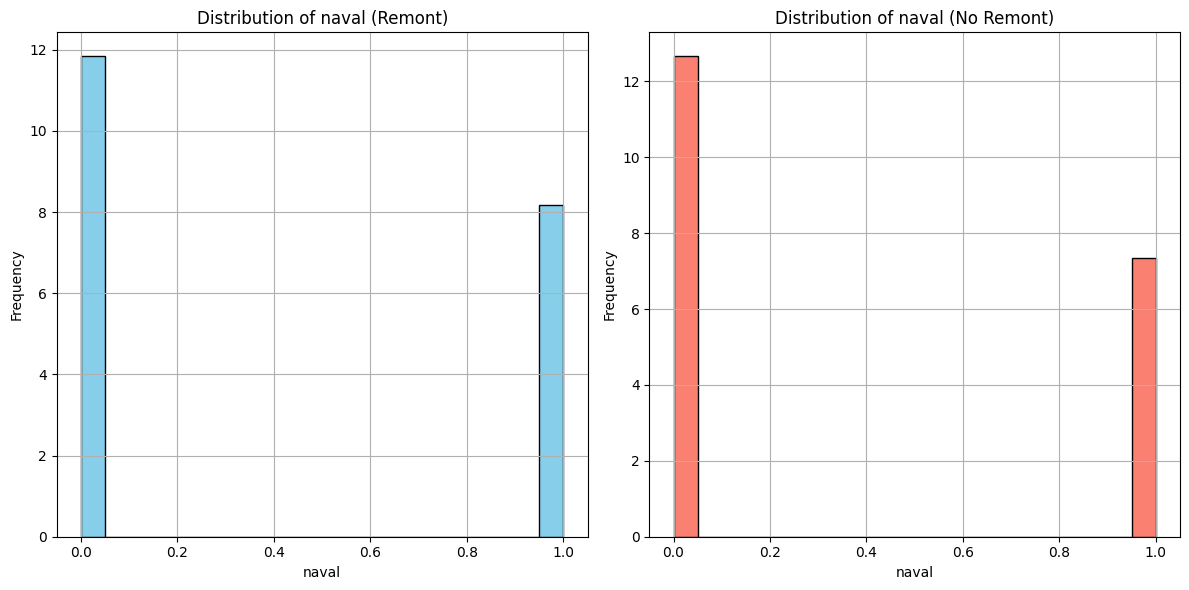

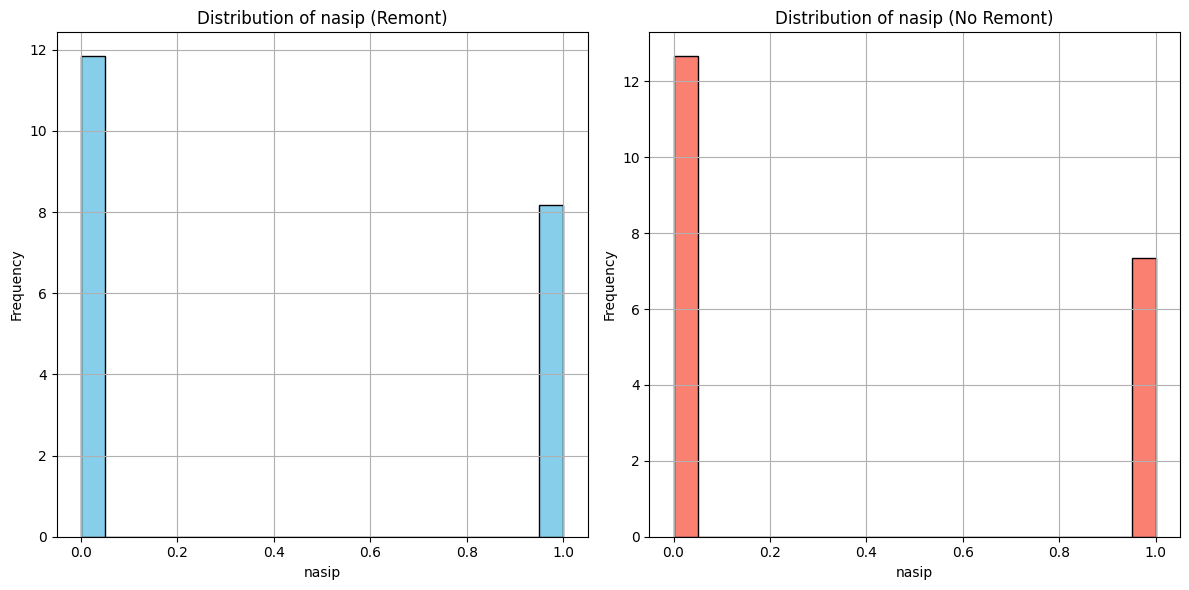

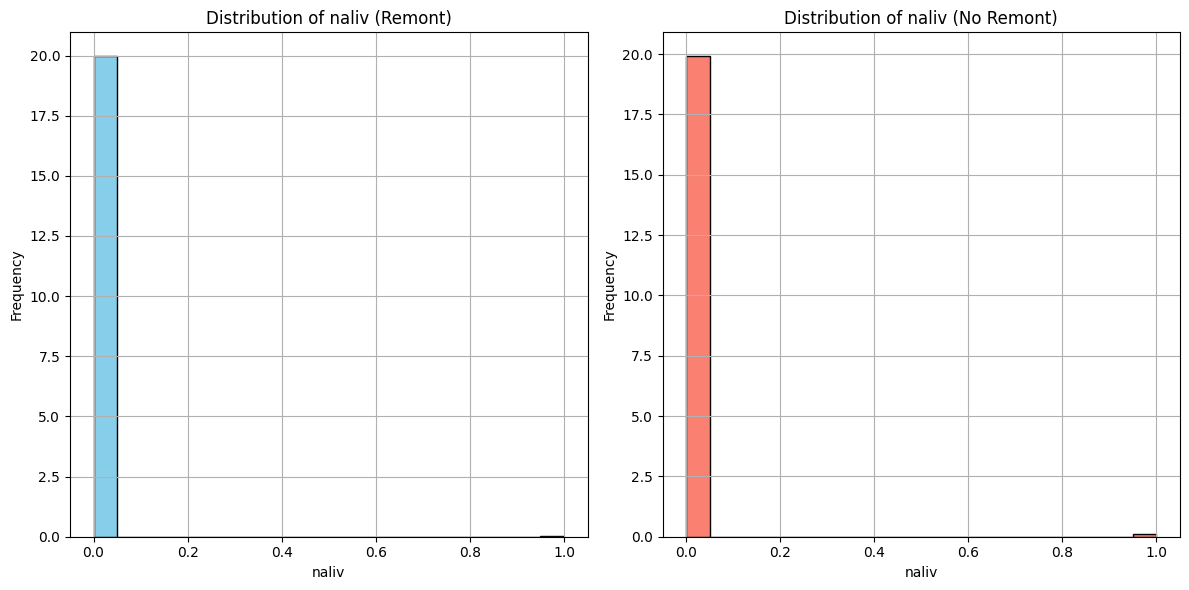

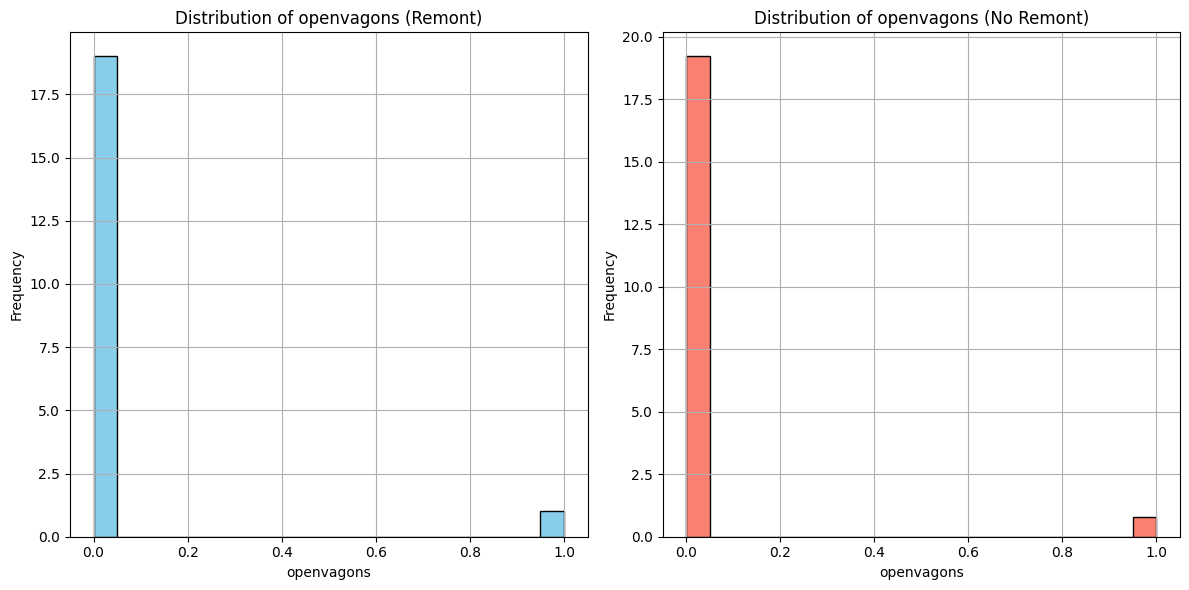

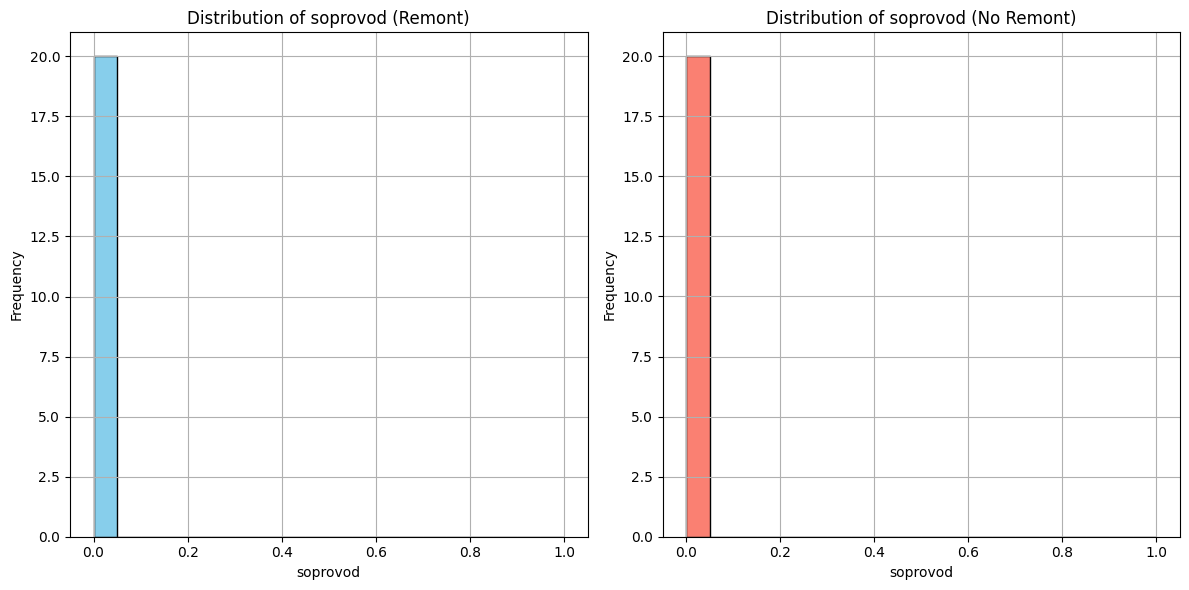

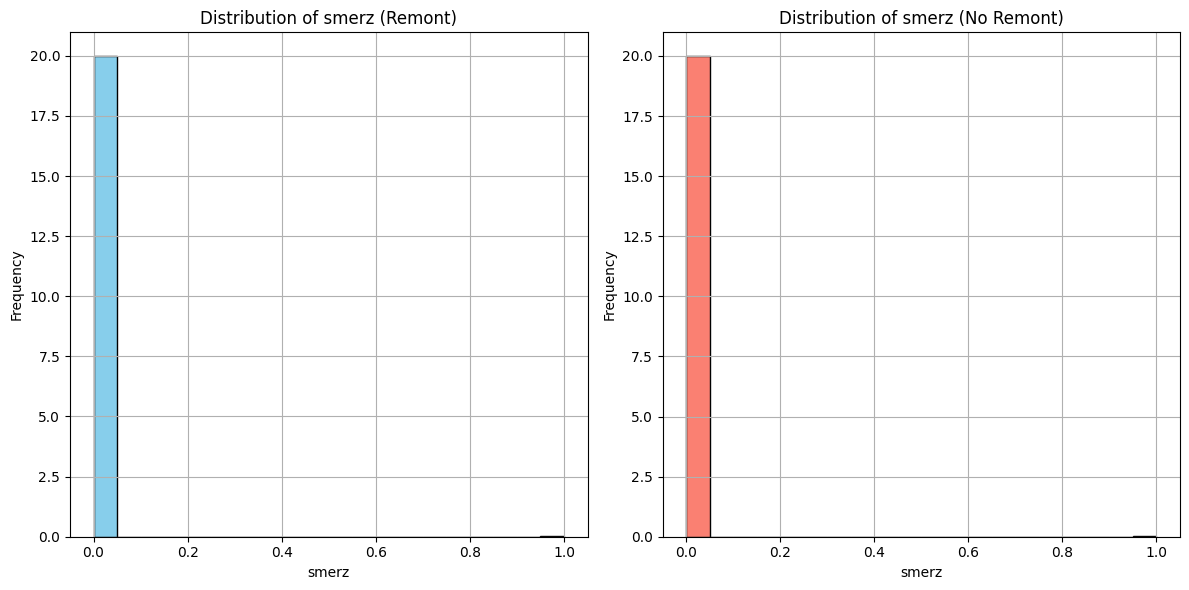

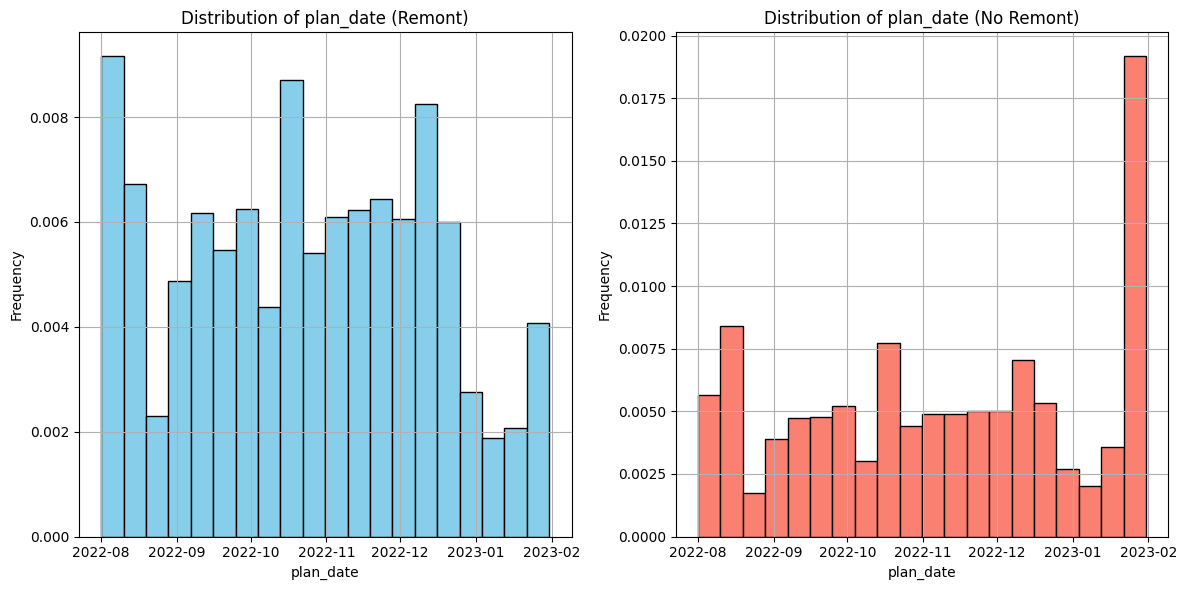

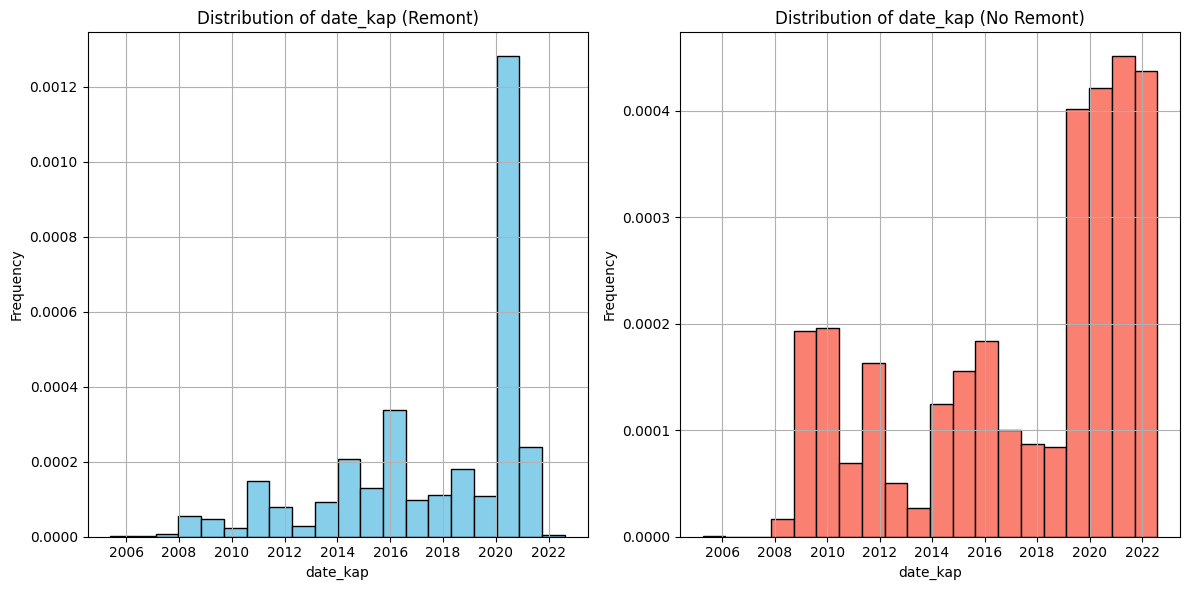

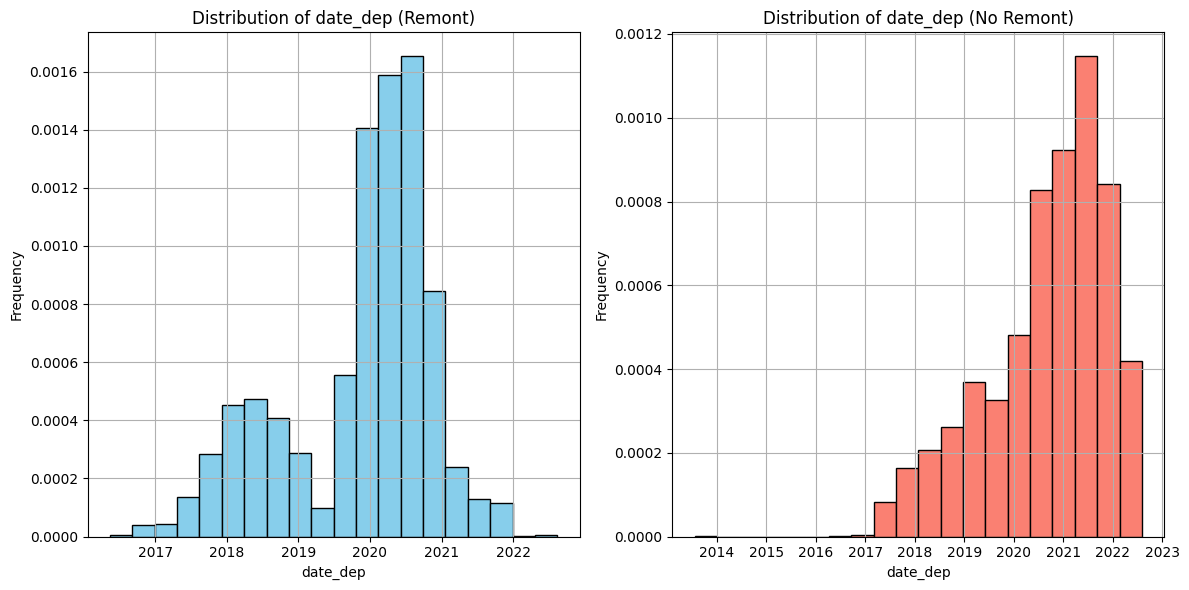

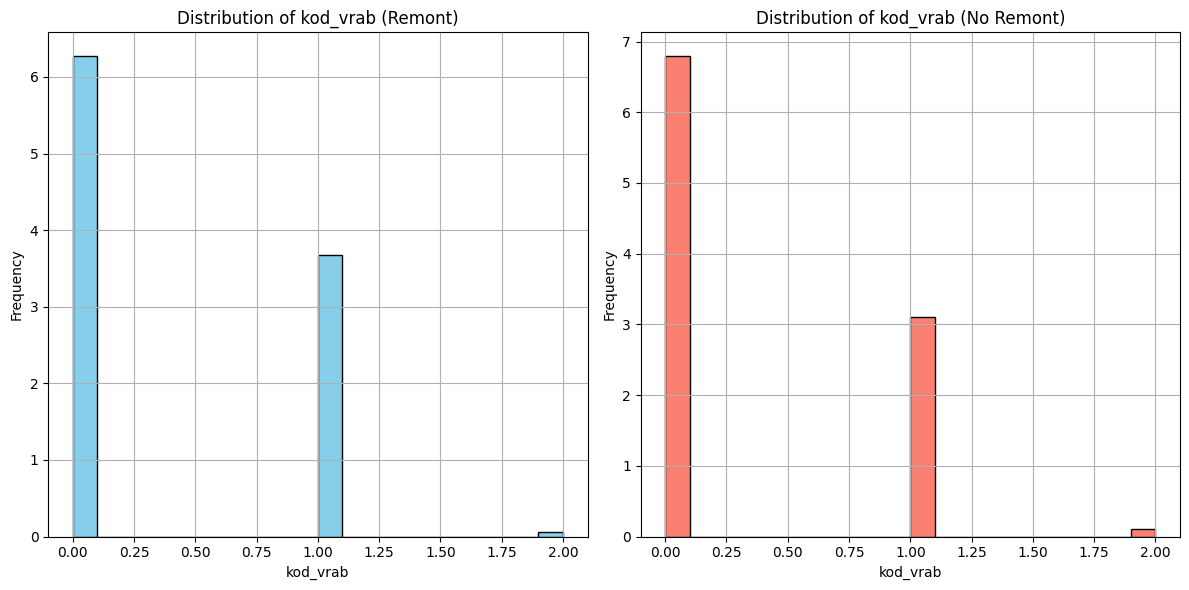

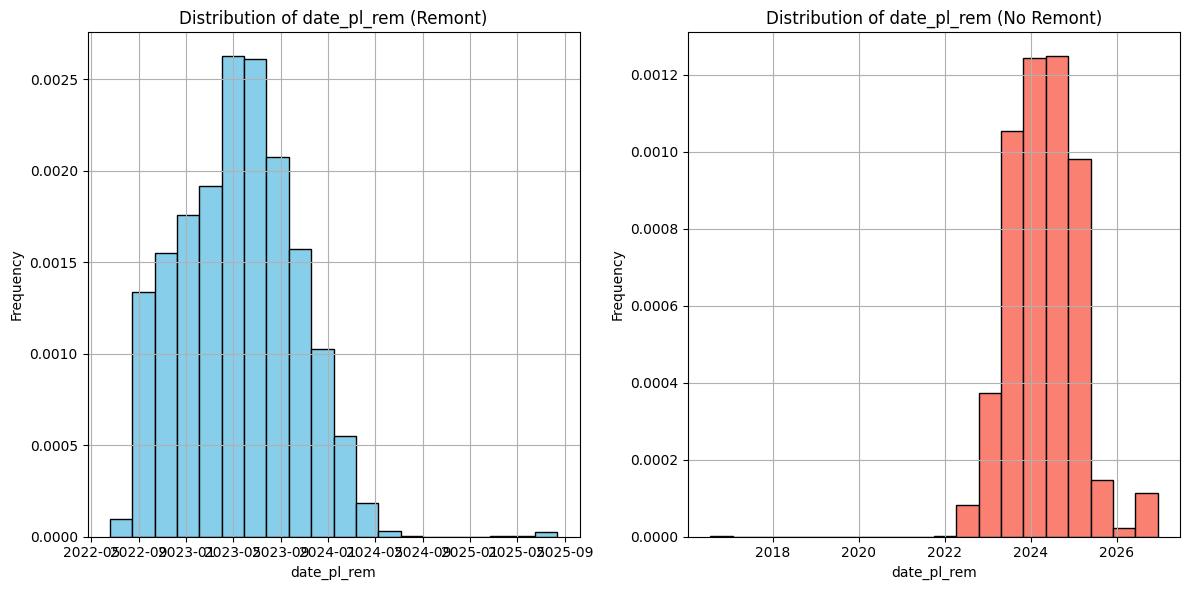

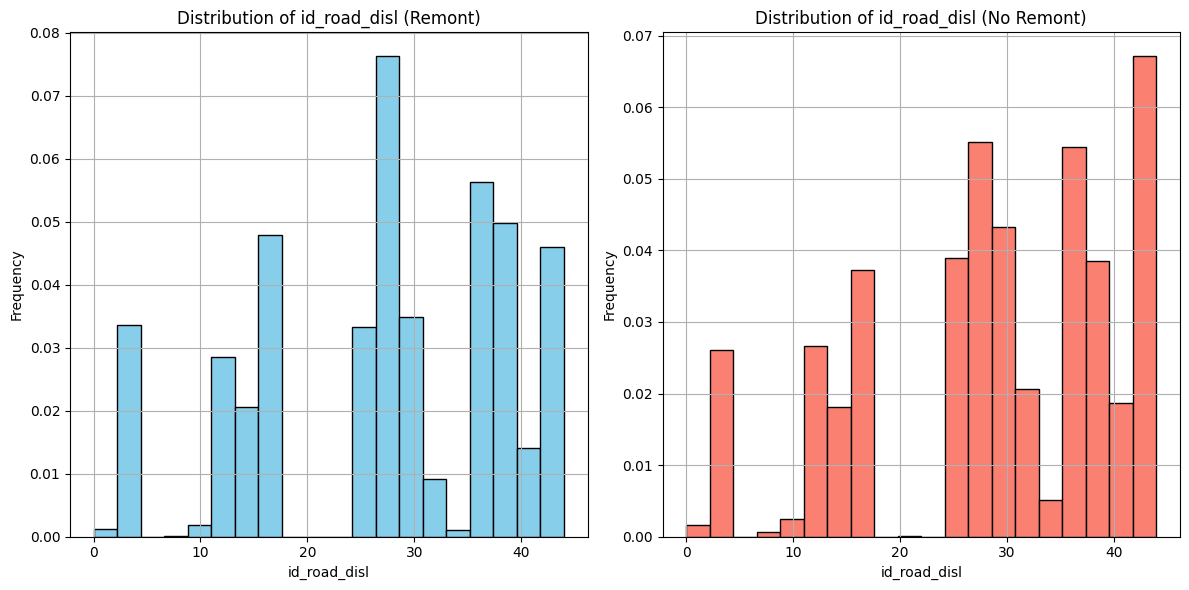

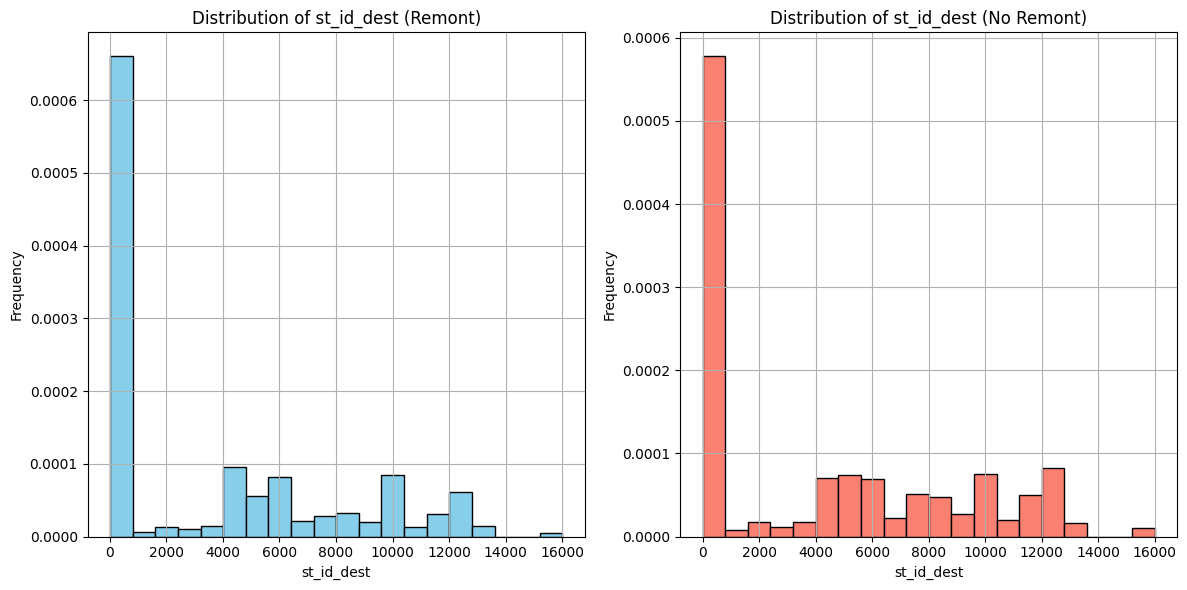

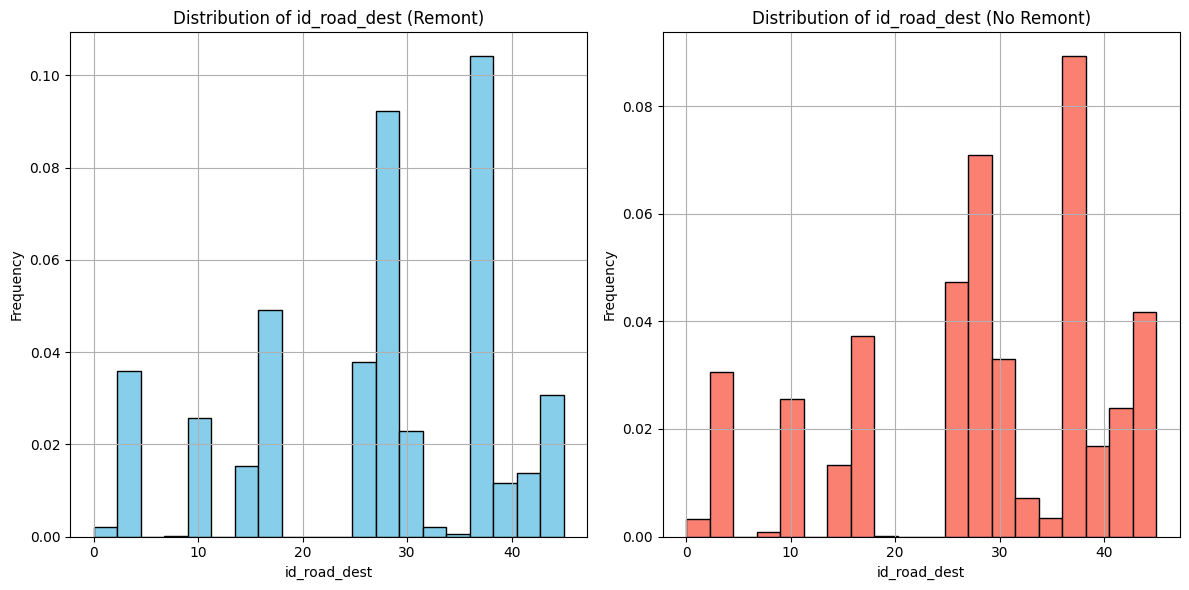

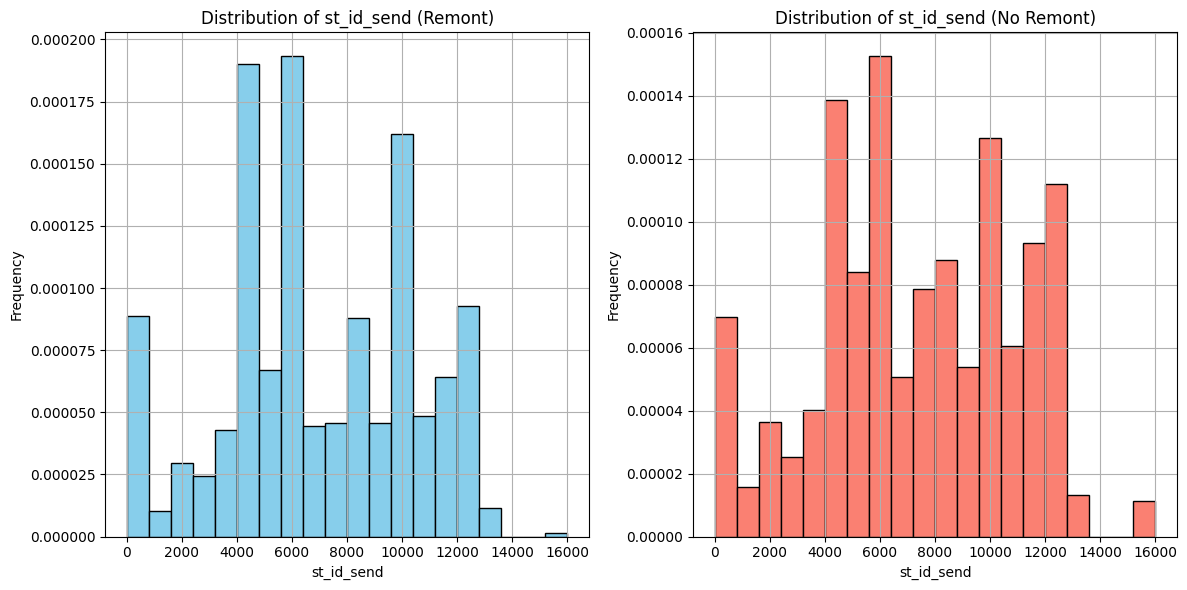

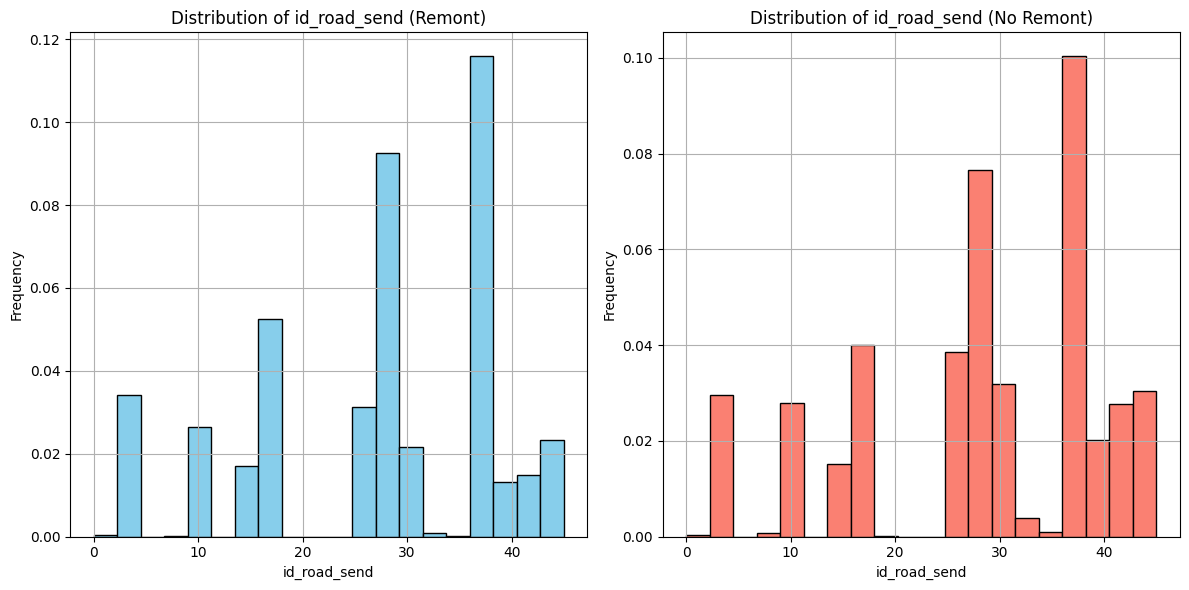

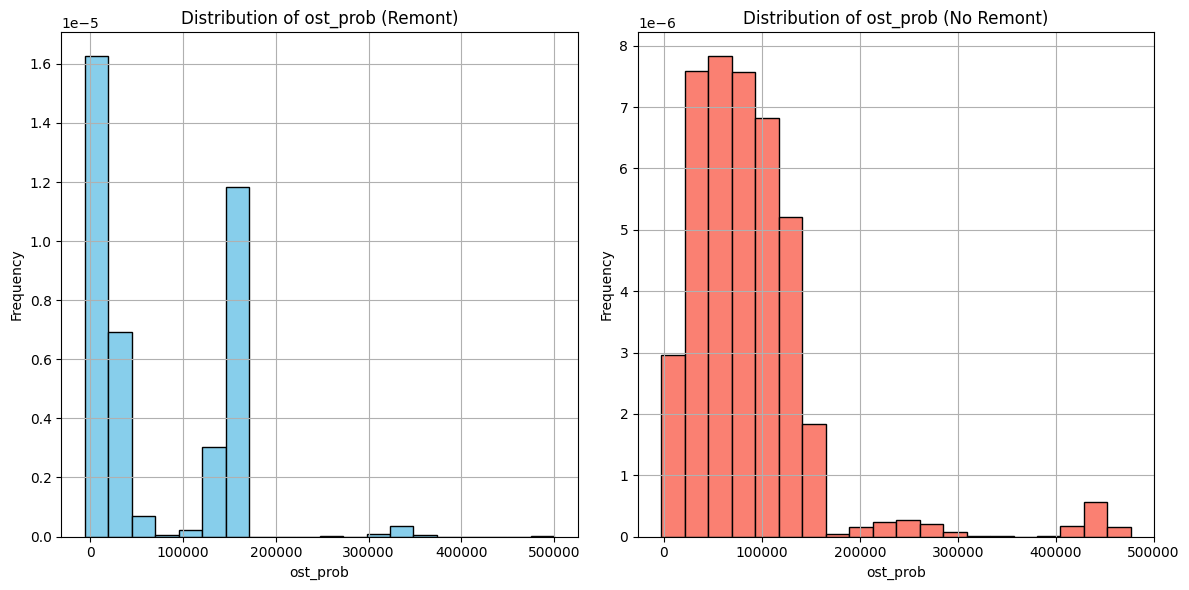

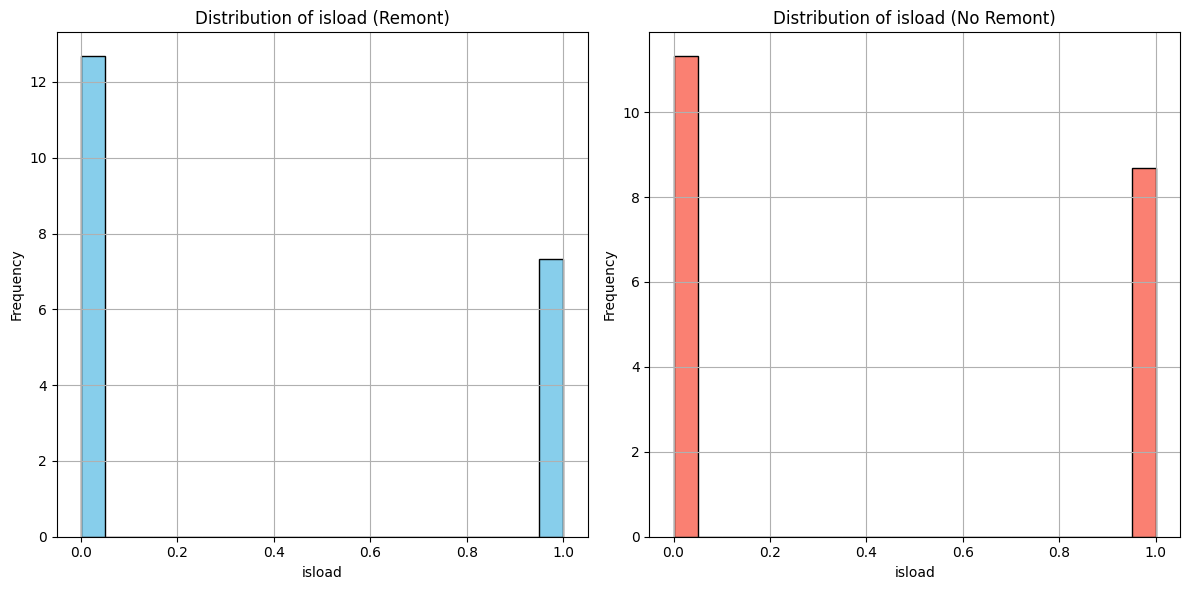

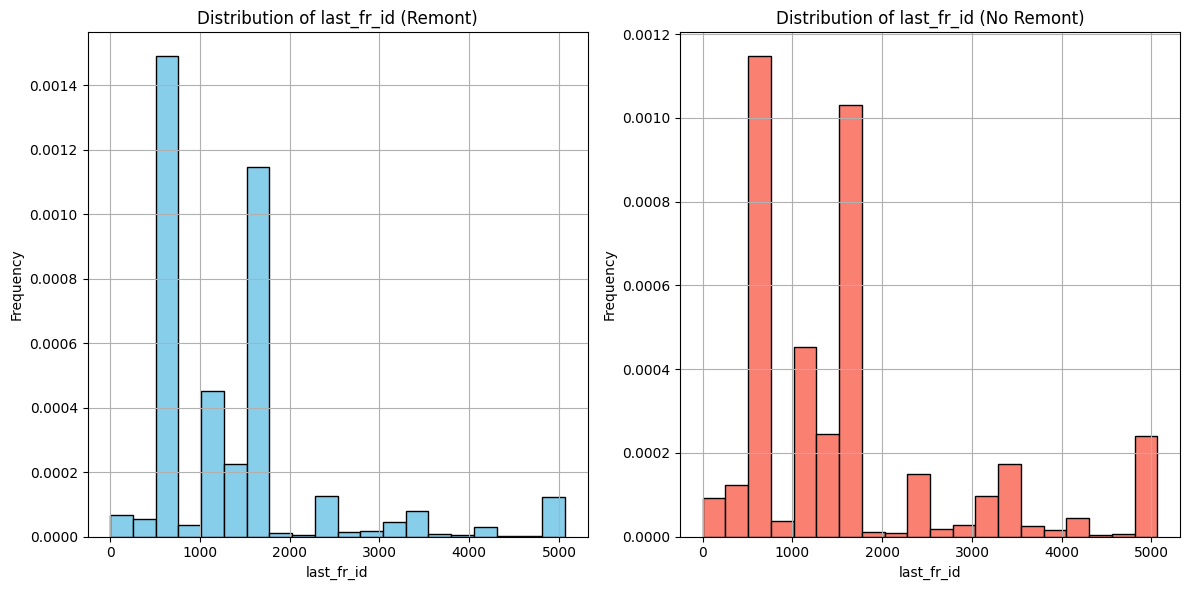

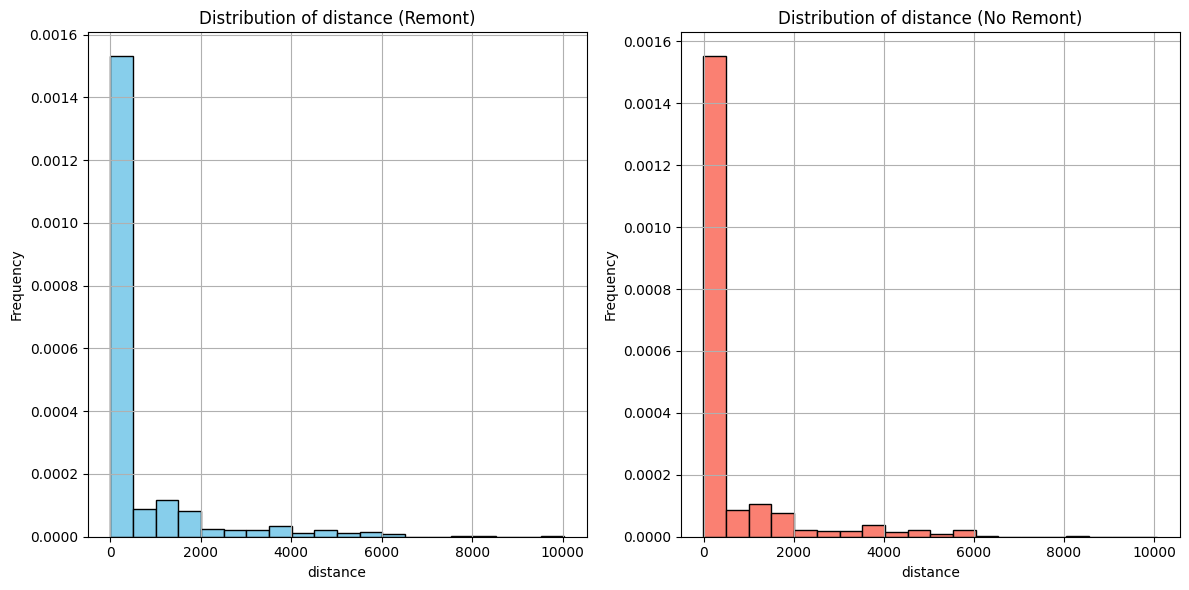

In [ ]:
# Построение распределений для каждого столбца в df_remont и df_ne_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Распределение для df_ne_remont
    plt.subplot(1, 2, 2)
    plt.hist(df_ne_remont[column].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (No Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

<ipython-input-111-ffc1e09def6b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


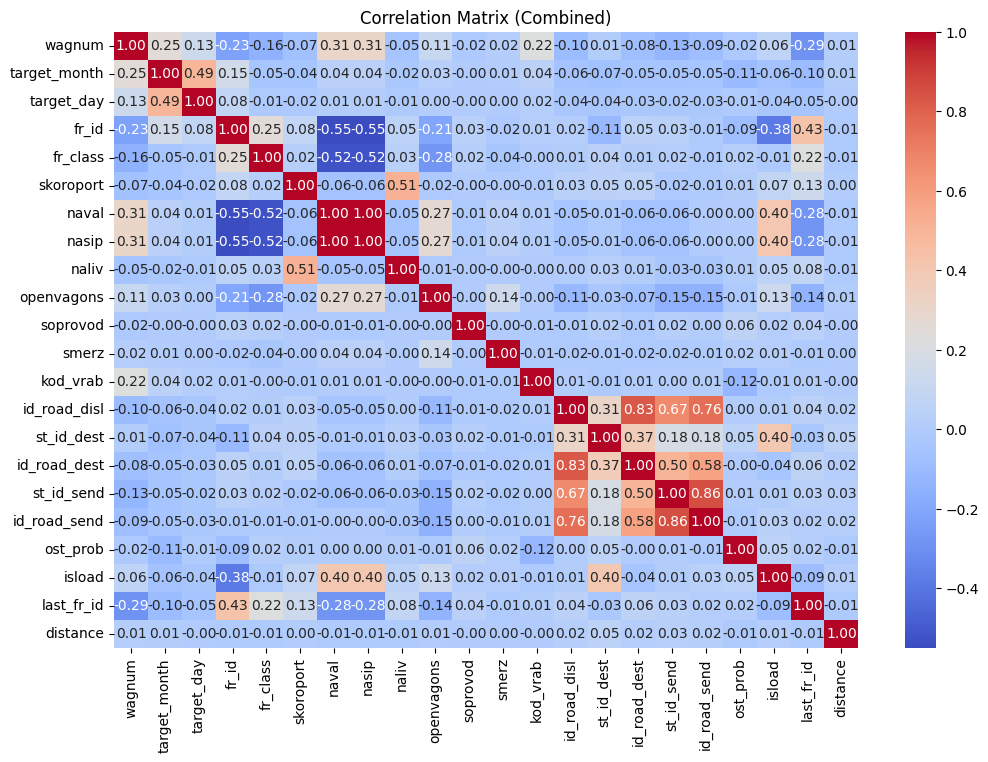

In [ ]:
# Объединение данных в один DataFrame
merged_df = pd.concat([df_remont, df_ne_remont])

# Построение корреляционной матрицы
correlation_matrix = merged_df.corr()

# Построение тепловой карты для корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Combined)')
plt.show()

###**Вывод**###

Наибольшее количество ПР соответсвует вагонам, выполнявшим перевозку грузов со следующими уникальными идентификаторами: [4080-5020] и [560-600].

###**Вывод по корреляционной матрице.**

Учитываем все, кроме soprovod, smerz, distance

###2.8. Справочник станций

In [ ]:
# данные по станциям
stations = pd.read_parquet(path_train + '/stations.parquet').convert_dtypes()
stations

st_id  road_id st_border_sign st_sea_sign st_river_sign st_car_sign  \
0      13069       47              0           0             0           0   
1       9353       18              0           0             0           0   
2       9973       19              0           0             0           0   
3      13745        6              0           0             0           0   
4      14554       15              0           0             0           0   
...      ...      ...            ...         ...           ...         ...   
16443   5235       12              0           0             0           0   
16444  14918       18              0           0             0           0   
16445  15937       21              0           0             0           0   
16446  12866       24              0           0             0           0   
16447   4146        7              0           0             0           0   

      st_ferry_sign st_freigh_sign opor_station_sign  
0                 0              0                 0  
1                 0              0                 0  
2                 0              1                 0  
3                 0              0                 0  
4                 0              0                 0  
...             ...            ...               ...  
16443             0              0                 0  
16444             0              0                 0  
16445             0              0                 0  
16446             0              1                 0  
16447             0              0                 0  

[148032 rows x 9 columns]

Для анализа данных по станциям выполним объединение датасета с датасетом по дислокации вагонов. Объединение произведем по принципу "Если вагон проезжал по дороге с данным road_id хотя бы раз".

In [ ]:
# Определение wagnum, которые соответствуют условиям
matching_wagnums = dislok_min_ost_unique[dislok_min_ost_unique['id_road_dest'].isin(stations['road_id']) |
                                         dislok_min_ost_unique['id_road_send'].isin(stations['road_id'])]['wagnum']

# Фильтрация по wagnum
merged_df = dislok_min_ost_unique[dislok_min_ost_unique['wagnum'].isin(matching_wagnums)]

# Вывод объединенного DataFrame
print(merged_df)

         plan_date  wagnum   date_kap   date_dep  kod_vrab date_pl_rem  \
694862  2022-11-03   17404 2021-12-28 2020-01-07         0  2024-12-28   
608238  2022-09-19   20011 2018-01-14 2021-08-28         0  2024-08-28   
608238  2023-01-31       2 2009-03-01 2021-10-06         2  2024-08-19   
303817  2022-11-08    4994        NaT 2020-05-05         0  2023-05-05   
1044275 2022-12-31   33707        NaT 2021-09-02         0  2022-09-02   
...            ...     ...        ...        ...       ...         ...   
938187  2022-12-16   30228        NaT 2020-08-26         1  2023-08-26   
1017243 2022-08-10   32806        NaT 2021-05-29         1  2024-05-29   
898885  2023-01-31   31678        NaT 2022-05-08         1  2025-05-08   
737656  2023-01-30   33921        NaT 2021-10-23         0  2022-10-23   
933975  2023-01-29   33953        NaT 2021-10-29         0  2022-10-29   

         id_road_disl  st_id_dest  id_road_dest  st_id_send  id_road_send  \
694862              3         144 

In [ ]:
df_remont = pd.merge(y_train_remont, merged_df, on='wagnum')
df_ne_remont = pd.merge(y_train_ne_remont, merged_df, on='wagnum')

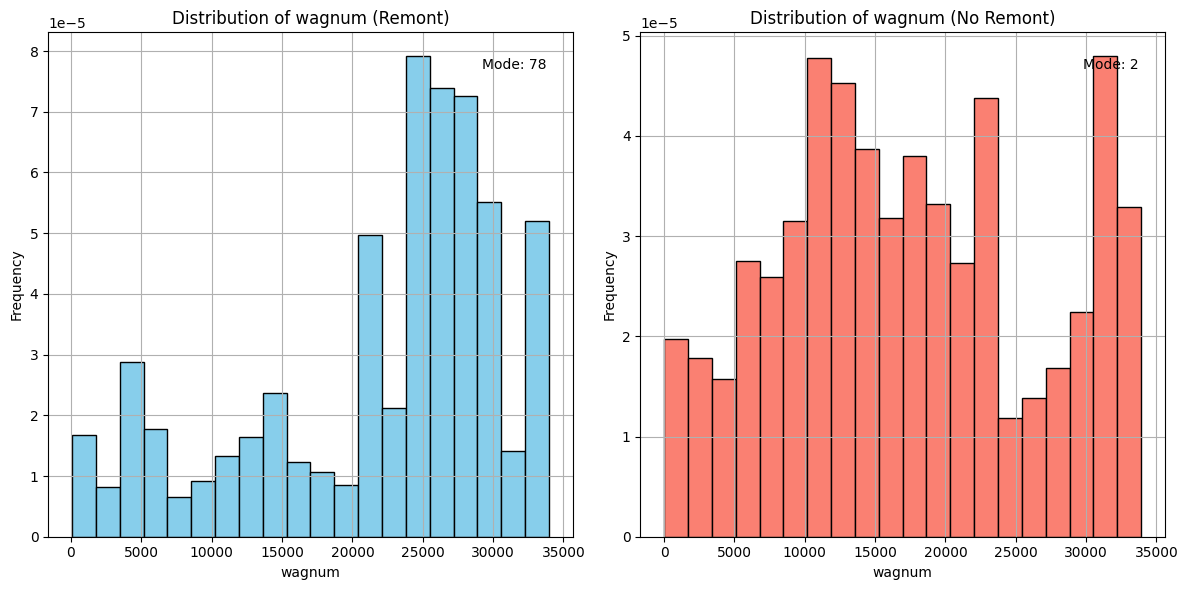

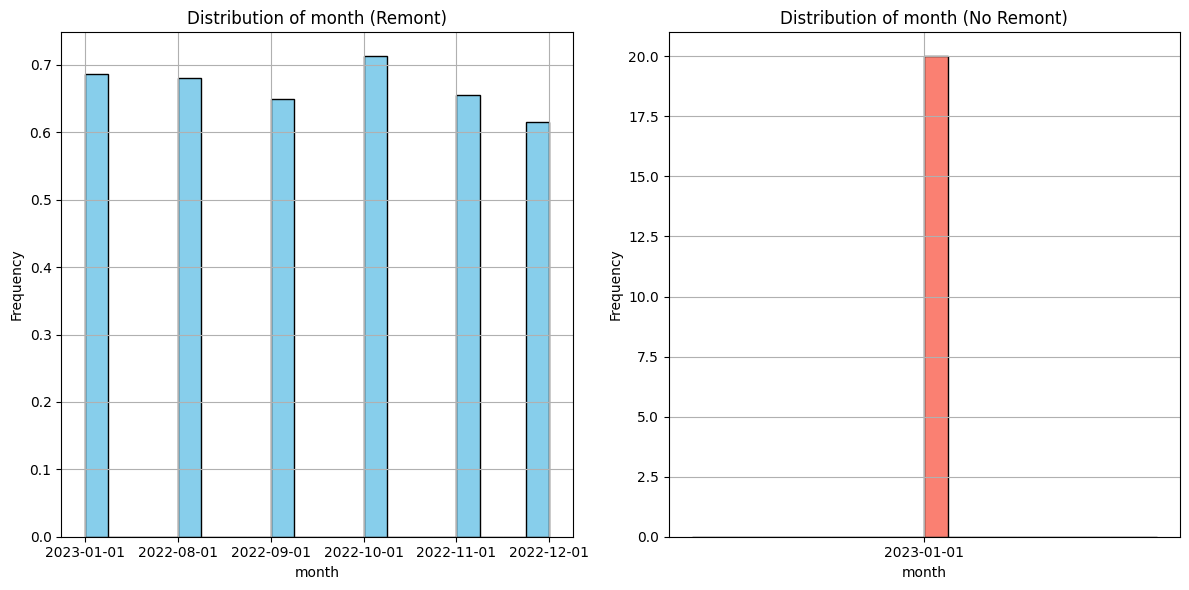

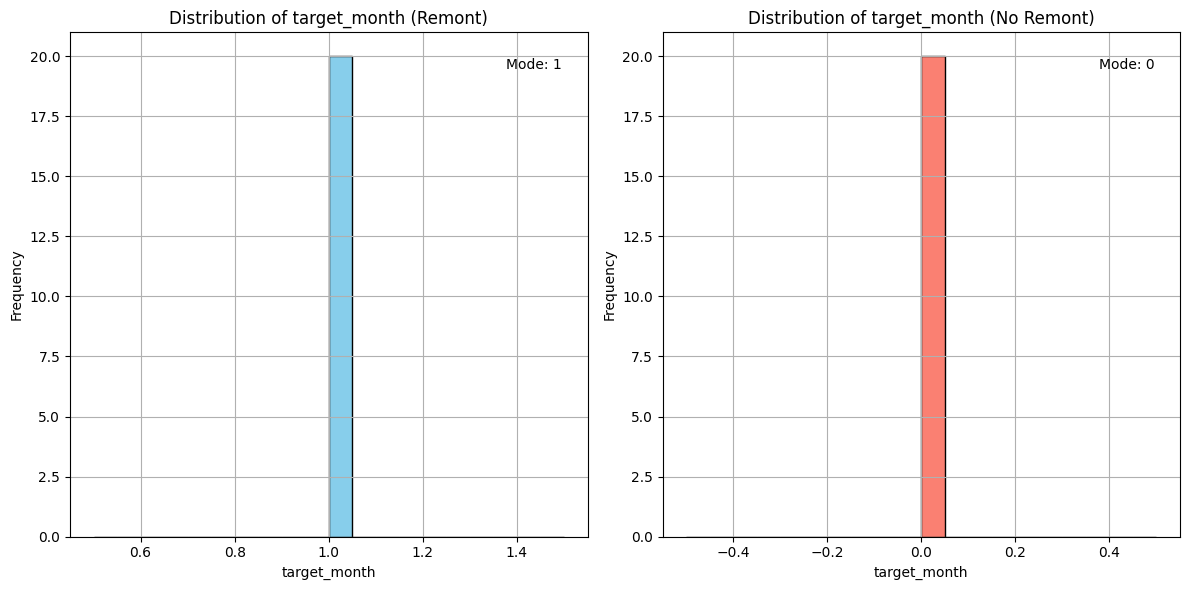

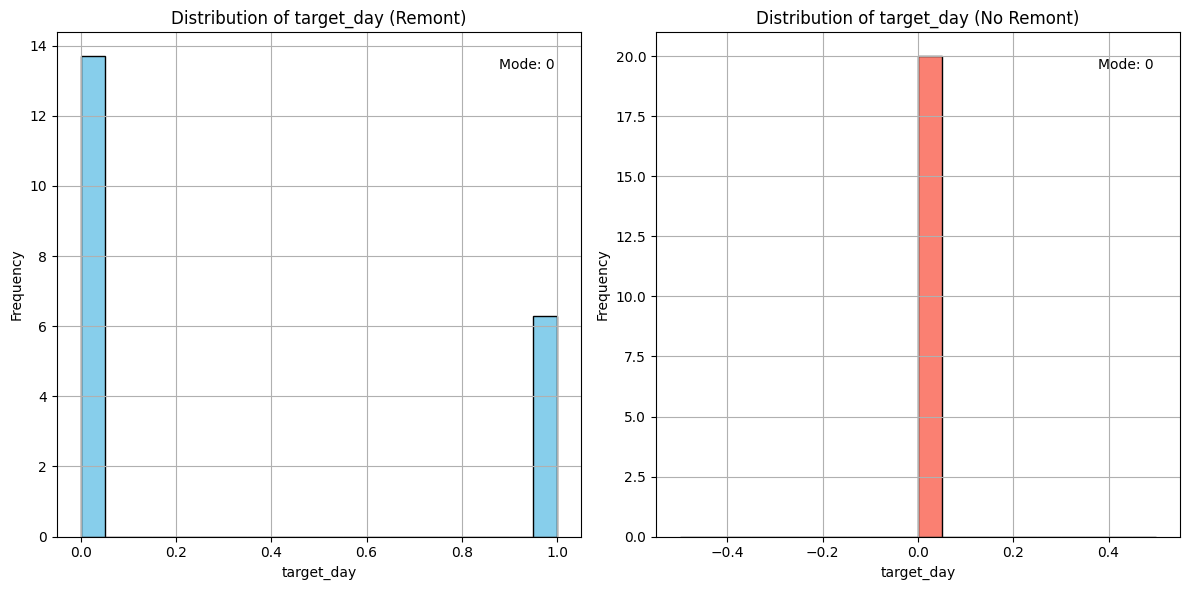

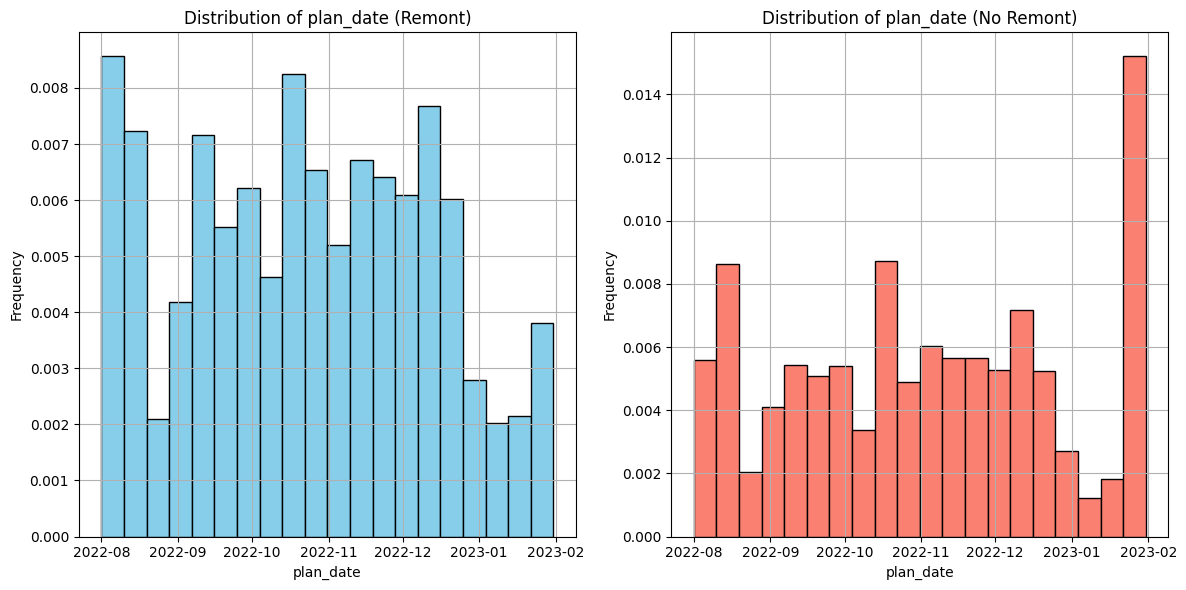

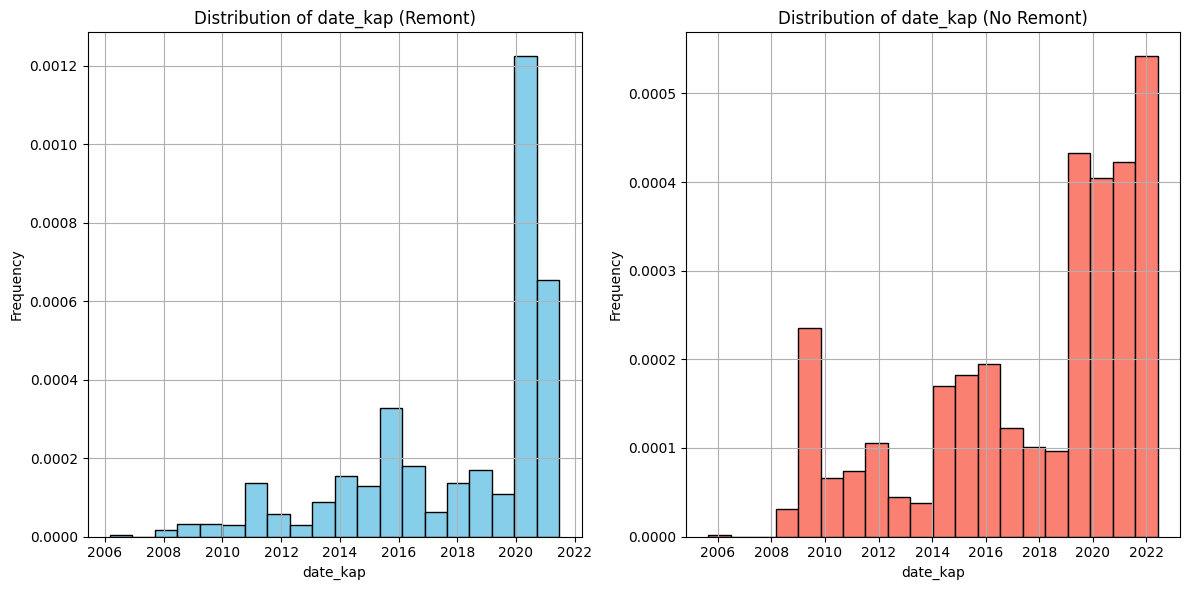

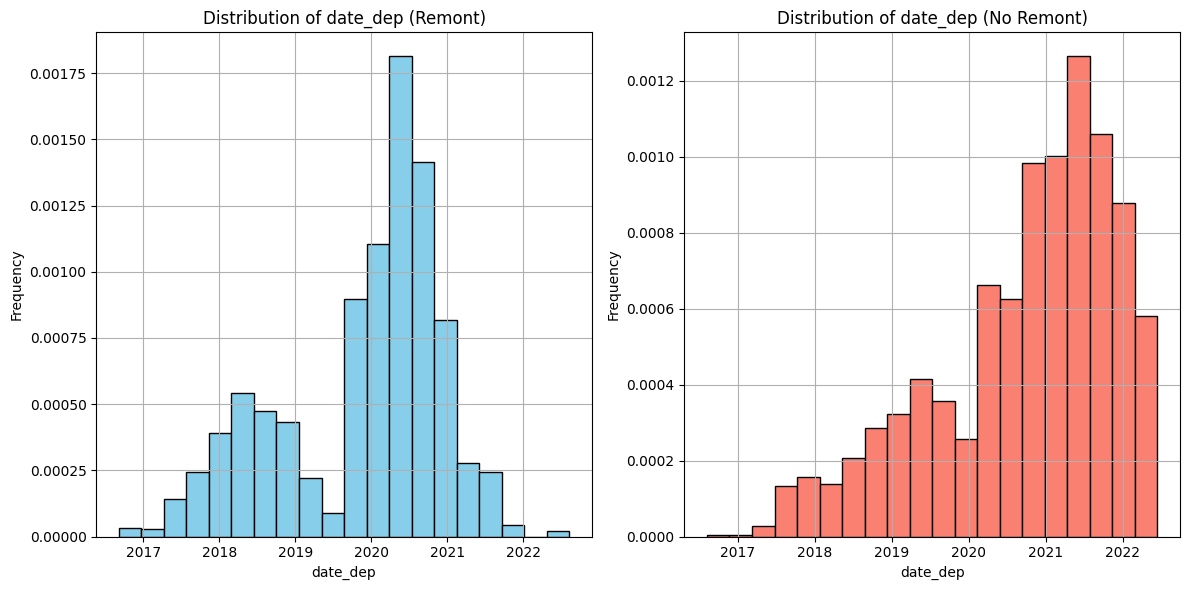

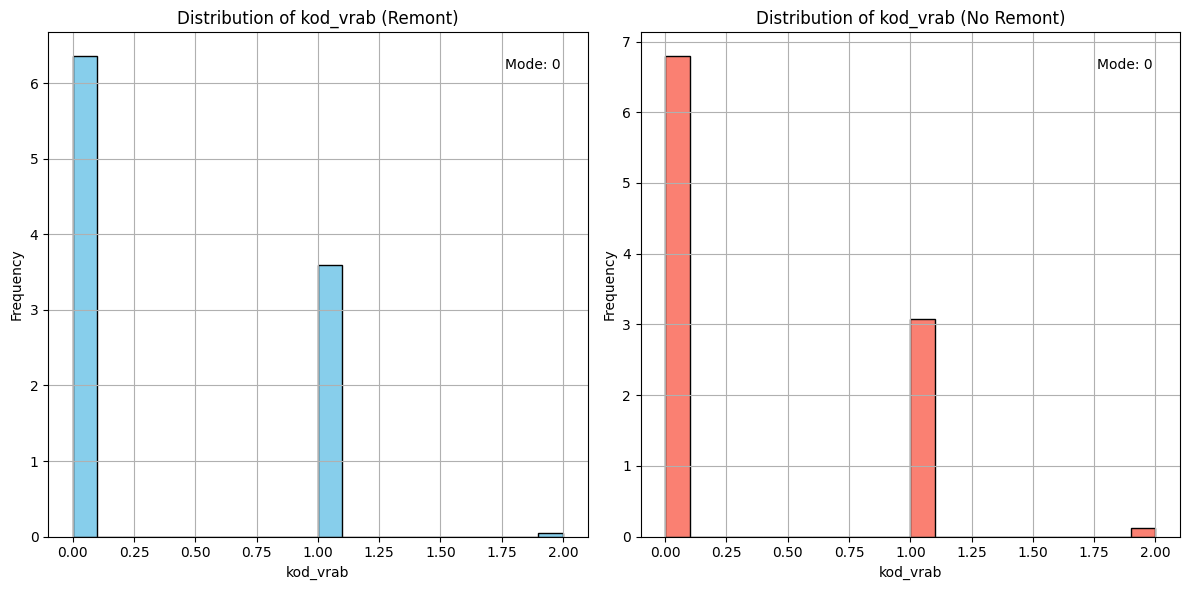

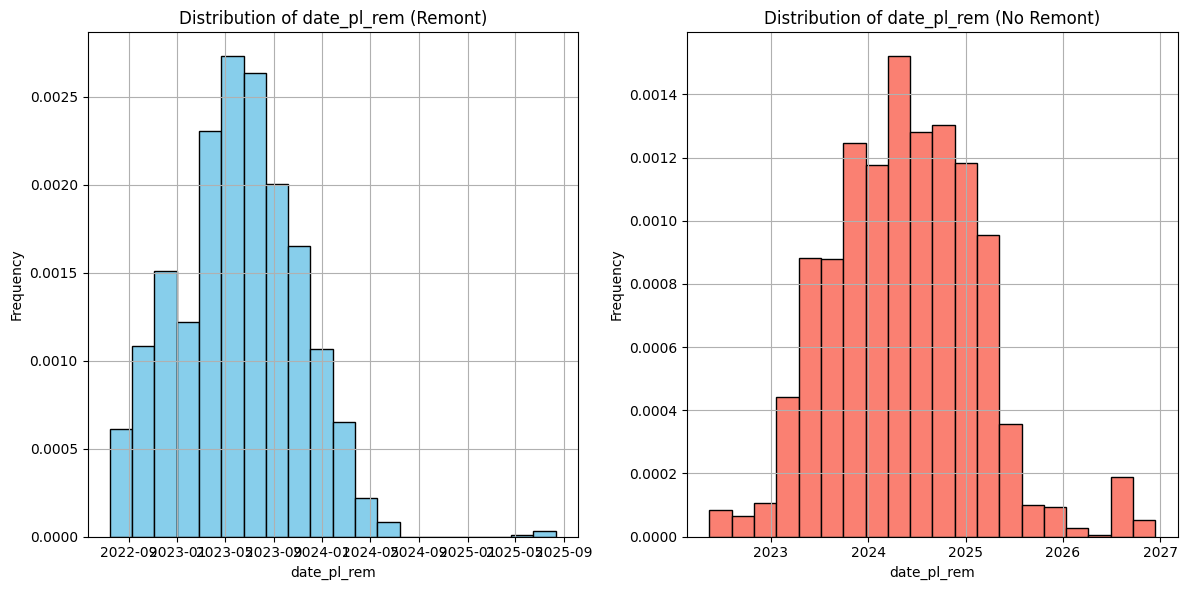

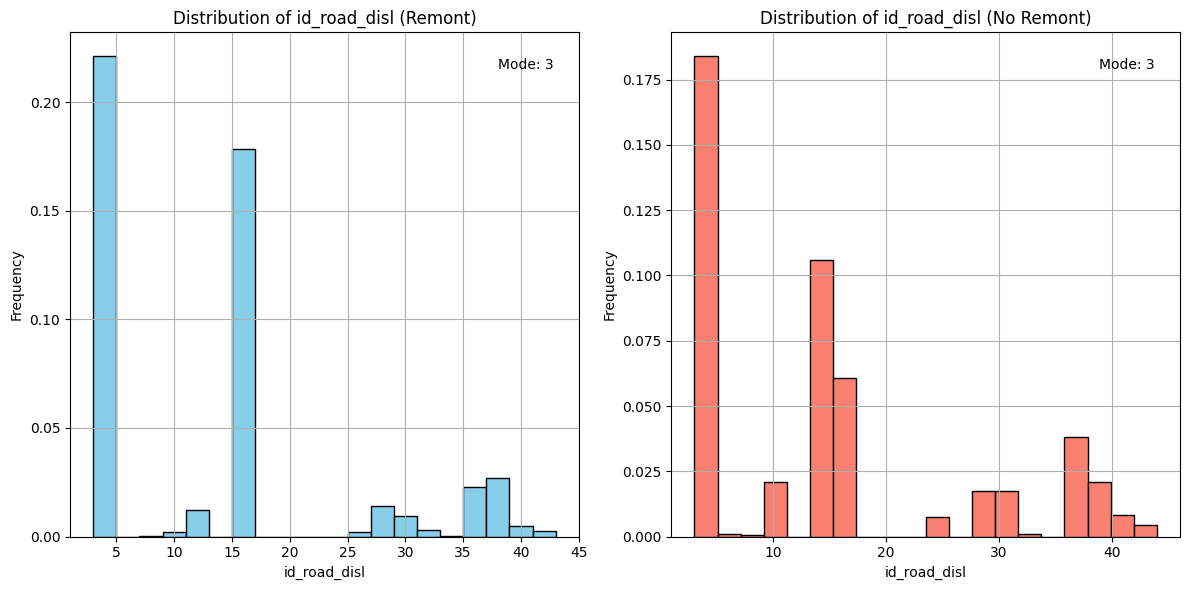

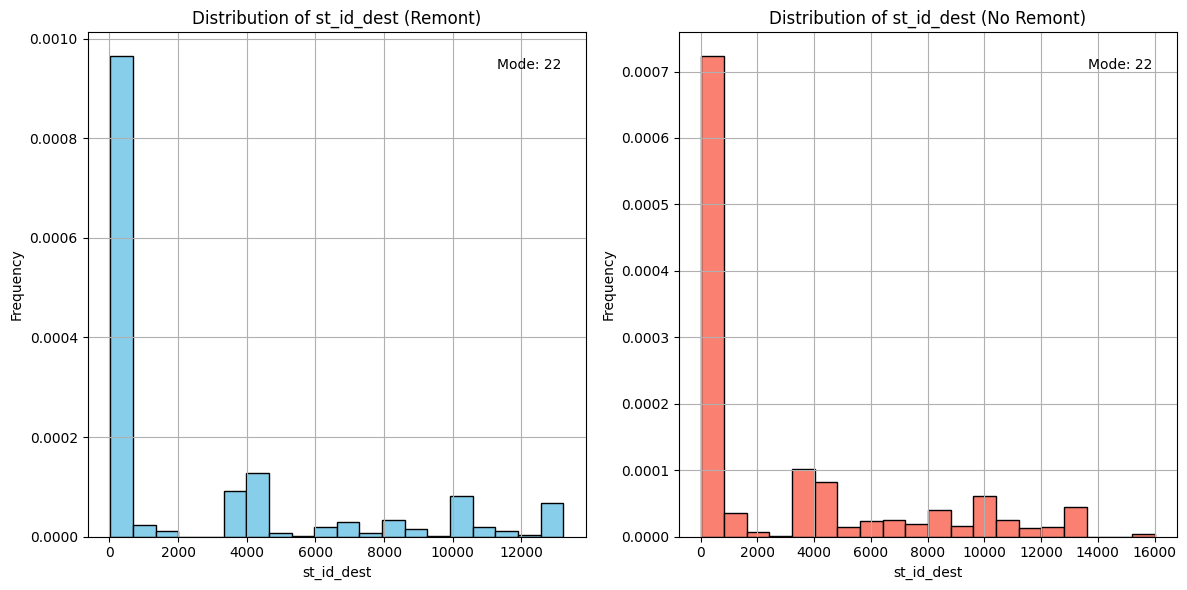

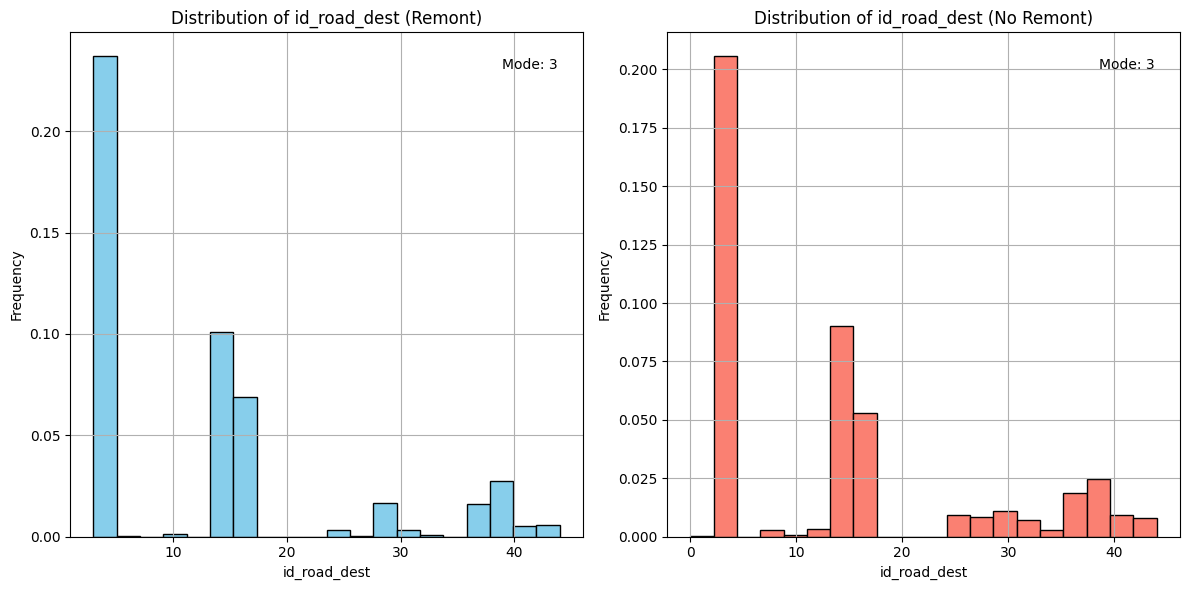

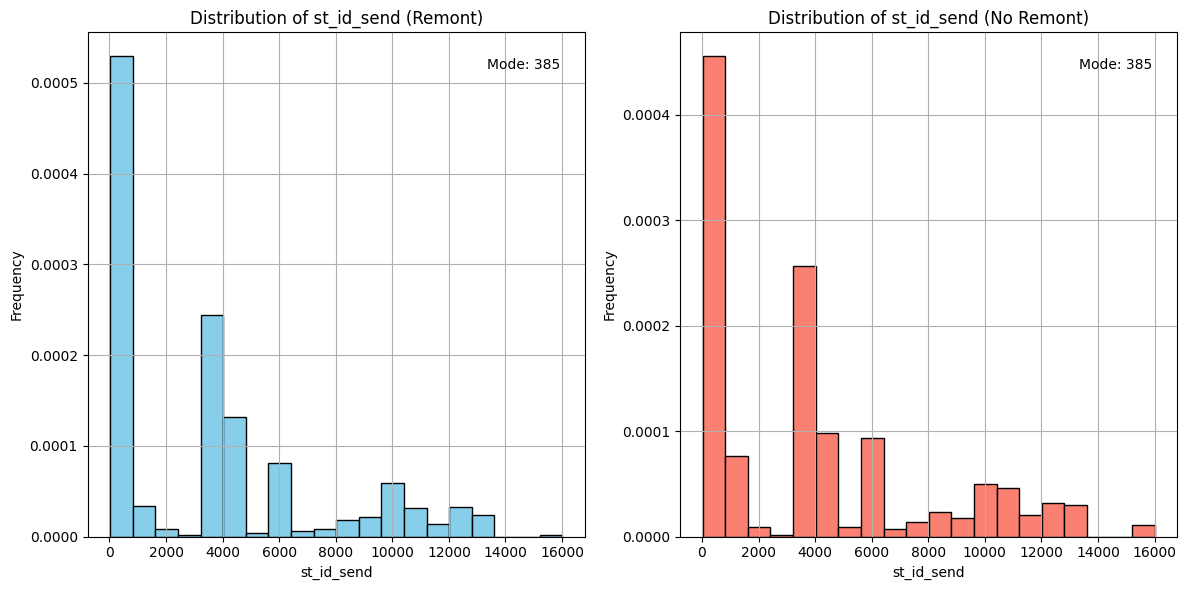

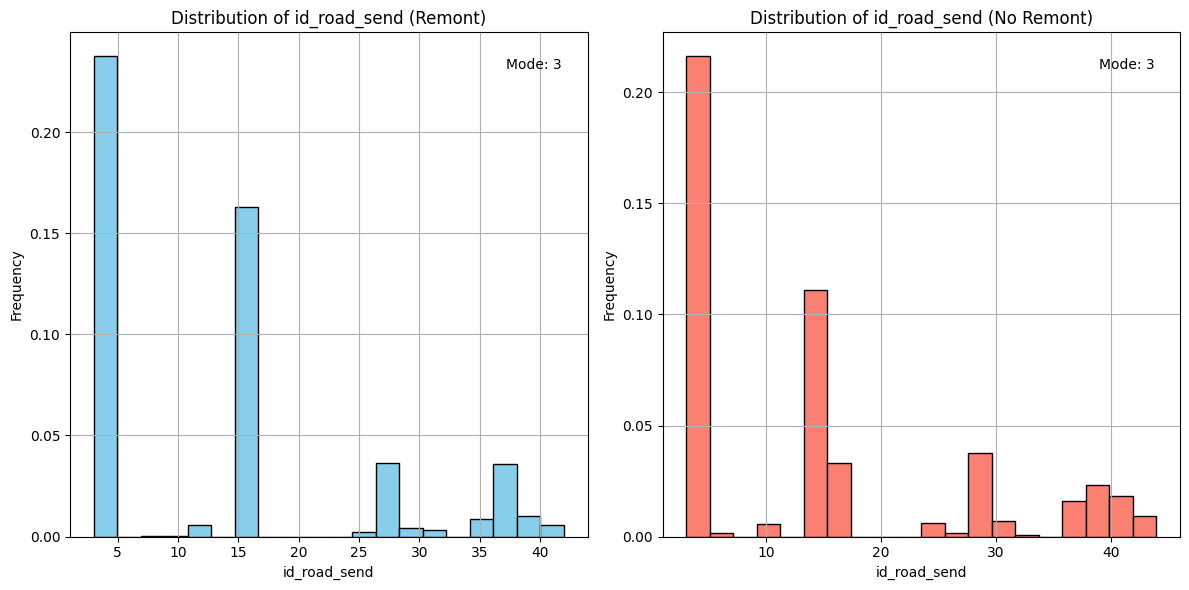

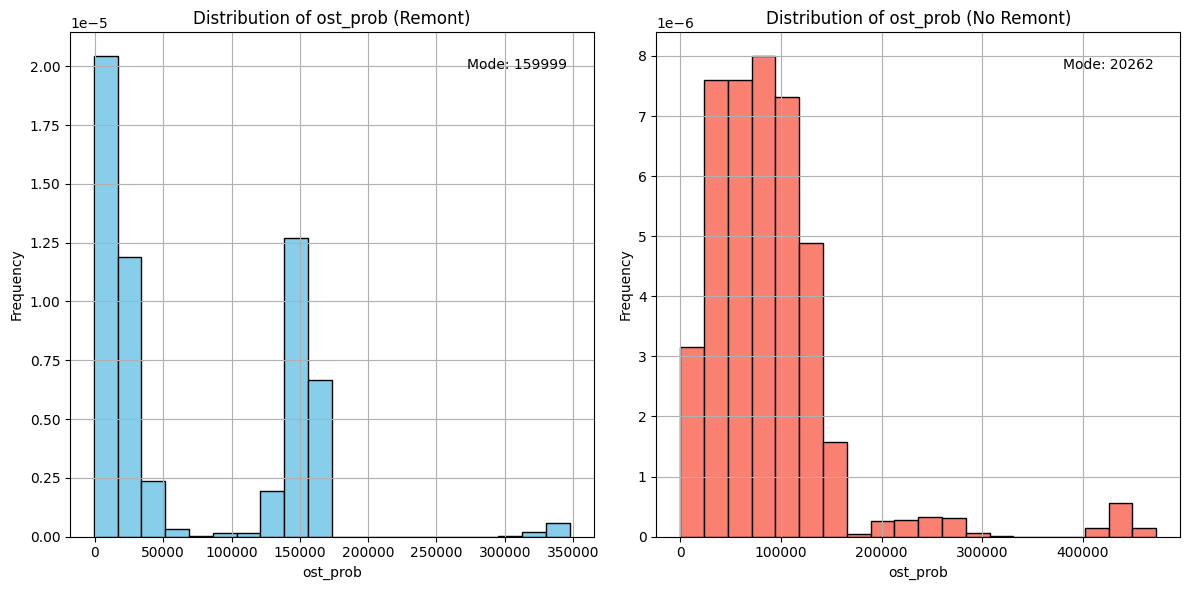

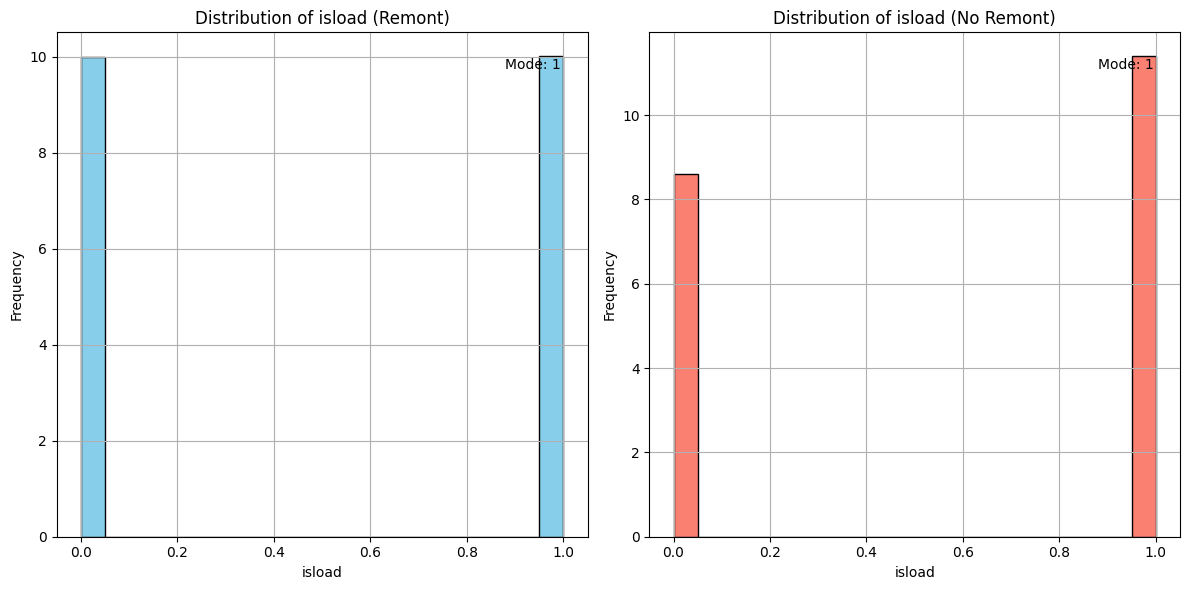

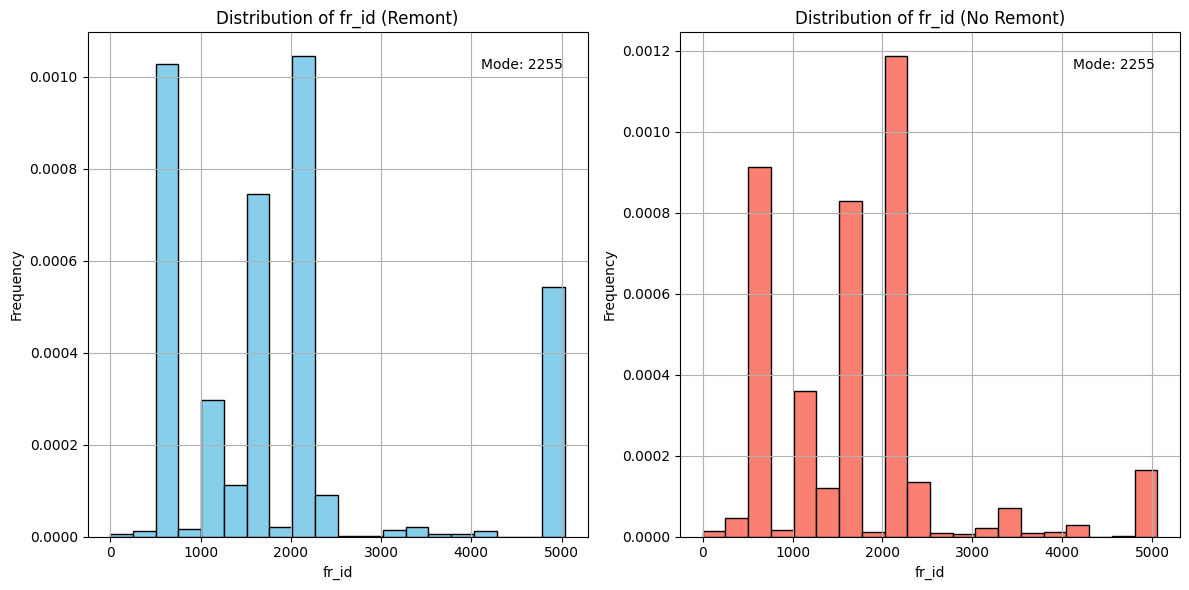

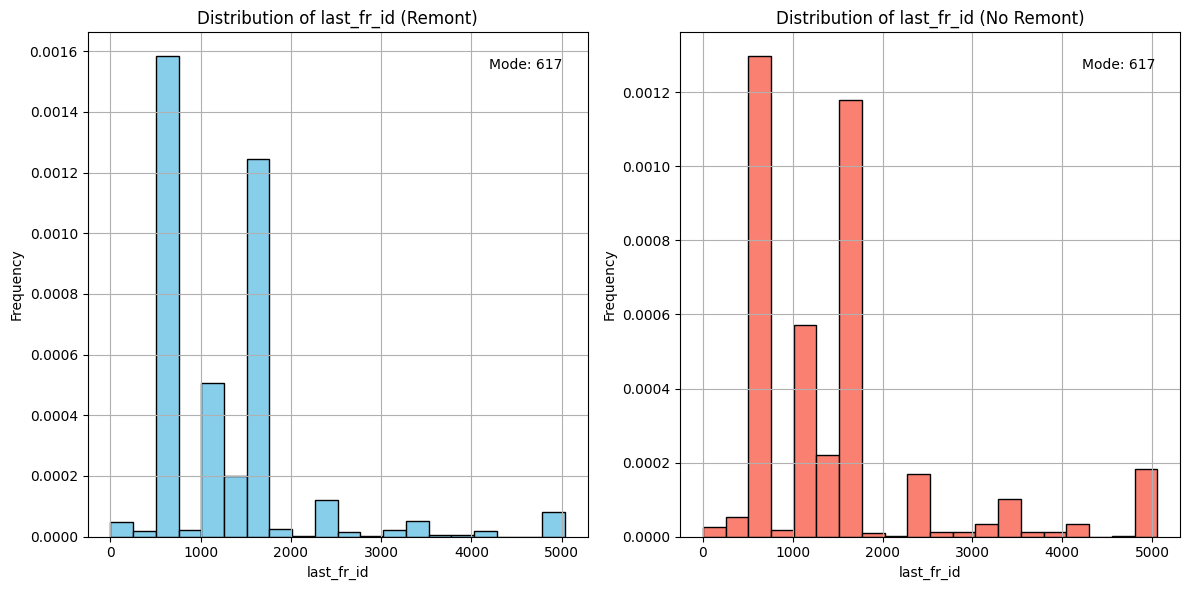

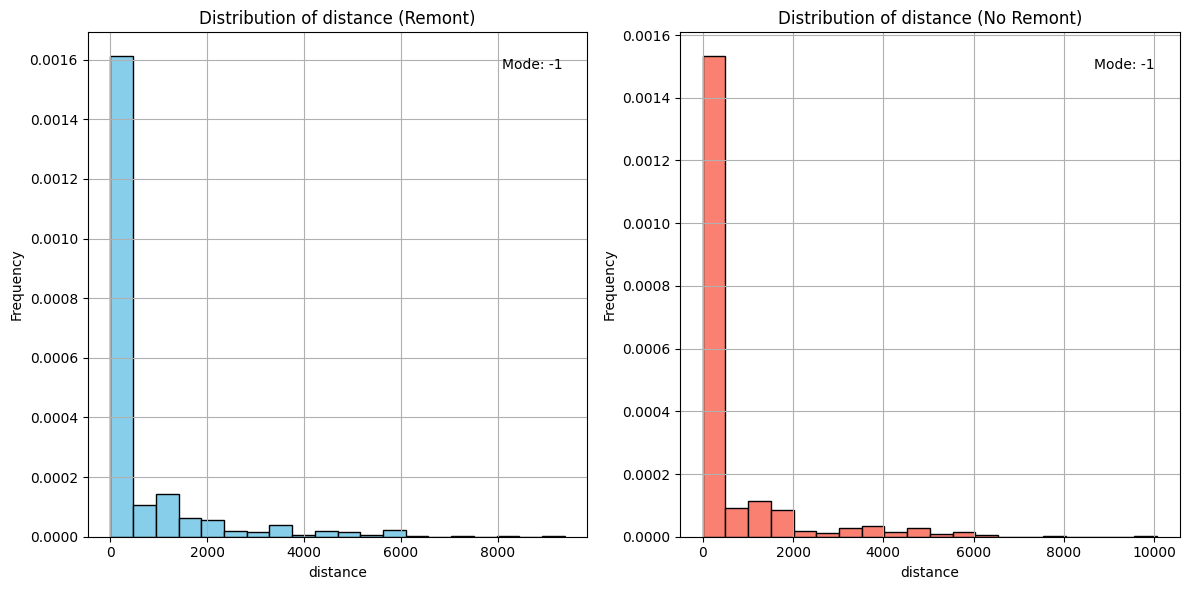

In [ ]:

# Построение распределений для каждого столбца в df_remont и df_ne_remont
for column in df_remont.columns:
    plt.figure(figsize=(12, 6))

    # Распределение для df_remont
    plt.subplot(1, 2, 1)
    plt.hist(df_remont[column].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Добавление моды
    if pd.api.types.is_numeric_dtype(df_remont[column]):
        mode_value_remont = df_remont[column].mode().iloc[0]
        plt.text(0.95, 0.95, f'Mode: {mode_value_remont}', ha='right', va='top', transform=plt.gca().transAxes)

    # Распределение для df_ne_remont
    plt.subplot(1, 2, 2)
    plt.hist(df_ne_remont[column].dropna(), bins=20, color='salmon', edgecolor='black', density=True)
    plt.title(f'Distribution of {column} (No Remont)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Добавление моды
    if pd.api.types.is_numeric_dtype(df_ne_remont[column]):
        mode_value_ne_remont = df_ne_remont[column].mode().iloc[0]
        plt.text(0.95, 0.95, f'Mode: {mode_value_ne_remont}', ha='right', va='top', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

<ipython-input-168-ffc1e09def6b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


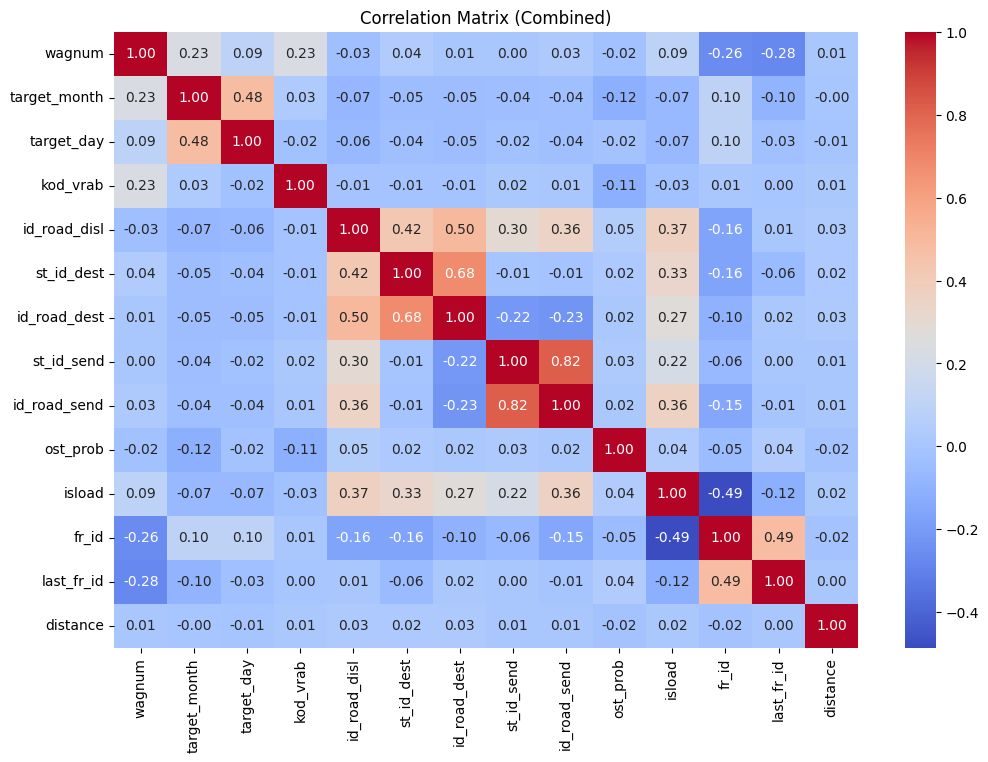

In [ ]:
# Объединение данных в один DataFrame
merged_df = pd.concat([df_remont, df_ne_remont])

# Построение корреляционной матрицы
correlation_matrix = merged_df.corr()

# Построение тепловой карты для корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Combined)')
plt.show()

###**Вывод по корреляционной матрице.**

Учитываем все, кроме distance.

###***Вывод***

Наибольшее влияние на износ вагонов оказывает перевозка строительных материалов и грузов сельскохозяйственного назначения. Самым высоким спросом на перевозки пользуются грузы, относящиеся ко второму классу - зерно и другая пищевая продукция, нефть и основные нефтепродукты, минудобрения. Транспортировка второго класса производится по себестоимости.

---

Нефть и основные нефтепродукты, а также минудобрения повышают коррозийность металлов и оказывают разрушающее воздействие, в следствие чего срок до выхода вагона в ПР сокращается.


---
На отправку вагона в ПР влияет проведенный ранее капитальный ремонт. На основании анализа гистограмм можно сделать вывод о том, что вагоны, подвергшиеся капитальному ремонту в период с 2020 по 2022 гг чаще нуждаются в ремонте, тем ранее отремонтированные вагоны. В связи со спадом спроса на ремонт вагонов в 2020 г, вызванным падением погрузки в связи с пандемией, ВРП потребовалось снизить объемы закупок ремонтных комплектующих. Снижение качества ремонтных работ было также обсуловлено повышением уровня конкуренции и демпингом.


---
Существуют дорожные пути, которые наиболее явно влияют на износостойкость вагонов. Стоит предположить, что влияние обусловленно протяженностью путей, погодными условиями в регионе передвижения, а также дефицитом транспортной инфраструктуры.

#Алгоритм предсказания

###Загрузка данных

In [ ]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
import calendar

In [ ]:
path_train = r"./"

In [ ]:
pr_rem = pd.read_parquet(path_train + '/pr_rems.parquet').convert_dtypes()
wag_prob = pd.read_parquet(path_train + '/wagons_probeg_ownersip.parquet').convert_dtypes()

In [ ]:
# данные по дислокации
dislok = pd.read_parquet(path_train + '/dislok_wagons2.parquet').convert_dtypes()
# данные по текущим ремонтам
pr_rem1 = pd.read_parquet(path_train + '/pr_rems2.parquet').convert_dtypes()
# список вагонов с остаточным пробегом на момент прогноза
wag_prob1 = pd.read_parquet(path_train + '/wagons_probeg_ownersip2.parquet').convert_dtypes()
 # параметры вагона
wag_param = pd.read_parquet(path_train + '/wag_params2.parquet').convert_dtypes()

 # текущие ремонты вагонов
tr_rem = pd.read_parquet(path_train + '/tr_rems2.parquet').convert_dtypes()

In [ ]:
wag_prob = pd.concat([wag_prob, wag_prob1], ignore_index=True)

In [ ]:
pr_rem = pd.concat([pr_rem, pr_rem1], ignore_index=True) #для марта

In [ ]:
# таргет по прогноза выбытия вагонов в ПР на месяц и на 10 дней
target = pd.read_csv(path_train +'prediction/y_predict.csv').convert_dtypes()

In [ ]:
wag_param = wag_param.drop_duplicates(subset='wagnum', keep='last')# у вагонов могут меняться параметры, поэтмоу номер дублируется. В данной модели это фактор не учитывается

In [ ]:
month_to_predict = pd.to_datetime('2023-03-01')

In [ ]:
target['target_month'] = 0
target['target_day'] = 0
target['month'] = '2023-02-28'

In [ ]:
month_to_predict2 = month_to_predict
# Получаем последний день предыдущего месяца
last_day_previous_month = month_to_predict2.replace(day=1) - timedelta(days=1)

#Получаем первый день предыдущего месяца
first_day_previous_month = datetime(month_to_predict2.year, month_to_predict2.month, 1) - timedelta(days=1)

first_day_previous_month = datetime(first_day_previous_month.year, first_day_previous_month.month, 1)

In [ ]:
month_to_predict = pd.to_datetime('2023-02-28')

In [ ]:
target.month = pd.to_datetime(target.month)
target = target[target.month == month_to_predict][['wagnum','target_month','target_day']]

In [ ]:
target.target_month.sum(), target.target_day.sum()

(0, 0)

In [ ]:
target

wagnum  target_month  target_day
0       33361             0           0
1       33364             0           0
2       33366             0           0
3       33358             0           0
4       33349             0           0
...       ...           ...         ...
33702   17621             0           0
33703   25045             0           0
33704   27156             0           0
33705   21361             0           0
33706    8061             0           0

[33707 rows x 3 columns]

аивная модель

Наивная модель будет построена на правилах с использованием минимального набора данных, без применения Ml.

Реальный процесс выглядит следующим образом - в начале месяца берется срез по парку по всем вагонам, за ремонт которых несёт ответственность ПГК. Для выбранных вагонов требуется установить, какие из них будут отремонтированы в текущем месяце. Данная информация помогает планировать нагрузку на вагоно-ремонтное предприятие(ВРП). Вторая модель определяет критичные вагоны, которые будут отправлены в ремонт в первую очередь( в ближайшие 10 дней). Это помогает фокусировать внимание диспетчеров.

Основными критериями по которым вагон отправляется в плановый ремонт - является его остаточный пробег и срок до планового ремонта.
В регламентах РЖД используется следующее правило - если ресурс по пробегу не превышает 500 км и/или плановый ремонт должен наступить через 15 дней(или меньше), то вагон может ехать только на ВРП.
Из этого регламента вытекают две особенности:
1. Диспетчер старается отправить вагон раньше положенных значений. Это позволяет выбрать предприятия, на которых ремонтироваться дешевле, а не ближайшее.
2. Компания-оператор может выбирать какому из нормативов нужно следовать - ремонтировать вагон по сроку, или по пробегу, или по обоим критериям сразу. Поэтому встречаются вагоны, у которых пробег может не отслеживаться.

Вагон может быть отправлен в плановый ремонт и раньше положенного. На это может влиять, например, история грузовых операций и количество текущих(мелких) ремонтов. Основная цель участников в данной задаче - найти закономерности и оценить значимые признаки, по которым вагон выбывает в плановый ремонт.

###Подготовка данных

In [ ]:
wag_prob

repdate  wagnum  ost_prob  manage_type  rod_id  reestr_state  \
0       2022-08-01   33361      7541            0       1             1   
1       2022-08-02   33361      7243            0       1             1   
2       2022-08-03   33361      6990            0       1             1   
3       2022-08-04   33361      6347            0       1             1   
4       2022-08-05   33361      6027            0       1             1   
...            ...     ...       ...          ...     ...           ...   
7193662 2023-02-24    8061    139890            0       0             1   
7193663 2023-02-25    8061    139890            0       0             1   
7193664 2023-02-26    8061    139890            0       0             1   
7193665 2023-02-27    8061    139890            0       0             1   
7193666 2023-02-28    8061    139890            0       0             1   

         ownership_type  month  
0                     0      8  
1                     0      8  
2                     0      8  
3                     0      8  
4                     0      8  
...                 ...    ...  
7193662               0      2  
7193663               0      2  
7193664               0      2  
7193665               0      2  
7193666               0      2  

[7193667 rows x 8 columns]

In [ ]:
wag_prob_going_check = wag_prob[(wag_prob.repdate == first_day_previous_month) | (wag_prob.repdate == last_day_previous_month)]

In [ ]:
count_repdate = wag_prob_going_check.groupby('wagnum')['repdate'].nunique()

# Печатаем те 'wagnum', для которых есть только одна уникальная дата
print("wagnum без пары дат:")
print(count_repdate[count_repdate == 1].index)

#удаляем поезд/поезда без индекса(значит он не ездил)
indices_to_drop = count_repdate[count_repdate == 1].index
wag_prob_going_check = wag_prob_going_check[~wag_prob_going_check['wagnum'].isin(indices_to_drop)].reset_index(drop=True)
wag_prob_going_check

wagnum без пары дат:
Index([6573], dtype='Int64', name='wagnum')


repdate  wagnum  ost_prob  manage_type  rod_id  reestr_state  \
0     2023-02-01   33361    150585            0       1             1   
1     2023-02-28   33361    140585            0       1             1   
2     2023-02-01   33364    148432            0       1             1   
3     2023-02-28   33364    144191            0       1             1   
4     2023-02-01   33366    154987            0       1             1   
...          ...     ...       ...          ...     ...           ...   
67409 2023-02-28   27156    129690            0       1             1   
67410 2023-02-01   21361    130023            0       1             1   
67411 2023-02-28   21361    124151            0       1             1   
67412 2023-02-01    8061    139990            0       0             1   
67413 2023-02-28    8061    139890            0       0             1   

       ownership_type  month  
0                   0      2  
1                   0      2  
2                   0      2  
3                   0      2  
4                   0      2  
...               ...    ...  
67409               0      2  
67410               0      2  
67411               0      2  
67412               0      2  
67413               0      2  

[67414 rows x 8 columns]

In [ ]:
# Группируем по 'wagnum' и вычисляем разность между значениями 'ost_prob' для каждой даты
wag_prob_going_check = wag_prob_going_check.pivot_table(index='wagnum', columns='repdate', values='ost_prob', aggfunc='first').reset_index()
wag_prob_going_check['date_diff'] = wag_prob_going_check.iloc[:, 2] - wag_prob_going_check.iloc[:, 1]

#Удаляем лишнее
wag_prob_going_check.drop(wag_prob_going_check.columns[[1, 2]], axis=1, inplace=True)

#Проверка стоял ли поезд предыдущий месяц -> False если стоял
wag_prob_going_check['is_diff_more_than_100'] = wag_prob_going_check['date_diff'].apply(lambda x: abs(x) > 100)

wag_prob_going_check.drop(wag_prob_going_check.columns[[1]], axis=1, inplace=True)

In [ ]:
wag_prob_going_check

repdate  wagnum is_diff_more_than_100
0             0                  True
1             1                  True
2             2                  True
3             3                  True
4             4                  True
...         ...                   ...
32689     33972                  True
32690     33973                  True
32691     33974                  True
32692     33975                  True
32693     33976                  True

[32694 rows x 2 columns]

In [ ]:
# оставим только данные по остаточному пробегу для каждого номерав вагона
wag_prob = wag_prob[(wag_prob.repdate == month_to_predict) | (wag_prob.repdate == wag_prob.repdate.min())]

In [ ]:
wag_prob

repdate  wagnum  ost_prob  manage_type  rod_id  reestr_state  \
0       2022-08-01   33361      7541            0       1             1   
184     2022-08-01   33364     37103            0       1             1   
368     2022-08-01   33366     10242            0       1             1   
552     2022-08-01   33358     41827            0       1             1   
736     2022-08-01   33349      5722            0       1             1   
...            ...     ...       ...          ...     ...           ...   
7193554 2023-02-28   17621     71590            0       1             1   
7193582 2023-02-28   25045    136540            0       1             1   
7193610 2023-02-28   27156    129690            0       1             1   
7193638 2023-02-28   21361    124151            0       1             1   
7193666 2023-02-28    8061    139890            0       0             1   

         ownership_type  month  
0                     0      8  
184                   0      8  
368                   0      8  
552                   0      8  
736                   0      8  
...                 ...    ...  
7193554               0      2  
7193582               0      2  
7193610               0      2  
7193638               0      2  
7193666               0      2  

[67682 rows x 8 columns]

In [ ]:
wag_prob_for_day = wag_prob[(wag_prob.repdate == wag_prob.repdate.min())]

In [ ]:
wag_prob_for_day.rename(columns={'ost_prob': 'ost_prob_d'}, inplace=True)

<ipython-input-87-54aec8ee02fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wag_prob_for_day.rename(columns={'ost_prob': 'ost_prob_d'}, inplace=True)


In [ ]:
wag_prob_for_day = wag_prob_for_day[['wagnum','ost_prob_d']]

In [ ]:
# оценим среднесуточный пробег из данных по пробегу вагона, на тот случай, если данных по нормативу нет
wag_prob_ =wag_prob.groupby('wagnum', as_index = False).agg({'repdate':['max', 'min'] , 'ost_prob': ['max','min']},)#.droplevel(1)
wag_prob_.columns = [head+'_' + name
                     if head!='wagnum'
                     else head
                     for head, name in wag_prob_.columns ]

wag_prob_['diff_days'] = wag_prob_.repdate_max - wag_prob_.repdate_min
wag_prob_['mean_run'] = (wag_prob_.ost_prob_max - wag_prob_.ost_prob_min )/ wag_prob_.diff_days.dt.days
wag_prob = wag_prob[wag_prob.repdate == wag_prob.repdate.max()][['wagnum','ost_prob']]
wag_prob = wag_prob.merge(wag_prob_[['wagnum','mean_run']])

In [ ]:
# для каждого вагона оставим только информацию по сроку службы и нормативу суточного пробега между ПР
wag_param = wag_param[['wagnum','srok_sl','cnsi_probeg_dr','cnsi_probeg_kr']]

In [ ]:
# добавим признак, что вагон был в ПР в предыдущем месяце. Скорее всего, если вагон был в ПР недавно, то повторно он не поедет
pr_rem['was_repair_in_prev_month'] = 1
pr_rem = pr_rem[['wagnum','was_repair_in_prev_month']]
pr_rem = pr_rem.drop_duplicates(subset='wagnum') #некоторые вагоны все же ремонтируются больше 1 раза, поэтому нужен сбросить дубли

In [ ]:
pr_rem

wagnum  was_repair_in_prev_month
0       15000                         1
1       25485                         1
2       25944                         1
3       24080                         1
4       28612                         1
...       ...                       ...
12027    5049                         1
12028   15915                         1
12029    7276                         1
12030   25459                         1
12031   27297                         1

[11982 rows x 2 columns]

In [ ]:
# посчитаем сколько текущих ремонтов было за прошедший период
tr_rem = tr_rem.groupby('wagnum', as_index= False).kod_vrab.count()

In [ ]:
# сохраним только дату следующего планового ремонта для вагона
dislok = dislok[['wagnum','date_pl_rem']].drop_duplicates(subset = 'wagnum', keep='last')

In [ ]:
# соберем все данные вместе
wp = target[['wagnum']].merge(wag_param, on ='wagnum', how = 'left')\
             .merge(wag_prob, how = 'left')\
             .merge(pr_rem, how = 'left')\
             .merge(tr_rem, how = 'left')\
             .merge(dislok, how = 'left')\
             .merge(wag_prob_for_day, how = 'left')\
             .merge(wag_prob_going_check, how ='left')

In [ ]:
wp.head()

wagnum    srok_sl  cnsi_probeg_dr  cnsi_probeg_kr  ost_prob    mean_run  \
0   33361 2033-03-01             110             160    140585  630.540284   
1   33364 2031-04-12             110             160    144191  507.526066   
2   33366 2032-01-21             110             160    150649  665.436019   
3   33358 2032-11-30             110             160     14715  128.492891   
4   33349 2033-12-04             110             160    139618  634.578199   

   was_repair_in_prev_month  kod_vrab date_pl_rem  ost_prob_d  \
0                       1.0       NaN  2023-02-17        7541   
1                       1.0       NaN  2023-10-03       37103   
2                       1.0       NaN  2023-04-03       10242   
3                       NaN       NaN  2024-02-23       41827   
4                       1.0       NaN  2023-07-06        5722   

  is_diff_more_than_100  
0                  True  
1                  True  
2                  True  
3                  True  
4                  True

In [ ]:
# Получим среднесуточный пробег, как среднее от нормативов и реального пробега
wp[['cnsi_probeg_dr','cnsi_probeg_kr','mean_run']] = wp[['cnsi_probeg_dr','cnsi_probeg_kr','mean_run']].fillna(0)
wp['day_run'] = wp.apply(lambda x : [ val  for val in [x.cnsi_probeg_kr, x.cnsi_probeg_dr, x.mean_run] if val != 0], axis = 1 )
wp['day_run']= wp.apply(lambda x : np.mean(x.day_run) if len(x.day_run)> 0 else 0, axis = 1 )

In [ ]:
wp['current_date'] = month_to_predict

In [ ]:
# определим, сколько дней осталось до истечения срока службы
wp['date_diff_srk_sl'] = wp['srok_sl']- wp['current_date']

In [ ]:
# определим, сколько дней осталось до ближайшего ПР
wp['date_diff_pl_rem'] = wp['date_pl_rem']- wp['current_date']

In [ ]:
wp['date_diff_pl_rem'] = wp['date_diff_pl_rem'].fillna(pd.Timedelta(days=9999))

In [ ]:
wp['date_diff_pl_rem_int'] = (wp['date_diff_pl_rem'].dt.total_seconds() / (24*3600)).astype(int)

In [ ]:
# определим, какой остаточный ресурс будет на момент окончания месяца
wp['prob_end_month'] = wp['ost_prob'] - wp['day_run']* 30

In [ ]:
wp['prob_end_10days'] = (wp['ost_prob'] - (wp['day_run']*10))

In [ ]:
wp['percentage_from_start'] = ((wp['ost_prob'] / wp['ost_prob_d']) * 100) >= 25

In [ ]:
wp['percentage_from_start'] = wp['percentage_from_start'].fillna(True)

In [ ]:
wp['prob_end_month'] = wp['prob_end_month'].fillna(9999999)

In [ ]:
wp['target_month'] = 0
wp.loc[((wp.prob_end_month <= 3000) & (wp.percentage_from_start == False) & (wp.is_diff_more_than_100 == True)), 'target_month'] = 1

In [ ]:
wp.loc[((wp.prob_end_month == 9999999) & (wp.date_diff_pl_rem_int < 30) & (wp.date_diff_pl_rem_int > 0)), \
       'target_month'] = 1

In [ ]:
wp['target_day'] = 0

In [ ]:
wp.loc[((wp.prob_end_10days <= 700) & (wp.target_month == 1)), 'target_day'] = 1

In [ ]:
wp.loc[((wp.prob_end_month == 9999999) & (wp.date_diff_pl_rem_int <= 11) & (wp.date_diff_pl_rem_int > 0)\
        & (wp.target_month == 1)), \
       'target_day'] = 1

In [ ]:
wp['target_day'].sum()

714

In [ ]:
wp['target_month'].sum()

1657

In [ ]:
wp['month'] = '2023-03-01'

###Предсказание

In [ ]:
pred_target = target[['wagnum']].merge(wp[['wagnum','month','target_month','target_day']],how = 'left')
pred_target = pred_target.drop_duplicates(subset = 'wagnum')

In [ ]:
# Проверим соотношение отмеченных вагонов с фактическим значением
round(pred_target.target_month.sum() / target.target_month.sum(), 2)

<ipython-input-117-ecb4353e9d4f>:2: RuntimeWarning: divide by zero encountered in long_scalars
  round(pred_target.target_month.sum() / target.target_month.sum(), 2)


inf

In [ ]:
# сохраним таргет за месяц  для выбранного периода отдельно
target_path = './prediction/target_predicton.csv'

In [ ]:
pred_target.drop_duplicates(subset = 'wagnum').to_csv(target_path, index=False)

In [ ]:
true_target_path = './prediction/y_predict.csv'

In [ ]:
target.drop_duplicates(subset = 'wagnum').to_csv(true_target_path, index=False)

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

# Функция для оценки на приватном лидерборде (все данные)
def calc_f1_score(test_url: str, prediction_url: str) -> float:

    true_labels = pd.read_csv(test_url)
    pred_labels = pd.read_csv(prediction_url)
    # Таргет для месячного прогноза
    true_labels_month = true_labels['target_month'].values
    pred_labels_month = pred_labels['target_month'].values

    # Таргет для 10 дневного прогноза
    true_labels_day = true_labels['target_day'].values
    pred_labels_day = pred_labels['target_day'].values

    # Посчитаем метрику для месяца и 10 дней
    score_month = f1_score(true_labels_month, pred_labels_month)
    score_day = f1_score(true_labels_day, pred_labels_day)
    # Посчитаем метрику с весом для двух таргетов
    score = 0.5 * score_month + 0.5 * score_day
    return score

In [ ]:
# оценим насколько хорошо удалось предсказать выбытие вагонов  по месяцу и по 10 дням
calc_f1_score(true_target_path, target_path,)

0.0